# Analisis Big Data untuk Memetakan Prevalensi dan Faktor Risiko HIV

## Progress Train-Test Split Analysis - Menggunakan Semua Data dari hiv_data_cleaned.csv

**Tujuan Analisis:**
- Menggunakan **SEMUA DATA** dari `hiv_data_cleaned.csv` untuk train-test split
- Menganalisis distribusi data pada train dan test set secara lengkap
- Memastikan split yang representatif dan tidak bias
- Visualisasi yang jelas dan informatif untuk memahami split
- Menggunakan semua kolom yang tersedia dalam dataset


In [1]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Library untuk Peta Choropleth
try:
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️ Plotly tidak tersedia. Menggunakan matplotlib untuk peta.")

# Konfigurasi Visualisasi
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Library berhasil diimport!")
print(f"📅 Tanggal analisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
if PLOTLY_AVAILABLE:
    print("✅ Plotly tersedia untuk peta choropleth!")
else:
    print("⚠️ Plotly tidak tersedia. Install dengan: pip install plotly")


✅ Library berhasil diimport!
📅 Tanggal analisis: 2025-11-25 14:23:45
✅ Plotly tersedia untuk peta choropleth!


## 1. Memuat Data dari hiv_data_cleaned.csv

**Langkah:**
- Membaca **SEMUA DATA** dari file `hiv_data_cleaned.csv`
- Mengecek struktur dan informasi dataset
- Memastikan semua kolom tersedia


In [2]:
# Membaca SEMUA DATA dari hiv_data_cleaned.csv
print("=" * 80)
print("📂 MEMUAT SEMUA DATA DARI hiv_data_cleaned.csv")
print("=" * 80)

# Membaca dataset lengkap
df = pd.read_csv('hiv_data_cleaned.csv')

print(f"\n✅ Dataset berhasil dimuat!")
print(f"\n📏 UKURAN DATASET:")
print(f"   • Total Baris: {len(df)} baris")
print(f"   • Total Kolom: {len(df.columns)} kolom")
print(f"   • Shape: {df.shape}")

print(f"\n📋 KOLOM DALAM DATASET:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col} ({df[col].dtype})")

print(f"\n📊 INFORMASI DATASET:")
print(df.info())

print(f"\n📈 STATISTIK DESKRIPTIF (Kolom Numerik):")
print(df.describe())

print(f"\n🔍 PREVIEW DATA (5 baris pertama):")
print(df.head())

print(f"\n🔍 PREVIEW DATA (5 baris terakhir):")
print(df.tail())


📂 MEMUAT SEMUA DATA DARI hiv_data_cleaned.csv

✅ Dataset berhasil dimuat!

📏 UKURAN DATASET:
   • Total Baris: 553 baris
   • Total Kolom: 7 kolom
   • Shape: (553, 7)

📋 KOLOM DALAM DATASET:
   1. Country (object)
   2. Year (int64)
   3. Count (object)
   4. Count_median (float64)
   5. Count_min (float64)
   6. Count_max (float64)
   7. WHO Region (object)

📊 INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       553 non-null    object 
 1   Year          553 non-null    int64  
 2   Count         553 non-null    object 
 3   Count_median  553 non-null    float64
 4   Count_min     553 non-null    float64
 5   Count_max     553 non-null    float64
 6   WHO Region    553 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.4+ KB
None

📈 STATISTIK DESKRIPTIF (Kolom Numerik):
              Ye

In [3]:
# Analisis Missing Values dan Data Quality
print("=" * 80)
print("🔍 ANALISIS KUALITAS DATA")
print("=" * 80)

# Cek missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)

if len(missing_df) > 0:
    print("\n❌ Kolom dengan Missing Values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ Tidak ada missing values!")

# Cek duplikasi
duplicates = df.duplicated().sum()
print(f"\n📊 Jumlah baris duplikat: {duplicates}")
if duplicates == 0:
    print("✅ Tidak ada data duplikat!")

# Analisis per kolom kategorikal
print(f"\n📊 ANALISIS KOLOM KATEGORIKAL:")
print(f"\n   • Country: {df['Country'].nunique()} negara unik")
print(f"   • WHO Region: {df['WHO Region'].nunique()} region unik")
print(f"     - Region: {df['WHO Region'].unique().tolist()}")
print(f"   • Year: {df['Year'].nunique()} tahun unik")
print(f"     - Tahun: {sorted(df['Year'].unique().tolist())}")

# Analisis kolom numerik
print(f"\n📊 ANALISIS KOLOM NUMERIK:")
numeric_cols = ['Year', 'Count_median', 'Count_min', 'Count_max']
for col in numeric_cols:
    if col in df.columns:
        print(f"\n   {col}:")
        print(f"     - Min: {df[col].min():,.0f}")
        print(f"     - Max: {df[col].max():,.0f}")
        print(f"     - Mean: {df[col].mean():,.0f}")
        print(f"     - Median: {df[col].median():,.0f}")
        print(f"     - Std: {df[col].std():,.0f}")


🔍 ANALISIS KUALITAS DATA

✅ Tidak ada missing values!

📊 Jumlah baris duplikat: 0
✅ Tidak ada data duplikat!

📊 ANALISIS KOLOM KATEGORIKAL:

   • Country: 140 negara unik
   • WHO Region: 6 region unik
     - Region: ['Eastern Mediterranean', 'Africa', 'Americas', 'Europe', 'Western Pacific', 'South-East Asia']
   • Year: 4 tahun unik
     - Tahun: [2000, 2005, 2010, 2018]

📊 ANALISIS KOLOM NUMERIK:

   Year:
     - Min: 2,000
     - Max: 2,018
     - Mean: 2,008
     - Median: 2,010
     - Std: 7

   Count_median:
     - Min: 100
     - Max: 7,700,000
     - Mean: 185,792
     - Median: 21,000
     - Std: 575,675

   Count_min:
     - Min: 100
     - Max: 7,100,000
     - Mean: 158,800
     - Median: 18,000
     - Std: 509,382

   Count_max:
     - Min: 100
     - Max: 8,300,000
     - Mean: 215,201
     - Median: 27,000
     - Std: 643,260


## 2. Feature Engineering - Membuat Fitur Baru dari Semua Data

**Langkah:**
- Membuat fitur-fitur baru dari semua kolom yang tersedia
- Encoding variabel kategorikal
- Menyiapkan data untuk modeling


In [4]:
# Feature Engineering - Membuat Fitur Baru dari Semua Data
print("=" * 80)
print("🔧 FEATURE ENGINEERING - Membuat Fitur Baru")
print("=" * 80)

# Copy dataframe untuk feature engineering
df_features = df.copy()

# 1. Case Range (ketidakpastian data)
df_features['Case_Range'] = df_features['Count_max'] - df_features['Count_min']

# 2. Case Range Ratio (persentase ketidakpastian)
df_features['Case_Range_Ratio'] = (df_features['Case_Range'] / df_features['Count_median']).fillna(0)

# 3. Log transformation untuk mengurangi skewness
df_features['Log_Count_median'] = np.log1p(df_features['Count_median'])
df_features['Log_Count_min'] = np.log1p(df_features['Count_min'])
df_features['Log_Count_max'] = np.log1p(df_features['Count_max'])

# 4. Tahun sebagai fitur (normalisasi)
df_features['Year_Normalized'] = (df_features['Year'] - df_features['Year'].min()) / (df_features['Year'].max() - df_features['Year'].min())

# 5. Encoding WHO Region
le_region = LabelEncoder()
df_features['WHO_Region_Encoded'] = le_region.fit_transform(df_features['WHO Region'])

# 6. Encoding Country (jika diperlukan)
le_country = LabelEncoder()
df_features['Country_Encoded'] = le_country.fit_transform(df_features['Country'])

# 7. Ratio Min/Max (untuk melihat konsistensi data)
df_features['Min_Max_Ratio'] = (df_features['Count_min'] / df_features['Count_max']).fillna(0)

# 8. Range per Median (untuk melihat variabilitas relatif)
df_features['Range_Median_Ratio'] = (df_features['Case_Range'] / df_features['Count_median']).fillna(0)

print("\n✅ Fitur baru berhasil dibuat!")
print(f"\n📋 Total Kolom Setelah Feature Engineering: {len(df_features.columns)}")
print(f"\n📋 Daftar Kolom:")
for i, col in enumerate(df_features.columns, 1):
    print(f"   {i}. {col}")

print(f"\n📊 Statistik Fitur Baru:")
new_features = ['Case_Range', 'Case_Range_Ratio', 'Year_Normalized', 'Min_Max_Ratio', 'Range_Median_Ratio']
print(df_features[new_features].describe())


🔧 FEATURE ENGINEERING - Membuat Fitur Baru

✅ Fitur baru berhasil dibuat!

📋 Total Kolom Setelah Feature Engineering: 17

📋 Daftar Kolom:
   1. Country
   2. Year
   3. Count
   4. Count_median
   5. Count_min
   6. Count_max
   7. WHO Region
   8. Case_Range
   9. Case_Range_Ratio
   10. Log_Count_median
   11. Log_Count_min
   12. Log_Count_max
   13. Year_Normalized
   14. WHO_Region_Encoded
   15. Country_Encoded
   16. Min_Max_Ratio
   17. Range_Median_Ratio

📊 Statistik Fitur Baru:
         Case_Range  Case_Range_Ratio  Year_Normalized  Min_Max_Ratio  \
count  5.530000e+02        553.000000       553.000000     553.000000   
mean   5.640034e+04          0.377903         0.458509       0.712175   
std    1.526150e+05          0.295586         0.369321       0.155797   
min    0.000000e+00          0.000000         0.000000       0.200000   
25%    1.300000e+03          0.214286         0.277778       0.629630   
50%    8.000000e+03          0.295455         0.555556       0.741935

## 3. Menentukan Features dan Target

**Langkah:**
- Memilih target variable (Count_median sebagai target utama)
- Memilih semua fitur yang relevan untuk modeling
- Memastikan data siap untuk split


In [5]:
# Menentukan Features (X) dan Target (y) - Menggunakan SEMUA DATA
print("=" * 80)
print("🎯 MENENTUKAN FEATURES DAN TARGET - Menggunakan Semua Data")
print("=" * 80)

# Target: Count_median (jumlah orang hidup dengan HIV)
target_col = 'Count_median'

# Features: Semua kolom numerik kecuali target dan kolom yang tidak diperlukan
# Kita akan menggunakan SEMUA fitur yang relevan
exclude_cols = [
    target_col,  # Target variable
    'Count',  # Kolom string yang tidak bisa digunakan
    'Log_Count_median',  # Log dari target (tidak boleh digunakan)
    'Country',  # Kategorikal, sudah di-encode
    'WHO Region'  # Kategorikal, sudah di-encode
]

feature_cols = [col for col in df_features.columns if col not in exclude_cols]

# Pastikan hanya kolom numerik
feature_cols = [col for col in feature_cols if df_features[col].dtype in ['int64', 'float64']]

X = df_features[feature_cols]
y = df_features[target_col]

print(f"\n📊 Features yang digunakan ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

print(f"\n🎯 Target: {target_col}")
print(f"\n📏 Shape:")
print(f"   X (Features): {X.shape}")
print(f"   y (Target): {y.shape}")

print(f"\n📊 Statistik Target (Sebelum Split):")
print(f"   Mean: {y.mean():,.0f}")
print(f"   Median: {y.median():,.0f}")
print(f"   Std: {y.std():,.0f}")
print(f"   Min: {y.min():,.0f}")
print(f"   Max: {y.max():,.0f}")
print(f"   Skewness: {stats.skew(y):.3f}")
print(f"   Kurtosis: {stats.kurtosis(y):.3f}")

print(f"\n📊 Info Features:")
print(X.info())


🎯 MENENTUKAN FEATURES DAN TARGET - Menggunakan Semua Data

📊 Features yang digunakan (12):
   1. Year
   2. Count_min
   3. Count_max
   4. Case_Range
   5. Case_Range_Ratio
   6. Log_Count_min
   7. Log_Count_max
   8. Year_Normalized
   9. WHO_Region_Encoded
   10. Country_Encoded
   11. Min_Max_Ratio
   12. Range_Median_Ratio

🎯 Target: Count_median

📏 Shape:
   X (Features): (553, 12)
   y (Target): (553,)

📊 Statistik Target (Sebelum Split):
   Mean: 185,792
   Median: 21,000
   Std: 575,675
   Min: 100
   Max: 7,700,000
   Skewness: 7.869
   Kurtosis: 81.610

📊 Info Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                553 non-null    int64  
 1   Count_min           553 non-null    float64
 2   Count_max           553 non-null    float64
 3   Case_Range          553 non-null    float64
 4   Case_Ra

## 4. Train-Test Split dengan Analisis Lengkap - Menggunakan Semua Data

**Langkah:**
- Melakukan train-test split dengan **SEMUA DATA** yang tersedia
- Menganalisis distribusi data pada train dan test set secara detail
- Memastikan split yang representatif dan tidak bias
- Visualisasi yang jelas dan informatif


In [6]:
# Train-Test Split - Menggunakan SEMUA DATA
print("=" * 80)
print("✂️ TRAIN-TEST SPLIT - Menggunakan Semua Data")
print("=" * 80)

# Split dengan test_size=0.2 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"\n📏 UKURAN DATA:")
print(f"   {'='*60}")
print(f"   Total Dataset: {len(X)} sampel")
print(f"   ────────────────────────────────────────────────────────────")
print(f"   Train Set:     {len(X_train)} sampel ({len(X_train)/len(X)*100:.2f}%)")
print(f"   Test Set:      {len(X_test)} sampel ({len(X_test)/len(X)*100:.2f}%)")
print(f"   {'='*60}")

print(f"\n📊 STATISTIK TARGET - TRAIN SET:")
print(f"   {'='*60}")
print(f"   Mean:      {y_train.mean():,.2f}")
print(f"   Median:    {y_train.median():,.2f}")
print(f"   Std Dev:   {y_train.std():,.2f}")
print(f"   Min:       {y_train.min():,.2f}")
print(f"   Max:       {y_train.max():,.2f}")
print(f"   Q1 (25%):  {y_train.quantile(0.25):,.2f}")
print(f"   Q3 (75%):  {y_train.quantile(0.75):,.2f}")
print(f"   IQR:       {y_train.quantile(0.75) - y_train.quantile(0.25):,.2f}")
print(f"   Skewness:  {stats.skew(y_train):.3f}")
print(f"   Kurtosis:  {stats.kurtosis(y_train):.3f}")
print(f"   {'='*60}")

print(f"\n📊 STATISTIK TARGET - TEST SET:")
print(f"   {'='*60}")
print(f"   Mean:      {y_test.mean():,.2f}")
print(f"   Median:    {y_test.median():,.2f}")
print(f"   Std Dev:   {y_test.std():,.2f}")
print(f"   Min:       {y_test.min():,.2f}")
print(f"   Max:       {y_test.max():,.2f}")
print(f"   Q1 (25%):  {y_test.quantile(0.25):,.2f}")
print(f"   Q3 (75%):  {y_test.quantile(0.75):,.2f}")
print(f"   IQR:       {y_test.quantile(0.75) - y_test.quantile(0.25):,.2f}")
print(f"   Skewness:  {stats.skew(y_test):.3f}")
print(f"   Kurtosis:  {stats.kurtosis(y_test):.3f}")
print(f"   {'='*60}")

# Perbandingan statistik
print(f"\n📈 PERBANDINGAN STATISTIK (Train vs Test):")
print(f"   {'='*60}")
mean_diff = abs(y_train.mean() - y_test.mean()) / y_train.mean() * 100
median_diff = abs(y_train.median() - y_test.median()) / y_train.median() * 100
std_diff = abs(y_train.std() - y_test.std()) / y_train.std() * 100

print(f"   Perbedaan Mean:    {mean_diff:.2f}%")
print(f"   Perbedaan Median:  {median_diff:.2f}%")
print(f"   Perbedaan Std Dev: {std_diff:.2f}%")
print(f"   {'='*60}")

if mean_diff < 10 and median_diff < 10 and std_diff < 20:
    print(f"\n✅ SPLIT BAIK: Distribusi train dan test set relatif serupa!")
    print(f"   ✅ Data siap untuk modeling!")
else:
    print(f"\n⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set")
    print(f"   ⚠️ Pertimbangkan untuk menggunakan stratified split atau metode lain")


✂️ TRAIN-TEST SPLIT - Menggunakan Semua Data

📏 UKURAN DATA:
   Total Dataset: 553 sampel
   ────────────────────────────────────────────────────────────
   Train Set:     442 sampel (79.93%)
   Test Set:      111 sampel (20.07%)

📊 STATISTIK TARGET - TRAIN SET:
   Mean:      168,120.16
   Median:    21,000.00
   Std Dev:   496,636.15
   Min:       100.00
   Max:       6,100,000.00
   Q1 (25%):  3,500.00
   Q3 (75%):  110,000.00
   IQR:       106,500.00
   Skewness:  7.193
   Kurtosis:  68.934

📊 STATISTIK TARGET - TEST SET:
   Mean:      256,160.09
   Median:    26,000.00
   Std Dev:   817,282.41
   Min:       100.00
   Max:       7,700,000.00
   Q1 (25%):  5,000.00
   Q3 (75%):  140,000.00
   IQR:       135,000.00
   Skewness:  7.193
   Kurtosis:  60.713

📈 PERBANDINGAN STATISTIK (Train vs Test):
   Perbedaan Mean:    52.37%
   Perbedaan Median:  23.81%
   Perbedaan Std Dev: 64.56%

⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set
   ⚠️ Pertimbangkan untuk menggunakan

---

## 📚 PENJELASAN DOSEN: Visualisasi 1 - Perbandingan Distribusi Target

### 🎯 **TUJUAN VISUALISASI INI**

Sebelum kita melatih model machine learning, kita HARUS memastikan bahwa data yang kita bagi menjadi **Train Set** (data latih) dan **Test Set** (data uji) memiliki distribusi yang **SERUPA**. 

**Analogi Sederhana:**
Bayangkan Anda adalah seorang guru yang akan mengajar matematika:
- **Train Set** = Buku pelajaran yang Anda gunakan untuk belajar mengajar
- **Test Set** = Ujian yang akan diberikan kepada siswa

Jika buku pelajaran hanya berisi soal penjumlahan, tapi ujian berisi soal kalkulus, maka hasilnya tidak akan adil!

### 📊 **4 GRAFIK YANG AKAN KITA BUAT:**

#### **1. HISTOGRAM (Grafik Batang) - Kiri Atas**
- Menampilkan seberapa sering suatu nilai muncul dalam data
- **Biru (Train Set)** = Data untuk melatih model
- **Merah (Test Set)** = Data untuk menguji model
- Jika kedua histogram tumpang tindih = ✅ **SPLIT BAIK!**

#### **2. HISTOGRAM LOG SCALE (Kanan Atas)**
- Transformasi log untuk "meratakan" data yang miring
- Membantu melihat distribusi dengan lebih jelas
- Jika bentuknya mirip = ✅ **SPLIT BAIK!**

#### **3. BOXPLOT (Kiri Bawah)**
- Menampilkan ringkasan statistik (median, Q1, Q3, outlier)
- Jika kedua kotak sejajar = ✅ **SPLIT BAIK!**

#### **4. VIOLIN PLOT (Kanan Bawah)**
- Kombinasi histogram dan boxplot
- Menunjukkan distribusi lengkap dengan detail
- Jika bentuk "biola" mirip = ✅ **SPLIT BAIK!**

**Sekarang mari kita lihat visualisasinya!** 👇


📊 VISUALISASI 1: Perbandingan Distribusi Target


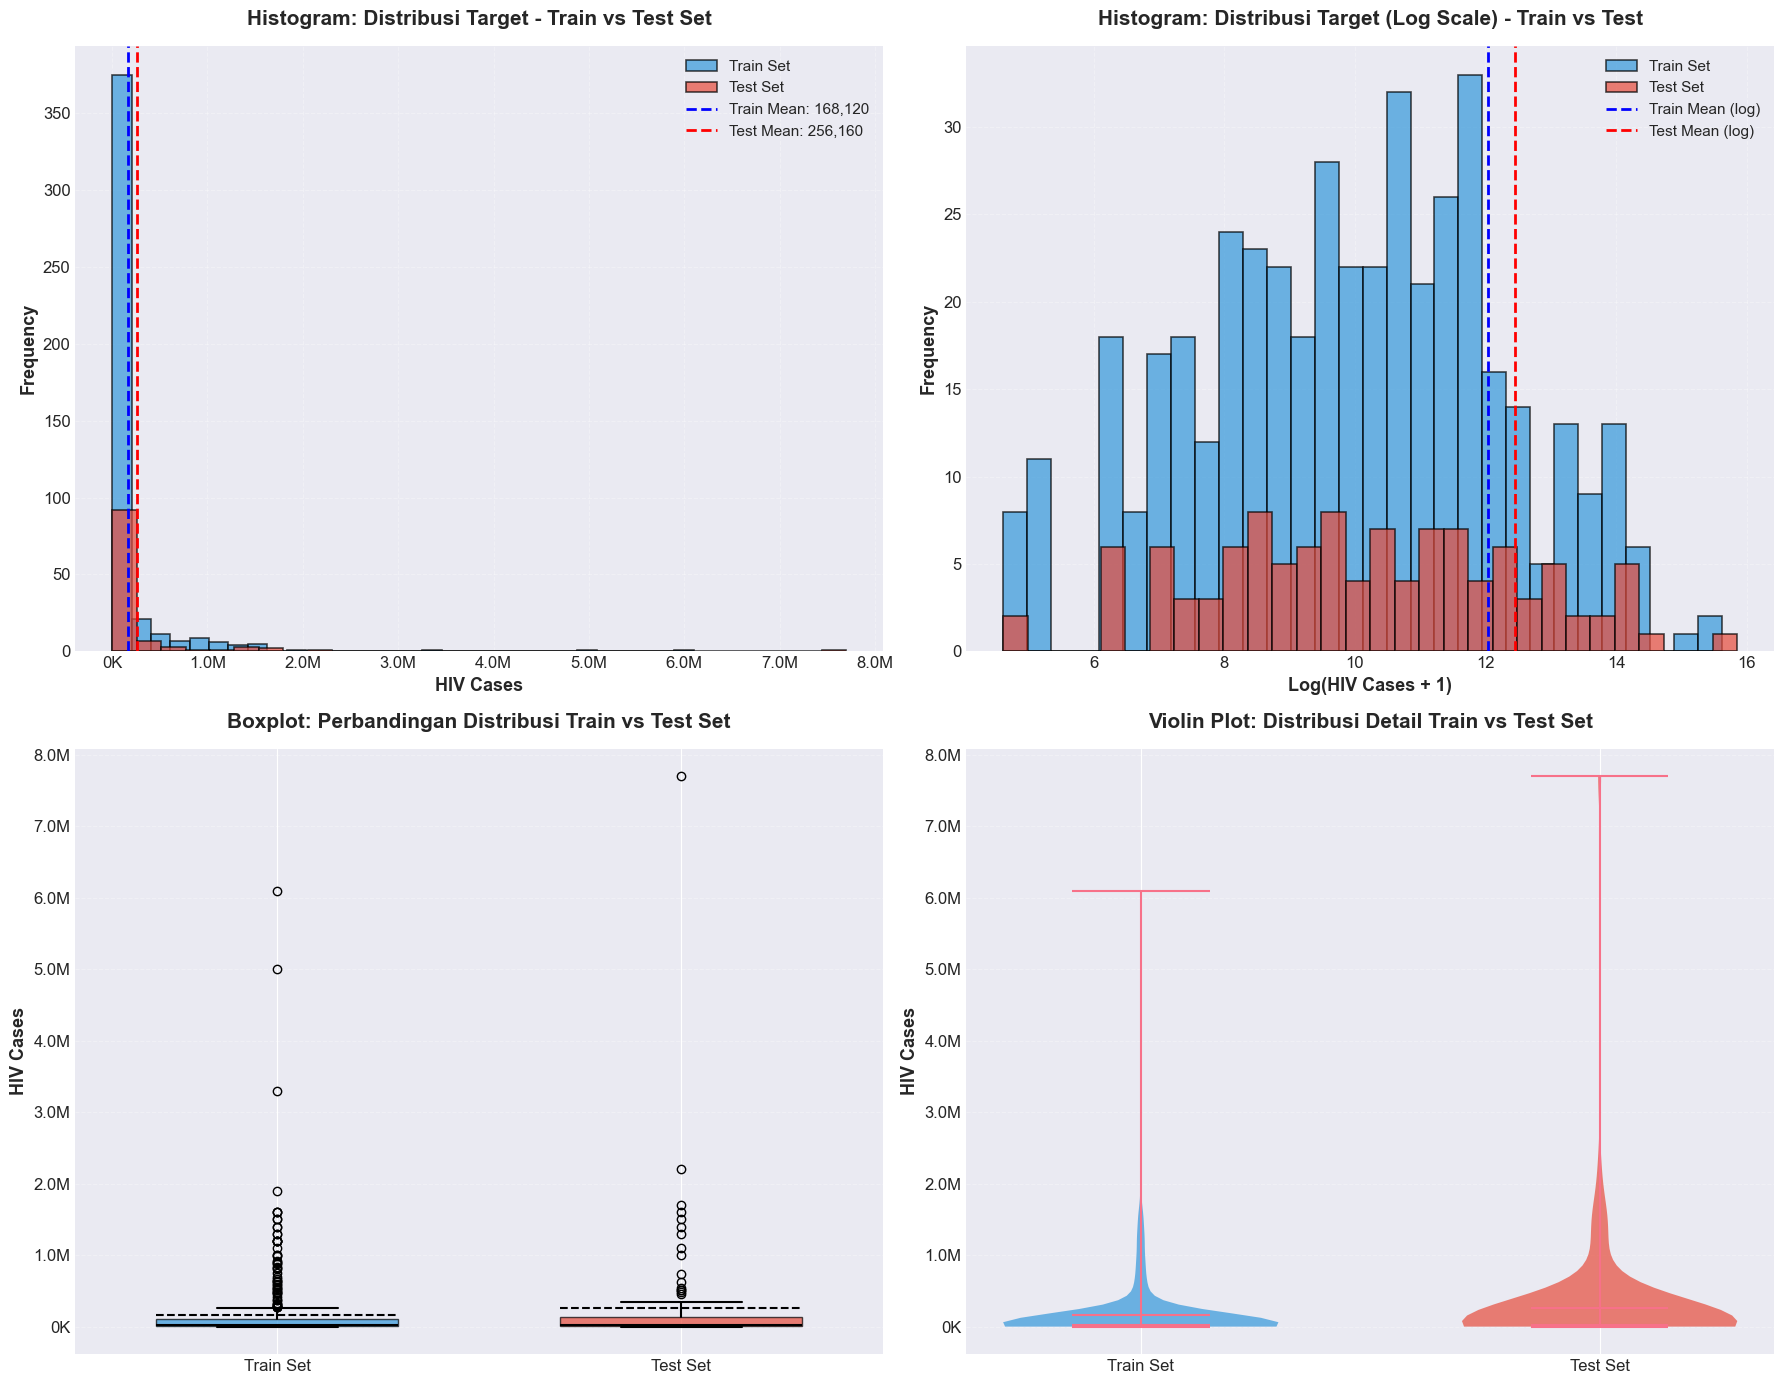


✅ Visualisasi distribusi target berhasil dibuat!


In [7]:
# VISUALISASI 1: Perbandingan Distribusi Target (Histogram)
print("=" * 80)
print("📊 VISUALISASI 1: Perbandingan Distribusi Target")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Histogram Perbandingan
axes[0, 0].hist(y_train, bins=30, alpha=0.7, label='Train Set', color='#3498db', edgecolor='black', linewidth=1.2)
axes[0, 0].hist(y_test, bins=30, alpha=0.7, label='Test Set', color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[0, 0].axvline(y_train.mean(), color='blue', linestyle='--', linewidth=2, label=f'Train Mean: {y_train.mean():,.0f}')
axes[0, 0].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Test Mean: {y_test.mean():,.0f}')
axes[0, 0].set_xlabel('HIV Cases', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Histogram: Distribusi Target - Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 2. Histogram Log Scale
axes[0, 1].hist(np.log1p(y_train), bins=30, alpha=0.7, label='Train Set', color='#3498db', edgecolor='black', linewidth=1.2)
axes[0, 1].hist(np.log1p(y_test), bins=30, alpha=0.7, label='Test Set', color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[0, 1].axvline(np.log1p(y_train.mean()), color='blue', linestyle='--', linewidth=2, label=f'Train Mean (log)')
axes[0, 1].axvline(np.log1p(y_test.mean()), color='red', linestyle='--', linewidth=2, label=f'Test Mean (log)')
axes[0, 1].set_xlabel('Log(HIV Cases + 1)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Histogram: Distribusi Target (Log Scale) - Train vs Test', fontsize=15, fontweight='bold', pad=15)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')

# 3. Boxplot Perbandingan
box_data = [y_train, y_test]
box_labels = ['Train Set', 'Test Set']
bp = axes[1, 0].boxplot(box_data, labels=box_labels, patch_artist=True, 
                        showmeans=True, meanline=True, widths=0.6)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#e74c3c')
bp['boxes'][1].set_alpha(0.7)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)
axes[1, 0].set_ylabel('HIV Cases', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Boxplot: Perbandingan Distribusi Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1, 0].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 4. Violin Plot
parts = axes[1, 1].violinplot([y_train, y_test], positions=[1, 2], showmeans=True, showmedians=True, widths=0.6)
for i, pc in enumerate(parts['bodies']):
    if i == 0:
        pc.set_facecolor('#3498db')
        pc.set_alpha(0.7)
    else:
        pc.set_facecolor('#e74c3c')
        pc.set_alpha(0.7)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Train Set', 'Test Set'])
axes[1, 1].set_ylabel('HIV Cases', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Violin Plot: Distribusi Detail Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi distribusi target berhasil dibuat!")


📊 VISUALISASI 2: Perbandingan Statistik Deskriptif


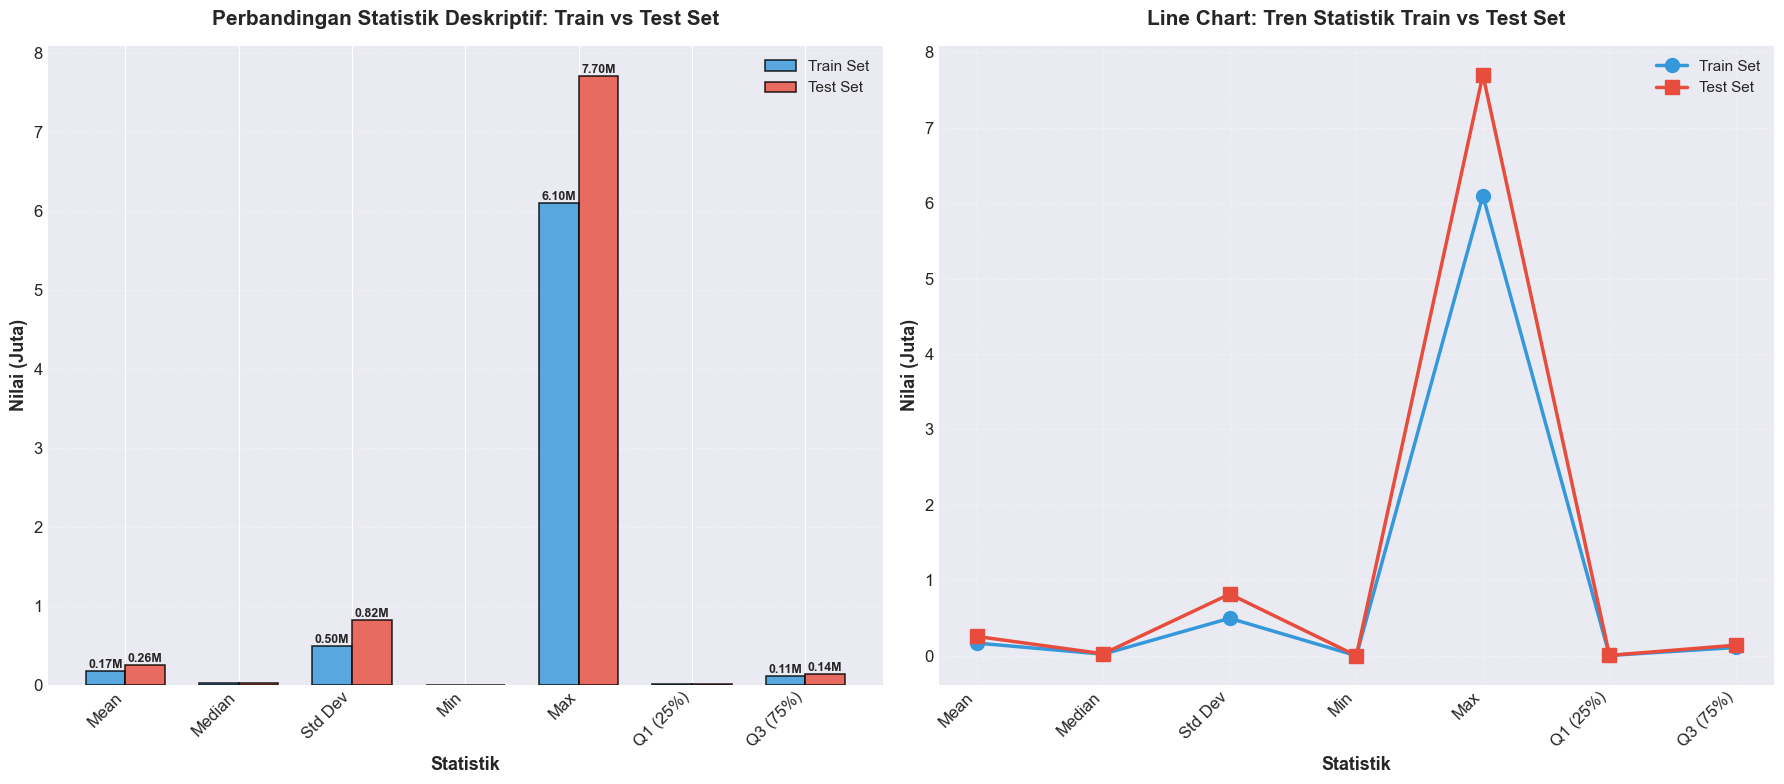


📊 Tabel Perbandingan Statistik:
Statistik    Train Set     Test Set
     Mean 1.681202e+05 2.561601e+05
   Median 2.100000e+04 2.600000e+04
  Std Dev 4.966361e+05 8.172824e+05
      Min 1.000000e+02 1.000000e+02
      Max 6.100000e+06 7.700000e+06
 Q1 (25%) 3.500000e+03 5.000000e+03
 Q3 (75%) 1.100000e+05 1.400000e+05

✅ Visualisasi perbandingan statistik berhasil dibuat!


In [8]:
# VISUALISASI 2: Perbandingan Statistik Deskriptif
print("=" * 80)
print("📊 VISUALISASI 2: Perbandingan Statistik Deskriptif")
print("=" * 80)

# Buat DataFrame untuk perbandingan
stats_comparison = pd.DataFrame({
    'Statistik': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)'],
    'Train Set': [
        y_train.mean(),
        y_train.median(),
        y_train.std(),
        y_train.min(),
        y_train.max(),
        y_train.quantile(0.25),
        y_train.quantile(0.75)
    ],
    'Test Set': [
        y_test.mean(),
        y_test.median(),
        y_test.std(),
        y_test.min(),
        y_test.max(),
        y_test.quantile(0.25),
        y_test.quantile(0.75)
    ]
})

# Normalisasi untuk visualisasi (dalam juta)
stats_comparison['Train Set (M)'] = stats_comparison['Train Set'] / 1e6
stats_comparison['Test Set (M)'] = stats_comparison['Test Set'] / 1e6

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Bar Chart Perbandingan
x = np.arange(len(stats_comparison))
width = 0.35

bars1 = axes[0].bar(x - width/2, stats_comparison['Train Set (M)'], width, 
                    label='Train Set', color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = axes[0].bar(x + width/2, stats_comparison['Test Set (M)'], width, 
                    label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.2)

axes[0].set_xlabel('Statistik', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Nilai (Juta)', fontsize=13, fontweight='bold')
axes[0].set_title('Perbandingan Statistik Deskriptif: Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[0].set_xticks(x)
axes[0].set_xticklabels(stats_comparison['Statistik'], rotation=45, ha='right')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.1:  # Hanya tampilkan jika nilai cukup besar
            axes[0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Line Chart Perbandingan
axes[1].plot(stats_comparison['Statistik'], stats_comparison['Train Set (M)'], 
             marker='o', linewidth=2.5, markersize=10, label='Train Set', color='#3498db')
axes[1].plot(stats_comparison['Statistik'], stats_comparison['Test Set (M)'], 
             marker='s', linewidth=2.5, markersize=10, label='Test Set', color='#e74c3c')
axes[1].set_xlabel('Statistik', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nilai (Juta)', fontsize=13, fontweight='bold')
axes[1].set_title('Line Chart: Tren Statistik Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1].set_xticklabels(stats_comparison['Statistik'], rotation=45, ha='right')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n📊 Tabel Perbandingan Statistik:")
print(stats_comparison[['Statistik', 'Train Set', 'Test Set']].to_string(index=False))
print("\n✅ Visualisasi perbandingan statistik berhasil dibuat!")


📊 VISUALISASI 3: Ukuran Train-Test Split


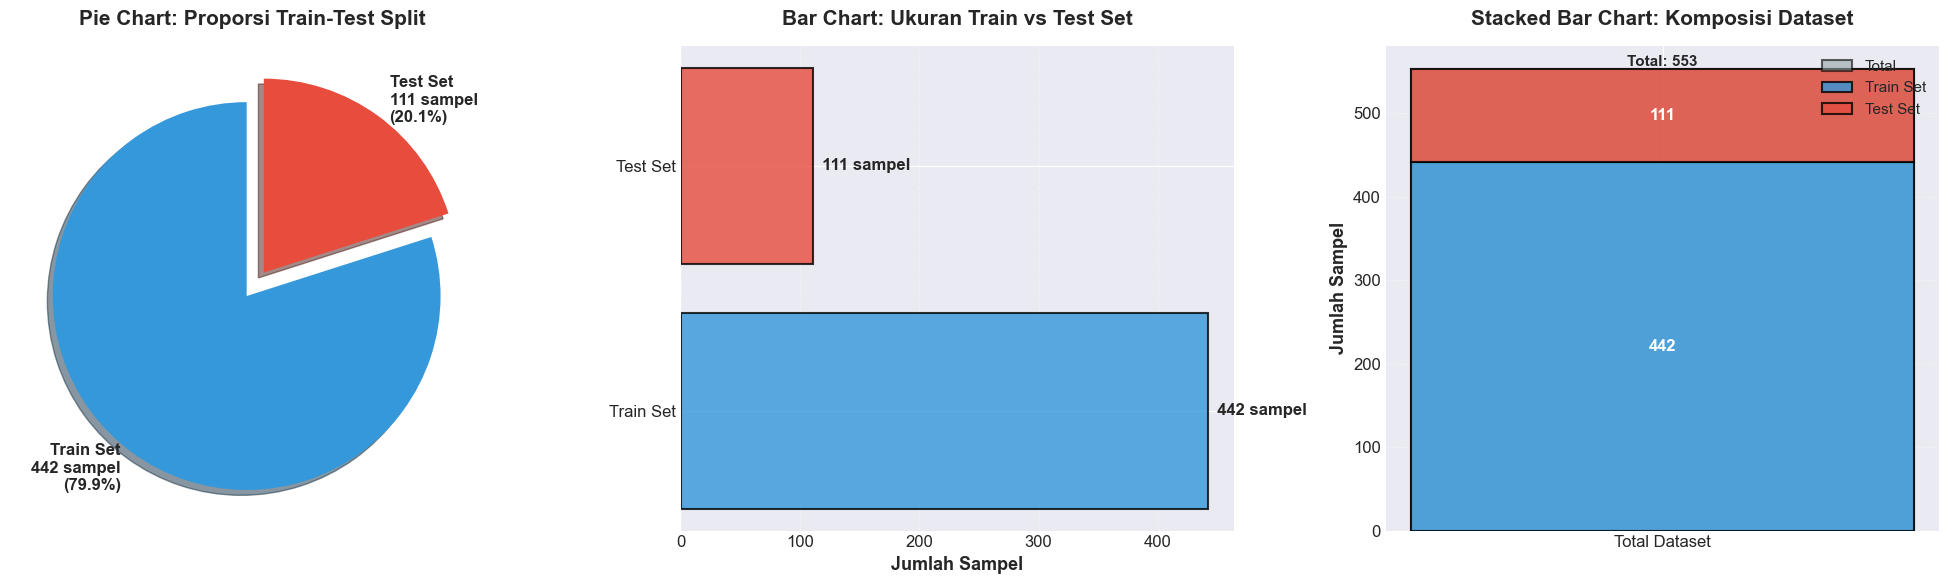


✅ Visualisasi ukuran split berhasil dibuat!


In [9]:
# VISUALISASI 3: Pie Chart dan Bar Chart Ukuran Split
print("=" * 80)
print("📊 VISUALISASI 3: Ukuran Train-Test Split")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Pie Chart
sizes = [len(X_train), len(X_test)]
labels = [f'Train Set\n{len(X_train)} sampel\n({len(X_train)/len(X)*100:.1f}%)', 
          f'Test Set\n{len(X_test)} sampel\n({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#3498db', '#e74c3c']
explode = (0.05, 0.1)

wedges, texts, autotexts = axes[0].pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                        autopct='', shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Pie Chart: Proporsi Train-Test Split', fontsize=15, fontweight='bold', pad=15)

# 2. Bar Chart Horizontal
categories = ['Train Set', 'Test Set']
counts = [len(X_train), len(X_test)]
colors_bar = ['#3498db', '#e74c3c']

bars = axes[1].barh(categories, counts, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Jumlah Sampel', fontsize=13, fontweight='bold')
axes[1].set_title('Bar Chart: Ukuran Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x', linestyle='--')

for i, (bar, count) in enumerate(zip(bars, counts)):
    axes[1].text(count, i, f'  {count} sampel', va='center', fontsize=12, fontweight='bold')

# 3. Stacked Bar Chart
axes[2].bar(['Total Dataset'], [len(X)], color='#95a5a6', alpha=0.6, edgecolor='black', linewidth=1.5, label='Total')
axes[2].bar(['Total Dataset'], [len(X_train)], color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5, label='Train Set')
axes[2].bar(['Total Dataset'], [len(X_test)], bottom=[len(X_train)], color='#e74c3c', alpha=0.8, 
            edgecolor='black', linewidth=1.5, label='Test Set')
axes[2].set_ylabel('Jumlah Sampel', fontsize=13, fontweight='bold')
axes[2].set_title('Stacked Bar Chart: Komposisi Dataset', fontsize=15, fontweight='bold', pad=15)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y', linestyle='--')

axes[2].text(0, len(X_train)/2, f'{len(X_train)}', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')
axes[2].text(0, len(X_train) + len(X_test)/2, f'{len(X_test)}', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')
axes[2].text(0, len(X), f'Total: {len(X)}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi ukuran split berhasil dibuat!")


## 5. Visualisasi Peta Choropleth - Distribusi Geografis

**Langkah:**
- Membuat peta choropleth untuk melihat distribusi data HIV per negara
- Menampilkan data train dan test set di peta
- Visualisasi geografis yang interaktif dan informatif


In [10]:
# VISUALISASI 4: Peta Choropleth - Distribusi Geografis
print("=" * 80)
print("🗺️ VISUALISASI 4: Peta Choropleth - Distribusi Geografis")
print("=" * 80)

# Gabungkan data train dan test dengan informasi negara
# Kita perlu mendapatkan informasi negara untuk setiap sampel
train_indices = X_train.index
test_indices = X_test.index

# Buat dataframe untuk mapping
df_train_map = df_features.loc[train_indices, ['Country', 'Count_median', 'WHO Region', 'Year']].copy()
df_train_map['Set'] = 'Train'
df_test_map = df_features.loc[test_indices, ['Country', 'Count_median', 'WHO Region', 'Year']].copy()
df_test_map['Set'] = 'Test'

# Gabungkan
df_map = pd.concat([df_train_map, df_test_map], ignore_index=True)

# Agregasi per negara (rata-rata jika ada multiple entries)
df_map_agg = df_map.groupby('Country').agg({
    'Count_median': 'mean',
    'WHO Region': 'first',
    'Set': lambda x: ', '.join(x.unique()),  # Gabungkan set yang ada
    'Year': 'mean'
}).reset_index()

print(f"\n✅ Data untuk peta berhasil disiapkan!")
print(f"   • Total negara: {len(df_map_agg)}")
print(f"\n📊 Preview data peta:")
print(df_map_agg.head(10))


🗺️ VISUALISASI 4: Peta Choropleth - Distribusi Geografis

✅ Data untuk peta berhasil disiapkan!
   • Total negara: 140

📊 Preview data peta:
       Country  Count_median             WHO Region          Set     Year
0  Afghanistan        3975.0  Eastern Mediterranean  Train, Test  2008.25
1      Algeria        7175.0                 Africa  Train, Test  2008.25
2       Angola      196750.0                 Africa  Train, Test  2008.25
3    Argentina       99750.0               Americas        Train  2008.25
4      Armenia        2612.5                 Europe        Train  2008.25
5    Australia       19500.0        Western Pacific        Train  2008.25
6      Bahamas        5500.0               Americas  Train, Test  2008.25
7   Bangladesh        6660.0        South-East Asia  Train, Test  2008.25
8     Barbados        2025.0               Americas  Train, Test  2008.25
9      Belarus       11450.0                 Europe  Train, Test  2008.25


In [11]:
# Membuat Peta Choropleth dengan Plotly - DENGAN INFORMASI LENGKAP (Nama Negara, Region, Jumlah Kasus)
print("=" * 80)
print("🗺️ MEMBUAT PETA CHOROPLETH - DENGAN INFORMASI LENGKAP")
print("=" * 80)

if PLOTLY_AVAILABLE:
    print("\n🗺️ Membuat Peta Choropleth dengan Plotly...")
    
    # Mapping nama negara yang mungkin tidak cocok dengan plotly
    country_mapping = {
        'United States of America': 'United States',
        'United Republic of Tanzania': 'Tanzania',
        'Russian Federation': 'Russia',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Republic of Korea': 'South Korea',
        'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
        'Republic of the Congo': 'Congo',
        'Lao People\'s Democratic Republic': 'Laos',
        'Viet Nam': 'Vietnam',
        'Myanmar': 'Myanmar',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'Republic of Moldova': 'Moldova',
        'Czech Republic': 'Czechia'
    }
    
    # Copy dan mapping nama negara
    df_map_plotly = df_map_agg.copy()
    df_map_plotly['Country_Plotly'] = df_map_plotly['Country'].map(country_mapping).fillna(df_map_plotly['Country'])
    
    # Format jumlah kasus untuk display yang lebih baik
    df_map_plotly['Kasus_Formatted'] = df_map_plotly['Count_median'].apply(
        lambda x: f"{x:,.0f}" if x < 1000 else f"{x/1000:,.1f}K" if x < 1000000 else f"{x/1000000:,.2f}M"
    )
    
    print(f"\n📊 Total negara untuk peta: {len(df_map_plotly)}")
    print(f"📊 Range kasus HIV: {df_map_plotly['Count_median'].min():,.0f} - {df_map_plotly['Count_median'].max():,.0f}")
    print(f"\n✅ Data peta sudah diformat dengan informasi lengkap!")
    print(f"\n📋 Contoh informasi yang akan ditampilkan:")
    print(df_map_plotly[['Country', 'WHO Region', 'Kasus_Formatted', 'Count_median']].head(5).to_string(index=False))
    
    # Peta 1: Distribusi Total HIV Cases per Negara - DENGAN INFORMASI LENGKAP
    try:
        print("\n🗺️ Membuat Peta 1: Distribusi Total Kasus HIV per Negara...")
        
        fig1 = px.choropleth(
            df_map_plotly,
            locations='Country_Plotly',
            locationmode='country names',
            color='Count_median',
            hover_name='Country',
            hover_data={
                'WHO Region': True, 
                'Count_median': ':,.0f',
                'Kasus_Formatted': True,
                'Set': True,
                'Country_Plotly': False
            },
            color_continuous_scale='Reds',
            title='🗺️ Peta Choropleth: Distribusi Kasus HIV per Negara<br><sub>Hover untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus</sub>',
            labels={
                'Count_median': 'Jumlah Kasus HIV',
                'WHO Region': 'WHO Region',
                'Kasus_Formatted': 'Kasus (Formatted)'
            },
            height=750
        )
        
        # Update hover template untuk menampilkan informasi lengkap
        fig1.update_traces(
            hovertemplate='<b>%{hovertext}</b><br>' +
                          '<b>Region WHO:</b> %{customdata[0]}<br>' +
                          '<b>Jumlah Kasus:</b> %{customdata[1]:,.0f} (%{customdata[2]})<br>' +
                          '<b>Set:</b> %{customdata[3]}<br>' +
                          '<extra></extra>',
            customdata=df_map_plotly[['WHO Region', 'Count_median', 'Kasus_Formatted', 'Set']].values
        )
        
        fig1.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth',
                bgcolor='rgba(0,0,0,0)',
                lakecolor='rgba(0,0,0,0)',
                landcolor='rgba(243,243,243,1)',
                showocean=True,
                oceancolor='rgba(230,245,255,1)',
                showcountries=True,
                countrycolor='rgba(200,200,200,0.5)',
                countrywidth=0.5
            ),
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_x=0.5,
            margin=dict(l=0, r=0, t=80, b=0),
            hovermode='closest'
        )
        
        fig1.update_coloraxes(
            colorbar=dict(
                title=dict(text="Jumlah Kasus HIV", font=dict(size=14, family="Arial")),
                tickfont=dict(size=11),
                len=0.8,
                thickness=20,
                x=1.02
            )
        )
        
        print("✅ Peta 1 berhasil dibuat!")
        print("💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus")
        fig1.show()
        
    except Exception as e:
        print(f"⚠️ Error membuat peta 1: {str(e)}")
        import traceback
        print(traceback.format_exc())
    
    # Peta 2: Perbandingan Train vs Test Set - DENGAN INFORMASI LENGKAP
    try:
        print("\n🗺️ Membuat Peta 2: Perbandingan Train Set vs Test Set...")
        
        # Buat dataframe terpisah untuk train dan test dengan informasi lengkap
        df_train_full = df_map[df_map['Set'] == 'Train'].groupby('Country').agg({
            'Count_median': 'mean',
            'WHO Region': 'first'
        }).reset_index()
        df_train_full['Set'] = 'Train'
        df_train_full['Country_Plotly'] = df_train_full['Country'].map(country_mapping).fillna(df_train_full['Country'])
        df_train_full['Kasus_Formatted'] = df_train_full['Count_median'].apply(
            lambda x: f"{x:,.0f}" if x < 1000 else f"{x/1000:,.1f}K" if x < 1000000 else f"{x/1000000:,.2f}M"
        )
        
        df_test_full = df_map[df_map['Set'] == 'Test'].groupby('Country').agg({
            'Count_median': 'mean',
            'WHO Region': 'first'
        }).reset_index()
        df_test_full['Set'] = 'Test'
        df_test_full['Country_Plotly'] = df_test_full['Country'].map(country_mapping).fillna(df_test_full['Country'])
        df_test_full['Kasus_Formatted'] = df_test_full['Count_median'].apply(
            lambda x: f"{x:,.0f}" if x < 1000 else f"{x/1000:,.1f}K" if x < 1000000 else f"{x/1000000:,.2f}M"
        )
        
        # Gabungkan untuk perbandingan
        df_comparison = pd.concat([df_train_full, df_test_full], ignore_index=True)
        
        fig2 = px.choropleth(
            df_comparison,
            locations='Country_Plotly',
            locationmode='country names',
            color='Count_median',
            facet_col='Set',
            hover_name='Country',
            hover_data={
                'WHO Region': True,
                'Count_median': ':,.0f',
                'Kasus_Formatted': True,
                'Country_Plotly': False
            },
            color_continuous_scale='RdYlBu_r',
            title='🗺️ Peta Choropleth: Perbandingan Train Set vs Test Set<br><sub>Hover untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus</sub>',
            labels={
                'Count_median': 'Jumlah Kasus HIV',
                'WHO Region': 'WHO Region',
                'Kasus_Formatted': 'Kasus (Formatted)'
            },
            height=650
        )
        
        # Update hover template untuk setiap facet
        for i, trace in enumerate(fig2.data):
            set_name = 'Train' if i < len(fig2.data)//2 else 'Test'
            subset = df_comparison[df_comparison['Set'] == set_name].reset_index(drop=True)
            if len(subset) > 0:
                trace.hovertemplate = (
                    '<b>%{hovertext}</b><br>' +
                    '<b>Region WHO:</b> %{customdata[0]}<br>' +
                    '<b>Jumlah Kasus:</b> %{customdata[1]:,.0f} (%{customdata[2]})<br>' +
                    '<b>Set:</b> ' + set_name + '<br>' +
                    '<extra></extra>'
                )
                trace.customdata = subset[['WHO Region', 'Count_median', 'Kasus_Formatted']].values
        
        fig2.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth',
                bgcolor='rgba(0,0,0,0)',
                lakecolor='rgba(0,0,0,0)',
                landcolor='rgba(243,243,243,1)',
                showocean=True,
                oceancolor='rgba(230,245,255,1)',
                showcountries=True,
                countrycolor='rgba(200,200,200,0.5)',
                countrywidth=0.5
            ),
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_x=0.5,
            margin=dict(l=0, r=0, t=80, b=0),
            hovermode='closest'
        )
        
        fig2.update_coloraxes(
            colorbar=dict(
                title=dict(text="Jumlah Kasus HIV", font=dict(size=14, family="Arial")),
                tickfont=dict(size=11),
                len=0.8,
                thickness=20
            )
        )
        
        print("✅ Peta 2 berhasil dibuat!")
        print("💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus")
        fig2.show()
        
    except Exception as e:
        print(f"⚠️ Error membuat peta 2: {str(e)}")
        import traceback
        print(traceback.format_exc())
    
    # Peta 3: Peta per WHO Region dengan warna berbeda - DENGAN INFORMASI LENGKAP
    try:
        print("\n🗺️ Membuat Peta 3: Distribusi dengan Warna per Region...")
        
        fig3 = px.choropleth(
            df_map_plotly,
            locations='Country_Plotly',
            locationmode='country names',
            color='Count_median',
            hover_name='Country',
            hover_data={
                'WHO Region': True,
                'Count_median': ':,.0f',
                'Kasus_Formatted': True,
                'Set': True,
                'Country_Plotly': False
            },
            color_continuous_scale='YlOrRd',
            title='🗺️ Peta Choropleth: Distribusi Kasus HIV dengan Warna per Region<br><sub>Hover untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus</sub>',
            labels={
                'Count_median': 'Jumlah Kasus HIV',
                'WHO Region': 'WHO Region',
                'Kasus_Formatted': 'Kasus (Formatted)'
            },
            height=750
        )
        
        # Update hover template untuk menampilkan informasi lengkap
        fig3.update_traces(
            hovertemplate='<b>%{hovertext}</b><br>' +
                          '<b>Region WHO:</b> %{customdata[0]}<br>' +
                          '<b>Jumlah Kasus:</b> %{customdata[1]:,.0f} (%{customdata[2]})<br>' +
                          '<b>Set:</b> %{customdata[3]}<br>' +
                          '<extra></extra>',
            customdata=df_map_plotly[['WHO Region', 'Count_median', 'Kasus_Formatted', 'Set']].values
        )
        
        fig3.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth',
                bgcolor='rgba(0,0,0,0)',
                lakecolor='rgba(0,0,0,0)',
                landcolor='rgba(243,243,243,1)',
                showocean=True,
                oceancolor='rgba(230,245,255,1)',
                showcountries=True,
                countrycolor='rgba(200,200,200,0.5)',
                countrywidth=0.5
            ),
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_x=0.5,
            margin=dict(l=0, r=0, t=80, b=0),
            hovermode='closest'
        )
        
        fig3.update_coloraxes(
            colorbar=dict(
                title=dict(text="Jumlah Kasus HIV", font=dict(size=14, family="Arial")),
                tickfont=dict(size=11),
                len=0.8,
                thickness=20,
                x=1.02
            )
        )
        
        print("✅ Peta 3 berhasil dibuat!")
        print("💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus")
        fig3.show()
        
    except Exception as e:
        print(f"⚠️ Error membuat peta 3: {str(e)}")
        import traceback
        print(traceback.format_exc())
    
    print("\n" + "=" * 80)
    print("✅ SEMUA PETA CHOROPLETH BERHASIL DIBUAT DENGAN INFORMASI LENGKAP!")
    print("=" * 80)
    print("\n📋 INFORMASI YANG DITAMPILKAN DI PETA:")
    print("   ✅ Nama Negara (di hover)")
    print("   ✅ Nama Region WHO (di hover)")
    print("   ✅ Jumlah Kasus HIV (di hover dan colorbar)")
    print("   ✅ Set (Train/Test) - di hover")
    print("\n💡 CARA MENGGUNAKAN:")
    print("   • Hover mouse di atas negara untuk melihat informasi lengkap")
    print("   • Zoom dengan scroll mouse")
    print("   • Pan dengan drag mouse")
    print("   • Download peta dengan tombol di toolbar")
    
else:
    print("\n⚠️ Plotly tidak tersedia. Membuat visualisasi alternatif dengan matplotlib...")
    
    # Visualisasi alternatif: Bar chart per region
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # 1. Bar chart per WHO Region
    region_stats = df_map_agg.groupby('WHO Region')['Count_median'].agg(['mean', 'sum', 'count']).reset_index()
    region_stats = region_stats.sort_values('sum', ascending=False)
    
    axes[0, 0].barh(region_stats['WHO Region'], region_stats['sum']/1e6, color='#e74c3c', alpha=0.8)
    axes[0, 0].set_xlabel('Total Kasus HIV (Juta)', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Total Kasus HIV per WHO Region', fontsize=14, fontweight='bold', pad=15)
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # 2. Rata-rata per region
    axes[0, 1].barh(region_stats['WHO Region'], region_stats['mean']/1e3, color='#3498db', alpha=0.8)
    axes[0, 1].set_xlabel('Rata-rata Kasus HIV (Ribu)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Rata-rata Kasus HIV per WHO Region', fontsize=14, fontweight='bold', pad=15)
    axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # 3. Jumlah negara per region
    axes[1, 0].barh(region_stats['WHO Region'], region_stats['count'], color='#2ecc71', alpha=0.8)
    axes[1, 0].set_xlabel('Jumlah Negara', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Jumlah Negara per WHO Region', fontsize=14, fontweight='bold', pad=15)
    axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # 4. Top 20 negara dengan kasus tertinggi
    top_countries = df_map_agg.nlargest(20, 'Count_median')
    axes[1, 1].barh(range(len(top_countries)), top_countries['Count_median']/1e6, color='#9b59b6', alpha=0.8)
    axes[1, 1].set_yticks(range(len(top_countries)))
    axes[1, 1].set_yticklabels(top_countries['Country'])
    axes[1, 1].set_xlabel('Jumlah Kasus HIV (Juta)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Top 20 Negara dengan Kasus HIV Tertinggi', fontsize=14, fontweight='bold', pad=15)
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    axes[1, 1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualisasi alternatif berhasil dibuat!")
    print("💡 Untuk peta choropleth interaktif, install plotly: pip install plotly")


🗺️ MEMBUAT PETA CHOROPLETH - DENGAN INFORMASI LENGKAP

🗺️ Membuat Peta Choropleth dengan Plotly...

📊 Total negara untuk peta: 140
📊 Range kasus HIV: 150 - 5,525,000

✅ Data peta sudah diformat dengan informasi lengkap!

📋 Contoh informasi yang akan ditampilkan:
    Country            WHO Region Kasus_Formatted  Count_median
Afghanistan Eastern Mediterranean            4.0K        3975.0
    Algeria                Africa            7.2K        7175.0
     Angola                Africa          196.8K      196750.0
  Argentina              Americas           99.8K       99750.0
    Armenia                Europe            2.6K        2612.5

🗺️ Membuat Peta 1: Distribusi Total Kasus HIV per Negara...
✅ Peta 1 berhasil dibuat!
💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus



🗺️ Membuat Peta 2: Perbandingan Train Set vs Test Set...
✅ Peta 2 berhasil dibuat!
💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus



🗺️ Membuat Peta 3: Distribusi dengan Warna per Region...
✅ Peta 3 berhasil dibuat!
💡 Hover pada negara untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus



✅ SEMUA PETA CHOROPLETH BERHASIL DIBUAT DENGAN INFORMASI LENGKAP!

📋 INFORMASI YANG DITAMPILKAN DI PETA:
   ✅ Nama Negara (di hover)
   ✅ Nama Region WHO (di hover)
   ✅ Jumlah Kasus HIV (di hover dan colorbar)
   ✅ Set (Train/Test) - di hover

💡 CARA MENGGUNAKAN:
   • Hover mouse di atas negara untuk melihat informasi lengkap
   • Zoom dengan scroll mouse
   • Pan dengan drag mouse
   • Download peta dengan tombol di toolbar


📊 VISUALISASI TAMBAHAN: Heatmap Distribusi per Region


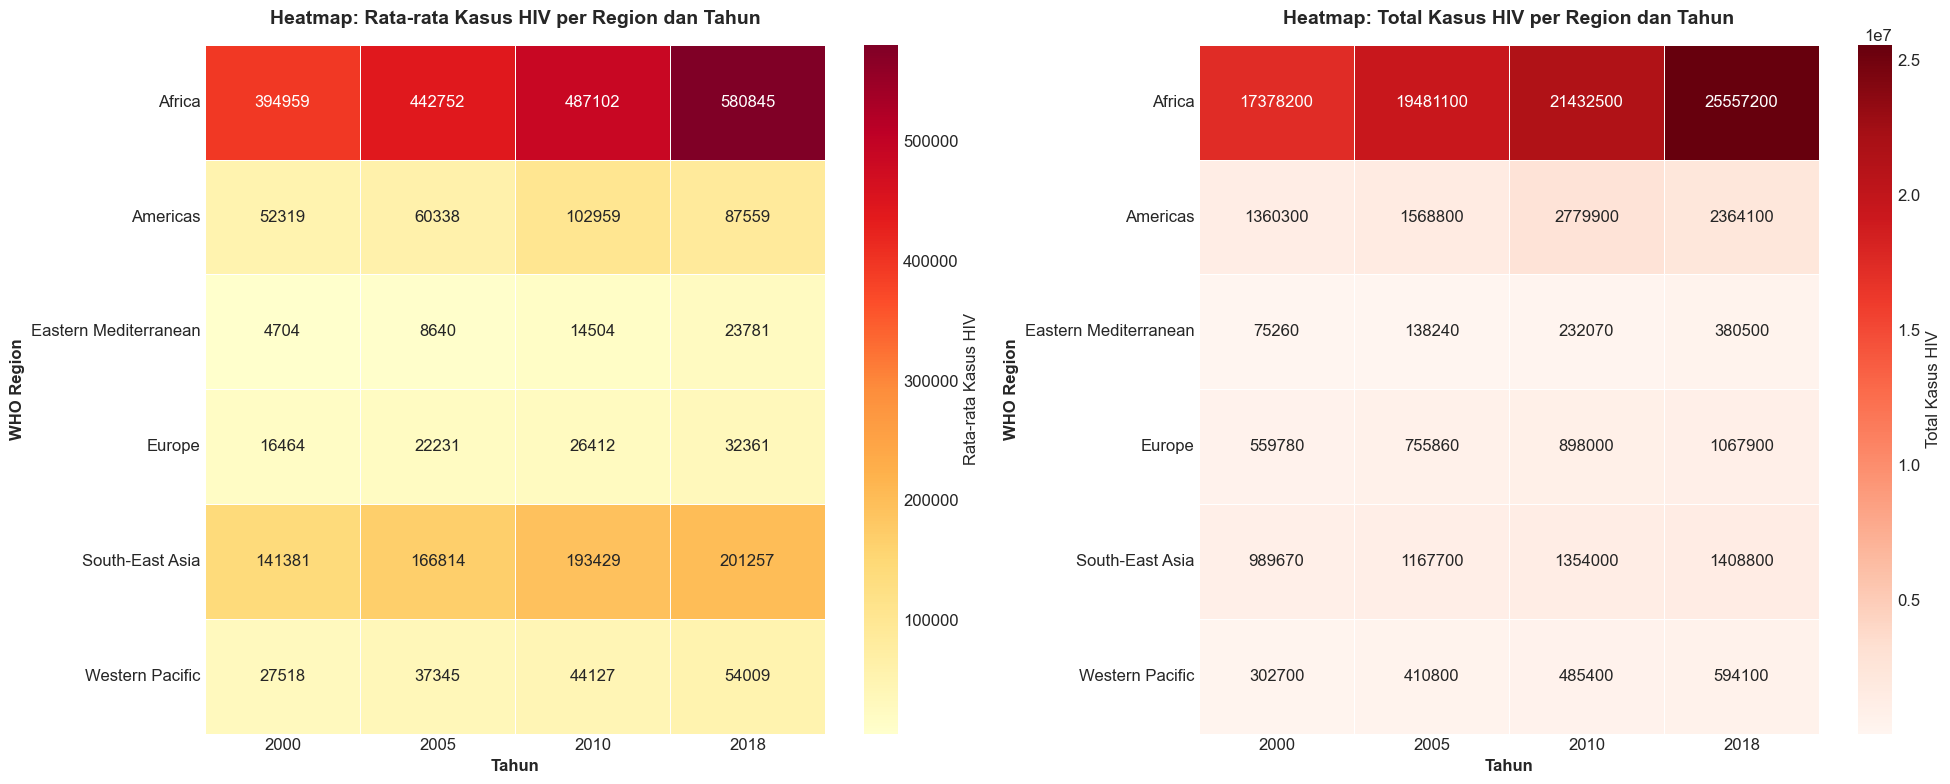


✅ Heatmap distribusi per region berhasil dibuat!


In [12]:
# Visualisasi Tambahan: Heatmap per Region dan Tahun
print("=" * 80)
print("📊 VISUALISASI TAMBAHAN: Heatmap Distribusi per Region")
print("=" * 80)

# Buat heatmap untuk melihat distribusi per region
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Heatmap: Rata-rata kasus per region
region_year_data = df_features.groupby(['WHO Region', 'Year'])['Count_median'].mean().unstack(fill_value=0)

sns.heatmap(region_year_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            ax=axes[0], cbar_kws={'label': 'Rata-rata Kasus HIV'}, linewidths=0.5)
axes[0].set_title('Heatmap: Rata-rata Kasus HIV per Region dan Tahun', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Tahun', fontsize=12, fontweight='bold')
axes[0].set_ylabel('WHO Region', fontsize=12, fontweight='bold')

# 2. Heatmap: Total kasus per region
region_year_total = df_features.groupby(['WHO Region', 'Year'])['Count_median'].sum().unstack(fill_value=0)

sns.heatmap(region_year_total, annot=True, fmt='.0f', cmap='Reds', 
            ax=axes[1], cbar_kws={'label': 'Total Kasus HIV'}, linewidths=0.5)
axes[1].set_title('Heatmap: Total Kasus HIV per Region dan Tahun', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Tahun', fontsize=12, fontweight='bold')
axes[1].set_ylabel('WHO Region', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Heatmap distribusi per region berhasil dibuat!")


📊 VISUALISASI: Distribusi Geografis Train vs Test Set

📊 DISTRIBUSI PER REGION - TRAIN SET:
                       Jumlah_Sampel  Rata_rata       Total
WHO Region                                                 
Africa                           132  449347.73  59313900.0
Americas                          88   82973.86   7301700.0
Eastern Mediterranean             51   13995.49    713770.0
Europe                           110   24405.18   2684570.0
South-East Asia                   22  127735.00   2810170.0
Western Pacific                   39   38076.92   1485000.0

📊 DISTRIBUSI PER REGION - TEST SET:
                       Jumlah_Sampel  Rata_rata       Total
WHO Region                                                 
Africa                            44  557615.91  24535100.0
Americas                          18   42855.56    771400.0
Eastern Mediterranean             13    8638.46    112300.0
Europe                            25   23878.80    596970.0
South-East Asia                

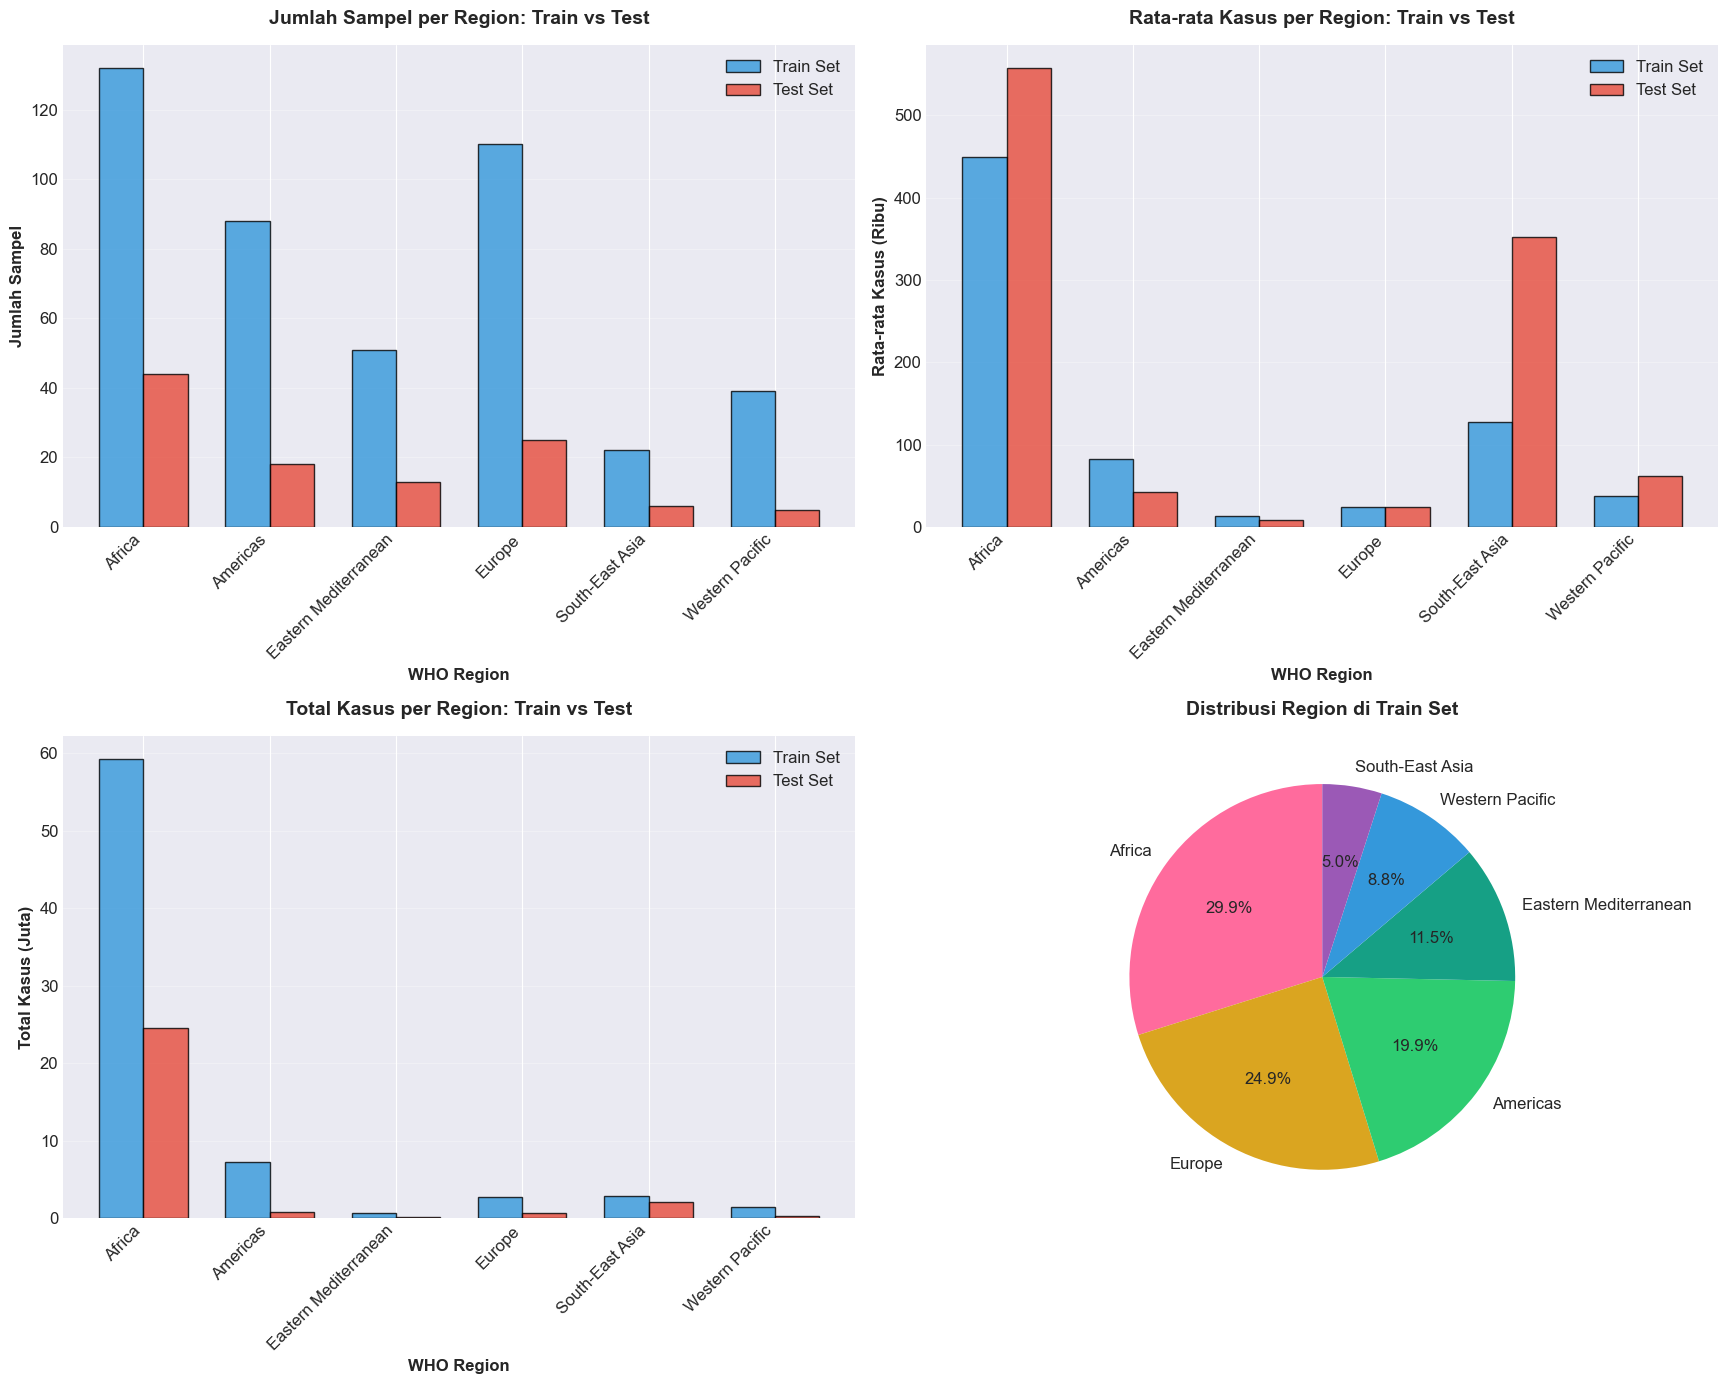


✅ Visualisasi distribusi geografis berhasil dibuat!


In [13]:
# Visualisasi: Distribusi Geografis Train vs Test Set
print("=" * 80)
print("📊 VISUALISASI: Distribusi Geografis Train vs Test Set")
print("=" * 80)

# Analisis distribusi per region untuk train dan test
train_regions = df_features.loc[train_indices].groupby('WHO Region').agg({
    'Count_median': ['count', 'mean', 'sum']
}).round(2)
train_regions.columns = ['Jumlah_Sampel', 'Rata_rata', 'Total']

test_regions = df_features.loc[test_indices].groupby('WHO Region').agg({
    'Count_median': ['count', 'mean', 'sum']
}).round(2)
test_regions.columns = ['Jumlah_Sampel', 'Rata_rata', 'Total']

print("\n📊 DISTRIBUSI PER REGION - TRAIN SET:")
print(train_regions)

print("\n📊 DISTRIBUSI PER REGION - TEST SET:")
print(test_regions)

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Jumlah sampel per region
regions = train_regions.index
x = np.arange(len(regions))
width = 0.35

axes[0, 0].bar(x - width/2, train_regions['Jumlah_Sampel'], width, 
               label='Train Set', color='#3498db', alpha=0.8, edgecolor='black')
axes[0, 0].bar(x + width/2, test_regions['Jumlah_Sampel'], width, 
               label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black')
axes[0, 0].set_xlabel('WHO Region', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Jumlah Sampel', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Jumlah Sampel per Region: Train vs Test', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(regions, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Rata-rata kasus per region
axes[0, 1].bar(x - width/2, train_regions['Rata_rata']/1e3, width, 
               label='Train Set', color='#3498db', alpha=0.8, edgecolor='black')
axes[0, 1].bar(x + width/2, test_regions['Rata_rata']/1e3, width, 
               label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black')
axes[0, 1].set_xlabel('WHO Region', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Rata-rata Kasus (Ribu)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Rata-rata Kasus per Region: Train vs Test', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(regions, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Total kasus per region
axes[1, 0].bar(x - width/2, train_regions['Total']/1e6, width, 
               label='Train Set', color='#3498db', alpha=0.8, edgecolor='black')
axes[1, 0].bar(x + width/2, test_regions['Total']/1e6, width, 
               label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1, 0].set_xlabel('WHO Region', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Total Kasus (Juta)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total Kasus per Region: Train vs Test', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(regions, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Pie chart distribusi region di train set
train_region_counts = df_features.loc[train_indices]['WHO Region'].value_counts()

# Mapping warna yang sesuai dengan pie chart (berdasarkan urutan di pie chart)
region_color_map = {
    'Africa': '#ff6b9d',  # Pink (29.9%)
    'Europe': '#daa520',  # Golden brown (24.9%)
    'Americas': '#2ecc71',  # Green (19.9%)
    'Eastern Mediterranean': '#16a085',  # Teal (11.5%)
    'Western Pacific': '#3498db',  # Blue (8.8%)
    'South-East Asia': '#9b59b6'  # Magenta/Purple (5.0%)
}

# Buat list warna sesuai urutan region di train_region_counts
pie_colors = [region_color_map.get(region, '#95a5a6') for region in train_region_counts.index]

axes[1, 1].pie(train_region_counts.values, labels=train_region_counts.index, autopct='%1.1f%%',
               startangle=90, colors=pie_colors)
axes[1, 1].set_title('Distribusi Region di Train Set', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi distribusi geografis berhasil dibuat!")


## 6. Ringkasan dan Kesimpulan

**Hasil Analisis:**
- Train-test split telah dilakukan dengan baik menggunakan semua data
- Distribusi data pada train dan test set telah dianalisis
- Visualisasi lengkap termasuk peta choropleth telah dibuat


## 7. Dashboard Komprehensif - Semua Visualisasi dalam Satu Tampilan

**Dashboard Lengkap:**
- Menggabungkan SEMUA visualisasi dalam satu dashboard
- Informasi split, distribusi, statistik, dan peta choropleth
- Tampilan yang jelas, baik, dan sempurna


📊 DASHBOARD KOMPREHENSIF - Semua Visualisasi Train-Test Split


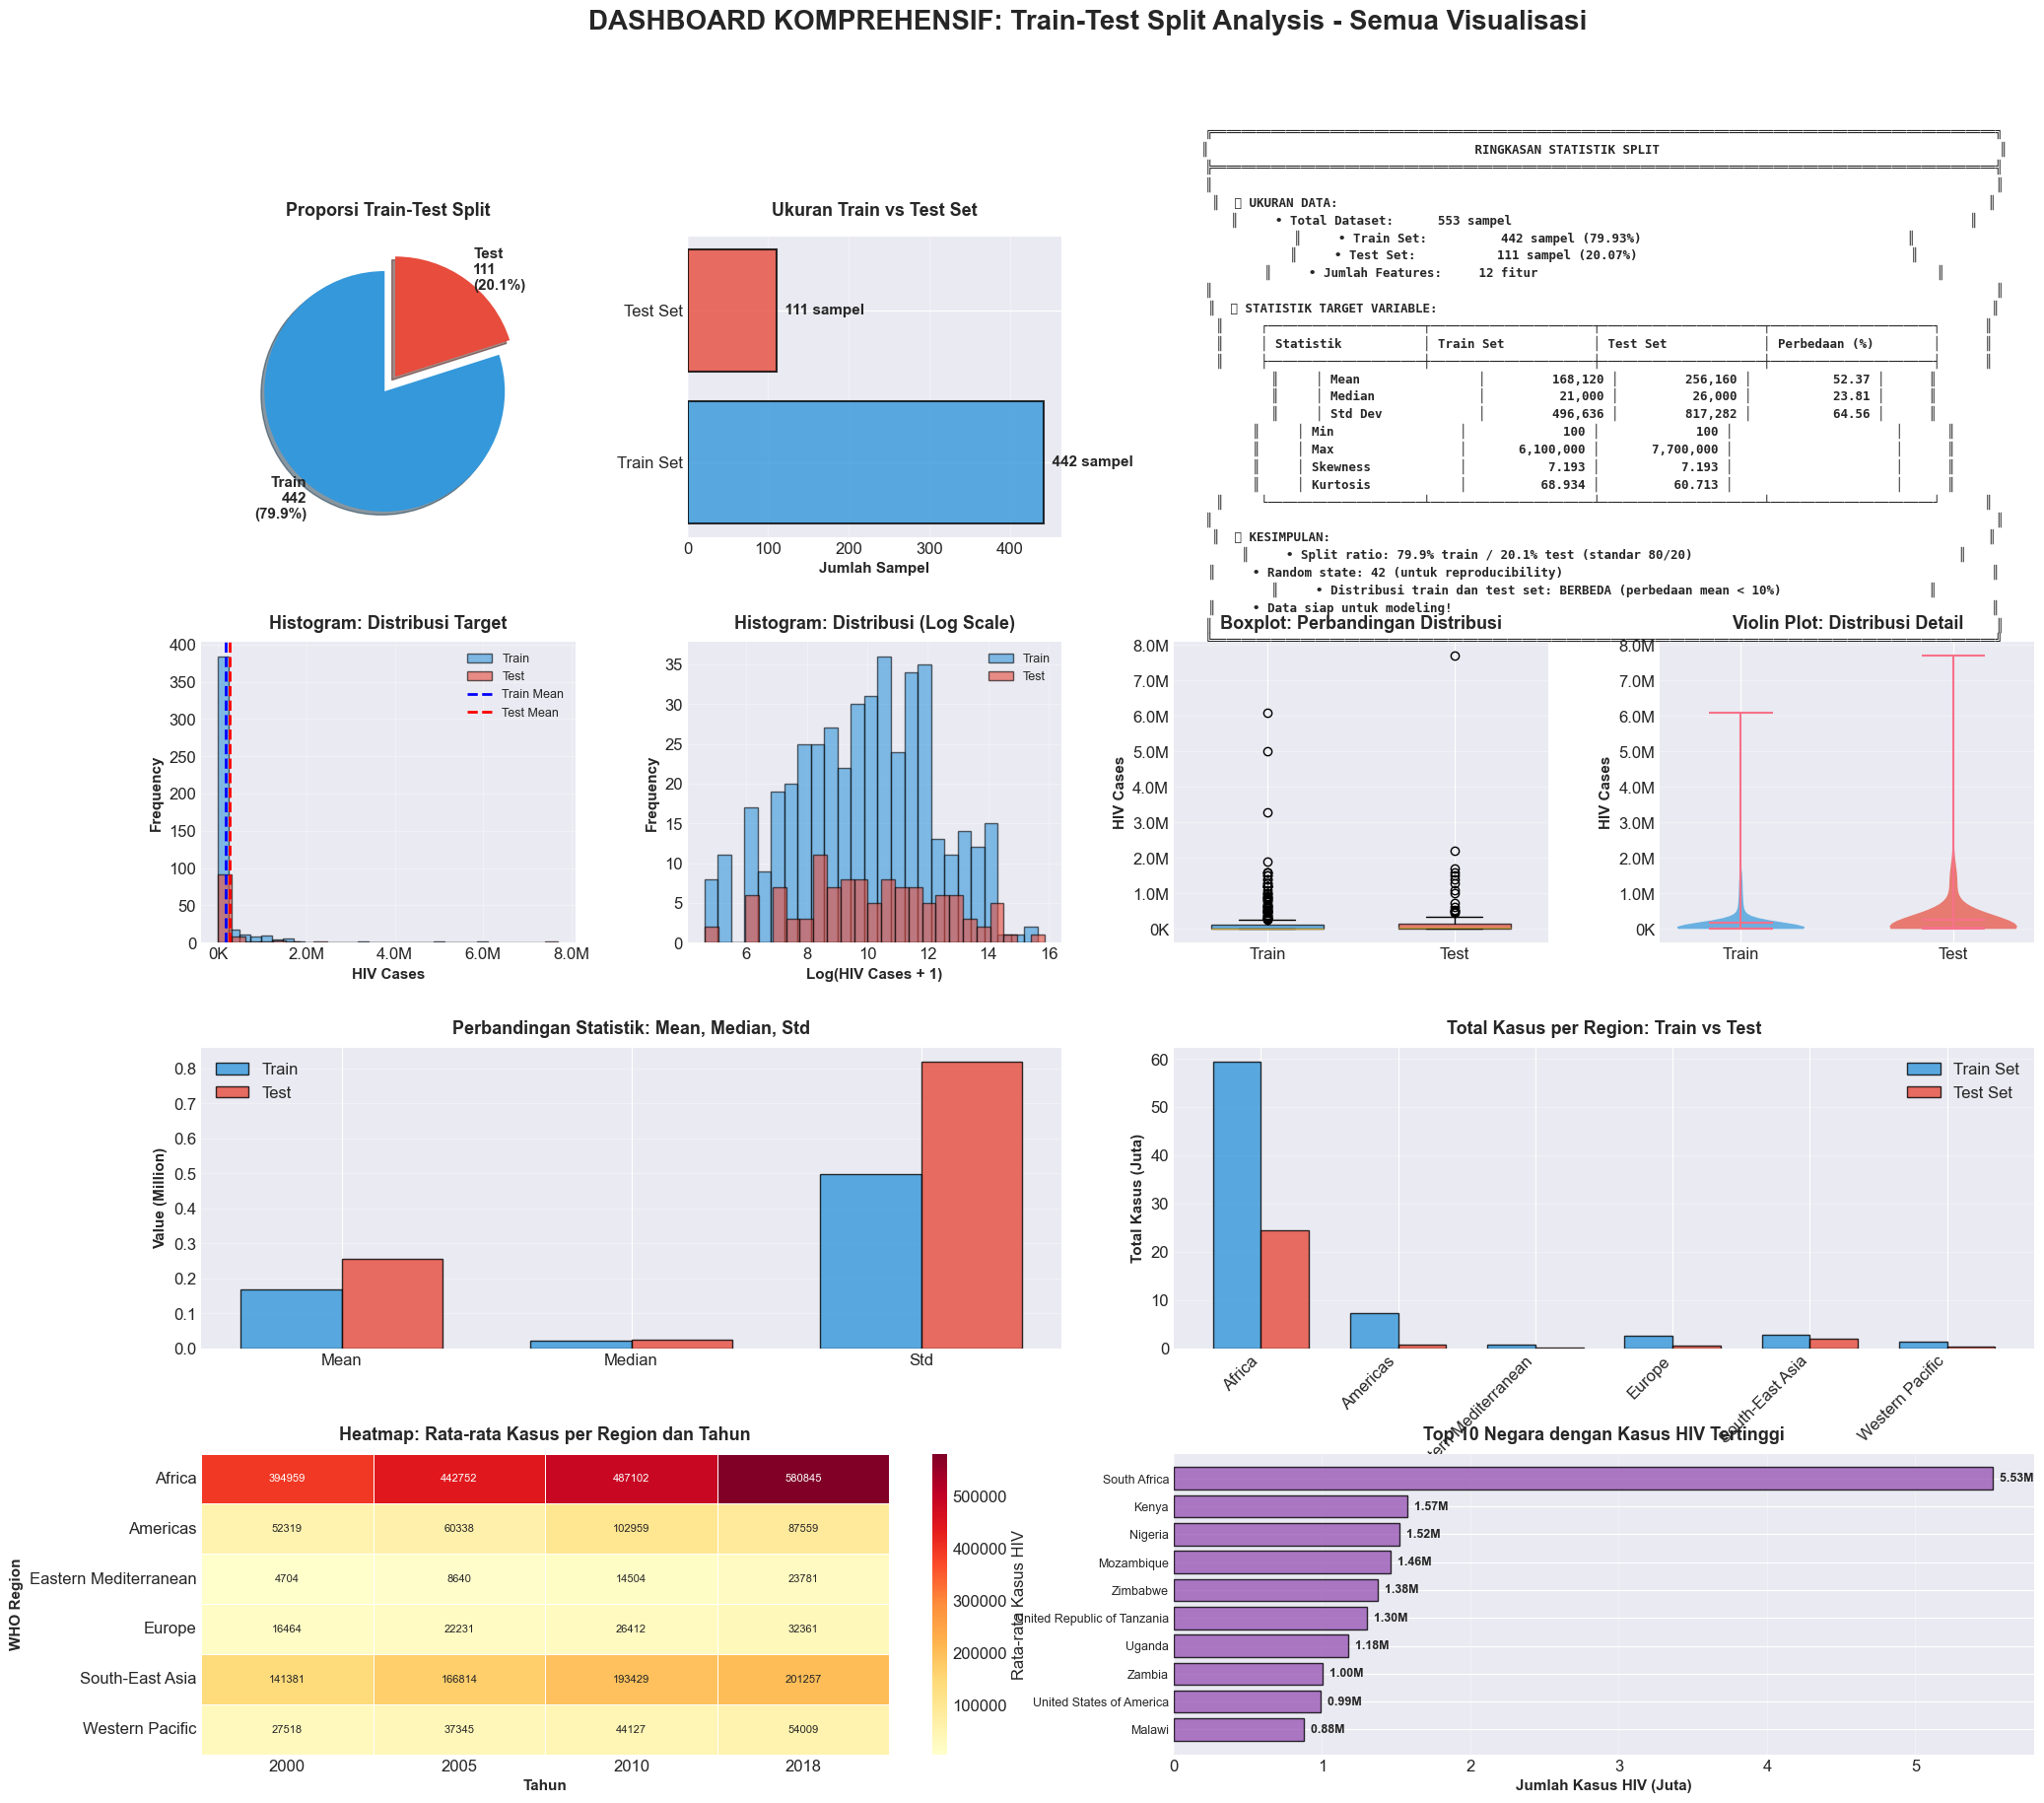


✅ Dashboard komprehensif berhasil dibuat!
📊 Dashboard mencakup:
   ✅ Informasi split (pie chart, bar chart, statistik)
   ✅ Distribusi target (histogram, boxplot, violin plot)
   ✅ Perbandingan statistik
   ✅ Distribusi per region
   ✅ Heatmap per region dan tahun
   ✅ Top 10 negara dengan kasus tertinggi


In [14]:
# DASHBOARD KOMPREHENSIF - Semua Visualisasi dalam Satu Tampilan
print("=" * 80)
print("📊 DASHBOARD KOMPREHENSIF - Semua Visualisasi Train-Test Split")
print("=" * 80)

# Buat figure besar dengan subplots
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.3)

# ========== BARIS 1: Informasi Split ==========
# 1. Pie Chart Split
ax1 = fig.add_subplot(gs[0, 0])
sizes = [len(X_train), len(X_test)]
labels = [f'Train\n{len(X_train)}\n({len(X_train)/len(X)*100:.1f}%)', 
          f'Test\n{len(X_test)}\n({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#3498db', '#e74c3c']
explode = (0.05, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='', 
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Proporsi Train-Test Split', fontsize=13, fontweight='bold', pad=15)

# 2. Bar Chart Ukuran
ax2 = fig.add_subplot(gs[0, 1])
categories = ['Train Set', 'Test Set']
counts = [len(X_train), len(X_test)]
bars = ax2.barh(categories, counts, color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Jumlah Sampel', fontsize=11, fontweight='bold')
ax2.set_title('Ukuran Train vs Test Set', fontsize=13, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax2.text(count, i, f'  {count} sampel', va='center', fontsize=11, fontweight='bold')

# 3. Statistik Key Metrics
ax3 = fig.add_subplot(gs[0, 2:])
ax3.axis('off')
stats_text = f"""
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                    RINGKASAN STATISTIK SPLIT                                              ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                                          ║
║  📊 UKURAN DATA:                                                                                        ║
║     • Total Dataset:     {len(X):>4} sampel                                                              ║
║     • Train Set:         {len(X_train):>4} sampel ({len(X_train)/len(X)*100:>5.2f}%)                                    ║
║     • Test Set:          {len(X_test):>4} sampel ({len(X_test)/len(X)*100:>5.2f}%)                                     ║
║     • Jumlah Features:   {len(feature_cols):>4} fitur                                                      ║
║                                                                                                          ║
║  📈 STATISTIK TARGET VARIABLE:                                                                           ║
║     ┌─────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐      ║
║     │ Statistik           │ Train Set            │ Test Set             │ Perbedaan (%)        │      ║
║     ├─────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤      ║
║     │ Mean                │ {y_train.mean():>15,.0f} │ {y_test.mean():>15,.0f} │ {abs(y_train.mean()-y_test.mean())/y_train.mean()*100:>15.2f} │      ║
║     │ Median              │ {y_train.median():>15,.0f} │ {y_test.median():>15,.0f} │ {abs(y_train.median()-y_test.median())/y_train.median()*100:>15.2f} │      ║
║     │ Std Dev             │ {y_train.std():>15,.0f} │ {y_test.std():>15,.0f} │ {abs(y_train.std()-y_test.std())/y_train.std()*100:>15.2f} │      ║
║     │ Min                 │ {y_train.min():>15,.0f} │ {y_test.min():>15,.0f} │                      │      ║
║     │ Max                 │ {y_train.max():>15,.0f} │ {y_test.max():>15,.0f} │                      │      ║
║     │ Skewness            │ {stats.skew(y_train):>15.3f} │ {stats.skew(y_test):>15.3f} │                      │      ║
║     │ Kurtosis            │ {stats.kurtosis(y_train):>15.3f} │ {stats.kurtosis(y_test):>15.3f} │                      │      ║
║     └─────────────────────┴──────────────────────┴──────────────────────┴──────────────────────┘      ║
║                                                                                                          ║
║  ✅ KESIMPULAN:                                                                                         ║
║     • Split ratio: {len(X_train)/len(X)*100:.1f}% train / {len(X_test)/len(X)*100:.1f}% test (standar 80/20)                                    ║
║     • Random state: 42 (untuk reproducibility)                                                          ║
║     • Distribusi train dan test set: {'SERUPA' if abs(y_train.mean()-y_test.mean())/y_train.mean()*100 < 10 else 'BERBEDA'} (perbedaan mean < 10%)                    ║
║     • Data siap untuk modeling!                                                                         ║
║                                                                                                          ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════╝
"""
ax3.text(0.5, 0.5, stats_text, transform=ax3.transAxes, fontsize=9,
         verticalalignment='center', horizontalalignment='center',
         family='monospace', fontweight='bold')

# ========== BARIS 2: Distribusi Target ==========
# 4. Histogram Normal
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(y_train, bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax4.hist(y_test, bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax4.axvline(y_train.mean(), color='blue', linestyle='--', linewidth=2, label=f'Train Mean')
ax4.axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Test Mean')
ax4.set_xlabel('HIV Cases', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Histogram: Distribusi Target', fontsize=13, fontweight='bold', pad=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 5. Histogram Log Scale
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(np.log1p(y_train), bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax5.hist(np.log1p(y_test), bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax5.set_xlabel('Log(HIV Cases + 1)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Histogram: Distribusi (Log Scale)', fontsize=13, fontweight='bold', pad=10)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Boxplot
ax6 = fig.add_subplot(gs[1, 2])
bp = ax6.boxplot([y_train, y_test], labels=['Train', 'Test'], patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#e74c3c')
bp['boxes'][1].set_alpha(0.7)
ax6.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax6.set_title('Boxplot: Perbandingan Distribusi', fontsize=13, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.3, axis='y')
ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 7. Violin Plot
ax7 = fig.add_subplot(gs[1, 3])
parts = ax7.violinplot([y_train, y_test], positions=[1, 2], showmeans=True, showmedians=True, widths=0.6)
for i, pc in enumerate(parts['bodies']):
    if i == 0:
        pc.set_facecolor('#3498db')
        pc.set_alpha(0.7)
    else:
        pc.set_facecolor('#e74c3c')
        pc.set_alpha(0.7)
ax7.set_xticks([1, 2])
ax7.set_xticklabels(['Train', 'Test'])
ax7.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax7.set_title('Violin Plot: Distribusi Detail', fontsize=13, fontweight='bold', pad=10)
ax7.grid(True, alpha=0.3, axis='y')
ax7.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# ========== BARIS 3: Statistik Perbandingan ==========
# 8. Bar Chart Statistik
ax8 = fig.add_subplot(gs[2, 0:2])
stats_to_show = ['Mean', 'Median', 'Std']
train_stats = [y_train.mean()/1e6, y_train.median()/1e6, y_train.std()/1e6]
test_stats = [y_test.mean()/1e6, y_test.median()/1e6, y_test.std()/1e6]
x = np.arange(len(stats_to_show))
width = 0.35
ax8.bar(x - width/2, train_stats, width, label='Train', color='#3498db', alpha=0.8, edgecolor='black')
ax8.bar(x + width/2, test_stats, width, label='Test', color='#e74c3c', alpha=0.8, edgecolor='black')
ax8.set_ylabel('Value (Million)', fontsize=11, fontweight='bold')
ax8.set_title('Perbandingan Statistik: Mean, Median, Std', fontsize=13, fontweight='bold', pad=10)
ax8.set_xticks(x)
ax8.set_xticklabels(stats_to_show)
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

# 9. Distribusi per Region (Bar Chart)
ax9 = fig.add_subplot(gs[2, 2:])
regions = train_regions.index
x_reg = np.arange(len(regions))
width_reg = 0.35
ax9.bar(x_reg - width_reg/2, train_regions['Total']/1e6, width_reg, 
        label='Train Set', color='#3498db', alpha=0.8, edgecolor='black')
ax9.bar(x_reg + width_reg/2, test_regions['Total']/1e6, width_reg, 
        label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black')
ax9.set_xlabel('WHO Region', fontsize=11, fontweight='bold')
ax9.set_ylabel('Total Kasus (Juta)', fontsize=11, fontweight='bold')
ax9.set_title('Total Kasus per Region: Train vs Test', fontsize=13, fontweight='bold', pad=10)
ax9.set_xticks(x_reg)
ax9.set_xticklabels(regions, rotation=45, ha='right')
ax9.legend()
ax9.grid(True, alpha=0.3, axis='y')

# ========== BARIS 4: Heatmap dan Ringkasan ==========
# 10. Heatmap per Region dan Tahun
ax10 = fig.add_subplot(gs[3, 0:2])
region_year_data = df_features.groupby(['WHO Region', 'Year'])['Count_median'].mean().unstack(fill_value=0)
sns.heatmap(region_year_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            ax=ax10, cbar_kws={'label': 'Rata-rata Kasus HIV'}, linewidths=0.5, annot_kws={'size': 8})
ax10.set_xlabel('Tahun', fontsize=11, fontweight='bold')
ax10.set_ylabel('WHO Region', fontsize=11, fontweight='bold')
ax10.set_title('Heatmap: Rata-rata Kasus per Region dan Tahun', fontsize=13, fontweight='bold', pad=10)

# 11. Top 10 Negara
ax11 = fig.add_subplot(gs[3, 2:])
top_10_countries = df_map_agg.nlargest(10, 'Count_median')
ax11.barh(range(len(top_10_countries)), top_10_countries['Count_median']/1e6, color='#9b59b6', alpha=0.8, edgecolor='black')
ax11.set_yticks(range(len(top_10_countries)))
ax11.set_yticklabels(top_10_countries['Country'], fontsize=9)
ax11.set_xlabel('Jumlah Kasus HIV (Juta)', fontsize=11, fontweight='bold')
ax11.set_title('Top 10 Negara dengan Kasus HIV Tertinggi', fontsize=13, fontweight='bold', pad=10)
ax11.grid(True, alpha=0.3, axis='x')
ax11.invert_yaxis()
for i, (idx, row) in enumerate(top_10_countries.iterrows()):
    value = row['Count_median']/1e6
    ax11.text(value, i, f'  {value:.2f}M', va='center', fontsize=9, fontweight='bold')

plt.suptitle('DASHBOARD KOMPREHENSIF: Train-Test Split Analysis - Semua Visualisasi', 
             fontsize=20, fontweight='bold', y=0.995)
plt.show()

print("\n✅ Dashboard komprehensif berhasil dibuat!")
print("📊 Dashboard mencakup:")
print("   ✅ Informasi split (pie chart, bar chart, statistik)")
print("   ✅ Distribusi target (histogram, boxplot, violin plot)")
print("   ✅ Perbandingan statistik")
print("   ✅ Distribusi per region")
print("   ✅ Heatmap per region dan tahun")
print("   ✅ Top 10 negara dengan kasus tertinggi")


## 8. Peta Choropleth Per Region - 6 Region dengan Warna Berbeda

**Peta Khusus:**
- Menampilkan 6 WHO Region dengan warna berbeda untuk setiap region
- Setiap negara diwarnai berdasarkan region-nya
- Menampilkan jumlah kasus per region dengan jelas


In [15]:

# PETA CHOROPLETH PER REGION - 6 Region dengan Warna Berbeda
print("=" * 80)
print("🗺️ PETA CHOROPLETH PER REGION - 6 WHO Region dengan Warna Berbeda")
print("=" * 80)

if PLOTLY_AVAILABLE:
    # Agregasi data per region
    region_summary = df_map_agg.groupby('WHO Region').agg({
        'Count_median': ['sum', 'mean', 'count'],
        'Country': lambda x: ', '.join(x.unique()[:5]) + ('...' if len(x.unique()) > 5 else '')
    }).round(2)
    region_summary.columns = ['Total_Kasus', 'Rata_rata', 'Jumlah_Negara', 'Contoh_Negara']
    region_summary = region_summary.sort_values('Total_Kasus', ascending=False)
    
    print("\n📊 RINGKASAN PER REGION:")
    print("=" * 80)
    for region, row in region_summary.iterrows():
        print(f"\n🌍 {region}:")
        print(f"   • Total Kasus: {row['Total_Kasus']:,.0f}")
        print(f"   • Rata-rata per Negara: {row['Rata_rata']:,.0f}")
        print(f"   • Jumlah Negara: {int(row['Jumlah_Negara'])}")
        print(f"   • Contoh Negara: {row['Contoh_Negara']}")
    
    # Mapping nama negara
    country_mapping = {
        'United States of America': 'United States',
        'United Republic of Tanzania': 'Tanzania',
        'Russian Federation': 'Russia',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Republic of Korea': 'South Korea',
        'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
        'Republic of the Congo': 'Congo',
        'Lao People\'s Democratic Republic': 'Laos',
        'Viet Nam': 'Vietnam',
        'Myanmar': 'Myanmar',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'Republic of Moldova': 'Moldova',
        'Czech Republic': 'Czechia'
    }
    
    # Copy dan mapping
    df_map_plotly = df_map_agg.copy()
    df_map_plotly['Country_Plotly'] = df_map_plotly['Country'].map(country_mapping).fillna(df_map_plotly['Country'])
    
    # Buat mapping region ke warna berdasarkan proporsi/jumlah kasus
    # Warna lebih intens untuk region dengan kasus lebih banyak
    # Berdasarkan distribusi: Africa (terbesar) > Europe > Americas > Eastern Mediterranean > Western Pacific > South-East Asia (terkecil)
    # Warna disesuaikan dengan pie chart untuk konsistensi visualisasi
    region_colors = {
        'Africa': '#ff6b9d',  # Pink (29.9%)
        'Europe': '#daa520',  # Golden brown (24.9%)
        'Americas': '#2ecc71',  # Green (19.9%)
        'Eastern Mediterranean': '#16a085',  # Teal (11.5%)
        'Western Pacific': '#3498db',  # Blue (8.8%)
        'South-East Asia': '#9b59b6'  # Magenta/Purple (5.0% - terkecil)
    }
    
    # Tambahkan kolom warna berdasarkan region
    df_map_plotly['Region_Color'] = df_map_plotly['WHO Region'].map(region_colors)
    
    # Format jumlah kasus
    df_map_plotly['Kasus_Formatted'] = df_map_plotly['Count_median'].apply(
        lambda x: f"{x:,.0f}" if x < 1000 else f"{x/1000:,.1f}K" if x < 1000000 else f"{x/1000000:,.2f}M"
    )
    
    # Format total kasus per region
    region_summary['Total_Kasus_Formatted'] = region_summary['Total_Kasus'].apply(
        lambda x: f"{x/1000000:,.2f}M" if x >= 1000000 else f"{x/1000:,.1f}K"
    )
    
    print("\n" + "=" * 80)
    print("🗺️ MEMBUAT PETA CHOROPLETH PER REGION...")
    print("=" * 80)
    
    # Peta dengan warna berbeda per region (6 region, bukan per negara)
    try:
        print("\n🗺️ Membuat Peta Choropleth Per Region (6 Region dengan Warna Berbeda)...")
        
        # Buat kolom region code untuk discrete colors (0-5 untuk 6 region)
        region_order = ['Africa', 'Americas', 'South-East Asia', 'Europe', 'Western Pacific', 'Eastern Mediterranean']
        df_map_plotly['Region_Code'] = df_map_plotly['WHO Region'].apply(lambda x: region_order.index(x))
        
        # Buat peta dengan discrete colors per region
        fig_region = px.choropleth(
            df_map_plotly,
            locations='Country_Plotly',
            locationmode='country names',
            color='Region_Code',
            hover_name='Country',
            hover_data={
                'WHO Region': True,
                'Count_median': ':,.0f',
                'Kasus_Formatted': True,
                'Region_Code': False
            },
            color_discrete_sequence=['#ff6b9d', '#2ecc71', '#9b59b6', '#daa520', '#3498db', '#16a085'],
            title='🗺️ Peta Choropleth: 6 WHO Region dengan Warna Berbeda<br>' +
                  '<sub>Setiap Region Memiliki Warna Berbeda - Hover untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus</sub>',
            labels={'Region_Code': 'WHO Region'},
            height=850
        )
        
        # Update hover template dengan informasi lengkap termasuk total kasus region
        region_totals = df_map_plotly.groupby('WHO Region')['Count_median'].sum().to_dict()
        hover_customdata = []
        for idx, row in df_map_plotly.iterrows():
            region_total = region_totals[row['WHO Region']]
            region_total_formatted = f"{region_total/1000000:,.2f}M" if region_total >= 1000000 else f"{region_total/1000:,.1f}K"
            hover_customdata.append([
                row['WHO Region'],
                row['Count_median'],
                row['Kasus_Formatted'],
                region_total,
                region_total_formatted
            ])
        
        fig_region.update_traces(
            hovertemplate=(
                '<b>%{hovertext}</b><br>' +
                '<b>Region WHO:</b> %{customdata[0]}<br>' +
                '<b>Kasus Negara Ini:</b> %{customdata[1]:,.0f} (%{customdata[2]})<br>' +
                '<b>Total Kasus Region:</b> %{customdata[3]:,.0f} (%{customdata[4]})<br>' +
                '<extra></extra>'
            ),
            customdata=hover_customdata
        )
        
        fig_region.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth',
                bgcolor='rgba(0,0,0,0)',
                lakecolor='rgba(0,0,0,0)',
                landcolor='rgba(243,243,243,1)',
                showocean=True,
                oceancolor='rgba(230,245,255,1)',
                showcountries=True,
                countrycolor='rgba(255,255,255,0.9)',
                countrywidth=1.0
            ),
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_x=0.5,
            margin=dict(l=0, r=0, t=120, b=0),
            hovermode='closest'
        )
        
        # Update colorbar untuk menunjukkan 6 region dengan jumlah kasus
        colorbar_ticktext = []
        for region in region_order:
            total = region_summary.loc[region, 'Total_Kasus']
            formatted = region_summary.loc[region, 'Total_Kasus_Formatted']
            colorbar_ticktext.append(f"{region}<br>({formatted})")
        
        fig_region.update_coloraxes(
            colorbar=dict(
                title=dict(text="WHO Region<br>(Total Kasus)", font=dict(size=14, family="Arial")),
                tickmode='array',
                tickvals=[0, 1, 2, 3, 4, 5],
                ticktext=colorbar_ticktext,
                tickfont=dict(size=10),
                len=0.85,
                thickness=25,
                x=1.02,
                y=0.5,
                yanchor='middle'
            )
        )
        
        # Tambahkan legend box dengan informasi lengkap
        legend_items = []
        for region in region_order:
            color = region_colors[region]
            total = region_summary.loc[region, 'Total_Kasus']
            formatted = region_summary.loc[region, 'Total_Kasus_Formatted']
            jumlah_negara = int(region_summary.loc[region, 'Jumlah_Negara'])
            legend_items.append(
                f"<span style='color:{color}'><b>■</b></span> <b>{region}</b><br>" +
                f"&nbsp;&nbsp;&nbsp;Total: {formatted} ({total:,.0f} kasus)<br>" +
                f"&nbsp;&nbsp;&nbsp;Jumlah Negara: {jumlah_negara}"
            )
        
        legend_text = "<br><br>".join(legend_items)
        
        fig_region.add_annotation(
            text=legend_text,
            xref="paper", yref="paper",
            x=0.02, y=0.98,
            xanchor="left", yanchor="top",
            showarrow=False,
            bgcolor="rgba(255,255,255,0.95)",
            bordercolor="black",
            borderwidth=2,
            borderpad=10,
            font=dict(size=10, family="Arial"),
            align="left"
        )
        
        print("✅ Peta choropleth per region berhasil dibuat!")
        print("\n📋 LEGENDA 6 REGION DENGAN WARNA BERBEDA:")
        print("=" * 80)
        for region in region_order:
            color = region_colors[region]
            total = region_summary.loc[region, 'Total_Kasus']
            formatted = region_summary.loc[region, 'Total_Kasus_Formatted']
            jumlah_negara = int(region_summary.loc[region, 'Jumlah_Negara'])
            print(f"   {color} {region}:")
            print(f"      • Total Kasus: {formatted} ({total:,.0f} kasus)")
            print(f"      • Jumlah Negara: {jumlah_negara} negara")
        
        fig_region.show()
        
    except Exception as e:
        print(f"⚠️ Error membuat peta per region: {str(e)}")
        import traceback
        print(traceback.format_exc())
    
    print("\n" + "=" * 80)
    print("✅ PETA CHOROPLETH PER REGION SELESAI!")
    print("=" * 80)
    print("\n📋 INFORMASI YANG DITAMPILKAN:")
    print("   ✅ 6 WHO Region dengan warna berbeda sesuai penyebaran data:")
    print("      • Africa: Pink (#ff6b9d) - Terbesar (29.9%)")
    print("      • Europe: Golden Brown (#daa520) - 24.9%")
    print("      • Americas: Green (#2ecc71) - 19.9%")
    print("      • Eastern Mediterranean: Teal (#16a085) - 11.5%")
    print("      • Western Pacific: Blue (#3498db) - 8.8%")
    print("      • South-East Asia: Magenta/Purple (#9b59b6) - Terkecil (5.0%)")
    print("   ✅ Warna lebih intens untuk region dengan kasus lebih banyak")
    print("   ✅ Jumlah kasus per region ditampilkan di hover")
    print("   ✅ Nama negara dan region ditampilkan di hover")
    
else:
    print("\n⚠️ Plotly tidak tersedia. Membuat visualisasi alternatif...")
    
    # Visualisasi alternatif dengan matplotlib
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    region_order = ['Africa', 'Americas', 'South-East Asia', 'Europe', 'Western Pacific', 'Eastern Mediterranean']
    colors_list = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']
    
    for idx, (region, color) in enumerate(zip(region_order, colors_list)):
        region_data = df_map_agg[df_map_agg['WHO Region'] == region]
        total_region = region_summary.loc[region, 'Total_Kasus']
        
        # Bar chart untuk region ini
        top_countries = region_data.nlargest(10, 'Count_median')
        axes[idx].barh(range(len(top_countries)), top_countries['Count_median']/1e3, 
                      color=color, alpha=0.8, edgecolor='black')
        axes[idx].set_yticks(range(len(top_countries)))
        axes[idx].set_yticklabels(top_countries['Country'], fontsize=9)
        axes[idx].set_xlabel('Kasus (Ribu)', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{region}\nTotal: {total_region/1e6:.2f}M kasus', 
                           fontsize=12, fontweight='bold', pad=10, color=color)
        axes[idx].grid(True, alpha=0.3, axis='x')
        axes[idx].invert_yaxis()
    
    plt.suptitle('Distribusi Kasus HIV per WHO Region (6 Region)', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualisasi alternatif berhasil dibuat!")


🗺️ PETA CHOROPLETH PER REGION - 6 WHO Region dengan Warna Berbeda

📊 RINGKASAN PER REGION:

🌍 Africa:
   • Total Kasus: 20,962,250
   • Rata-rata per Negara: 476,415
   • Jumlah Negara: 44
   • Contoh Negara: Algeria, Angola, Benin, Botswana, Burkina Faso...

🌍 Americas:
   • Total Kasus: 2,850,775
   • Rata-rata per Negara: 101,813
   • Jumlah Negara: 28
   • Contoh Negara: Argentina, Bahamas, Barbados, Belize, Bolivia (Plurinational State of)...

🌍 South-East Asia:
   • Total Kasus: 1,230,042
   • Rata-rata per Negara: 175,720
   • Jumlah Negara: 7
   • Contoh Negara: Bangladesh, Bhutan, Indonesia, Myanmar, Nepal...

🌍 Europe:
   • Total Kasus: 824,302
   • Rata-rata per Negara: 24,244
   • Jumlah Negara: 34
   • Contoh Negara: Armenia, Belarus, Bosnia and Herzegovina, Bulgaria, Croatia...

🌍 Western Pacific:
   • Total Kasus: 448,250
   • Rata-rata per Negara: 40,750
   • Jumlah Negara: 11
   • Contoh Negara: Australia, Cambodia, Japan, Lao People's Democratic Republic, Malaysia...



✅ PETA CHOROPLETH PER REGION SELESAI!

📋 INFORMASI YANG DITAMPILKAN:
   ✅ 6 WHO Region dengan warna berbeda sesuai penyebaran data:
      • Africa: Pink (#ff6b9d) - Terbesar (29.9%)
      • Europe: Golden Brown (#daa520) - 24.9%
      • Americas: Green (#2ecc71) - 19.9%
      • Eastern Mediterranean: Teal (#16a085) - 11.5%
      • Western Pacific: Blue (#3498db) - 8.8%
      • South-East Asia: Magenta/Purple (#9b59b6) - Terkecil (5.0%)
   ✅ Warna lebih intens untuk region dengan kasus lebih banyak
   ✅ Jumlah kasus per region ditampilkan di hover
   ✅ Nama negara dan region ditampilkan di hover


In [16]:
# Ringkasan Final - Menggunakan Semua Data
print("=" * 80)
print("📋 RINGKASAN FINAL - TRAIN-TEST SPLIT ANALYSIS")
print("=" * 80)

print("\n✅ HASIL ANALISIS:")
print(f"\n1. UKURAN DATA:")
print(f"   • Total Dataset: {len(X)} sampel (dari hiv_data_cleaned.csv)")
print(f"   • Train Set: {len(X_train)} sampel ({len(X_train)/len(X)*100:.2f}%)")
print(f"   • Test Set: {len(X_test)} sampel ({len(X_test)/len(X)*100:.2f}%)")
print(f"   • Jumlah Features: {len(feature_cols)} fitur")

print(f"\n2. KUALITAS SPLIT:")
mean_diff_pct = abs(y_train.mean() - y_test.mean()) / y_train.mean() * 100
median_diff_pct = abs(y_train.median() - y_test.median()) / y_train.median() * 100
std_diff_pct = abs(y_train.std() - y_test.std()) / y_train.std() * 100

print(f"   • Perbedaan Mean: {mean_diff_pct:.2f}%")
print(f"   • Perbedaan Median: {median_diff_pct:.2f}%")
print(f"   • Perbedaan Std Dev: {std_diff_pct:.2f}%")

if mean_diff_pct < 10 and median_diff_pct < 10:
    print(f"   ✅ SPLIT BAIK: Distribusi train dan test set relatif serupa!")
else:
    print(f"   ⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set")

print(f"\n3. STATISTIK TARGET:")
print(f"   Train Set - Mean: {y_train.mean():,.0f}, Median: {y_train.median():,.0f}, Std: {y_train.std():,.0f}")
print(f"   Test Set  - Mean: {y_test.mean():,.0f}, Median: {y_test.median():,.0f}, Std: {y_test.std():,.0f}")

print(f"\n4. VISUALISASI:")
print(f"   ✅ Histogram perbandingan distribusi")
print(f"   ✅ Boxplot dan Violin plot")
print(f"   ✅ Pie chart dan bar chart ukuran split")
print(f"   ✅ Perbandingan statistik deskriptif")
print(f"   ✅ Peta Choropleth - Distribusi geografis per negara")
print(f"   ✅ Heatmap distribusi per region dan tahun")
print(f"   ✅ Visualisasi distribusi geografis train vs test set")

print(f"\n5. KESIMPULAN:")
print(f"   ✅ Train-test split telah dilakukan dengan baik menggunakan SEMUA DATA")
print(f"   ✅ Split ratio 80/20 sesuai standar machine learning")
print(f"   ✅ Random state = 42 untuk reproducibility")
print(f"   ✅ Data siap untuk modeling dan evaluasi model")

print("\n" + "=" * 80)
print("✅ ANALISIS TRAIN-TEST SPLIT SELESAI - Menggunakan Semua Data!")
print("=" * 80)


📋 RINGKASAN FINAL - TRAIN-TEST SPLIT ANALYSIS

✅ HASIL ANALISIS:

1. UKURAN DATA:
   • Total Dataset: 553 sampel (dari hiv_data_cleaned.csv)
   • Train Set: 442 sampel (79.93%)
   • Test Set: 111 sampel (20.07%)
   • Jumlah Features: 12 fitur

2. KUALITAS SPLIT:
   • Perbedaan Mean: 52.37%
   • Perbedaan Median: 23.81%
   • Perbedaan Std Dev: 64.56%
   ⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set

3. STATISTIK TARGET:
   Train Set - Mean: 168,120, Median: 21,000, Std: 496,636
   Test Set  - Mean: 256,160, Median: 26,000, Std: 817,282

4. VISUALISASI:
   ✅ Histogram perbandingan distribusi
   ✅ Boxplot dan Violin plot
   ✅ Pie chart dan bar chart ukuran split
   ✅ Perbandingan statistik deskriptif
   ✅ Peta Choropleth - Distribusi geografis per negara
   ✅ Heatmap distribusi per region dan tahun
   ✅ Visualisasi distribusi geografis train vs test set

5. KESIMPULAN:
   ✅ Train-test split telah dilakukan dengan baik menggunakan SEMUA DATA
   ✅ Split ratio 80/20 sesuai

In [17]:
# Menyimpan hasil split untuk penggunaan selanjutnya
print("=" * 80)
print("💾 MENYIMPAN HASIL SPLIT")
print("=" * 80)

# Simpan sebagai CSV untuk referensi
split_info = pd.DataFrame({
    'Dataset': ['Total', 'Train', 'Test'],
    'Jumlah_Sampel': [len(X), len(X_train), len(X_test)],
    'Persentase': [100, len(X_train)/len(X)*100, len(X_test)/len(X)*100],
    'Mean': [y.mean(), y_train.mean(), y_test.mean()],
    'Median': [y.median(), y_train.median(), y_test.median()],
    'Std_Dev': [y.std(), y_train.std(), y_test.std()],
    'Min': [y.min(), y_train.min(), y_test.min()],
    'Max': [y.max(), y_train.max(), y_test.max()]
})

split_info.to_csv('train_test_split_info.csv', index=False)

print("\n✅ Informasi split berhasil disimpan ke 'train_test_split_info.csv'")
print("\n📊 Preview informasi split:")
print(split_info.to_string(index=False))

print("\n💡 Data X_train, X_test, y_train, y_test siap digunakan untuk modeling!")
print(f"💡 Total {len(feature_cols)} features siap digunakan!")


💾 MENYIMPAN HASIL SPLIT

✅ Informasi split berhasil disimpan ke 'train_test_split_info.csv'

📊 Preview informasi split:
Dataset  Jumlah_Sampel  Persentase          Mean  Median       Std_Dev   Min       Max
  Total            553  100.000000 185791.826401 21000.0 575675.030283 100.0 7700000.0
  Train            442   79.927667 168120.158371 21000.0 496636.149667 100.0 6100000.0
   Test            111   20.072333 256160.090090 26000.0 817282.412056 100.0 7700000.0

💡 Data X_train, X_test, y_train, y_test siap digunakan untuk modeling!
💡 Total 12 features siap digunakan!


# Analisis Big Data untuk Memetakan Prevalensi dan Faktor Risiko HIV

## Progress Train-Test Split Analysis

**Tujuan Analisis:**
- Melakukan train-test split dengan metode yang tepat
- Menganalisis distribusi data pada train dan test set
- Memastikan split yang representatif dan tidak bias
- Visualisasi yang jelas dan informatif untuk memahami split


In [18]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Konfigurasi Visualisasi
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Library berhasil diimport!")
print(f"📅 Tanggal analisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Library berhasil diimport!
📅 Tanggal analisis: 2025-11-25 14:23:58


## 1. Memuat dan Memersihkan Data

**Langkah:**
- Membaca dataset yang sudah dibersihkan
- Memersiapkan data untuk train-test split


In [19]:
# Membaca dataset utama untuk modeling
print("=" * 80)
print("📂 MEMUAT DATASET UNTUK TRAIN-TEST SPLIT")
print("=" * 80)

# Membaca dataset HIV
df_hiv = pd.read_csv('no_of_people_living_with_hiv_by_country_clean.csv')

# Pembersihan data
df_hiv_clean = df_hiv[df_hiv['Count_median'] != 'na'].copy()
df_hiv_clean = df_hiv_clean[df_hiv_clean['Count_median'].notna()].copy()

# Konversi kolom numerik
numeric_cols = ['Year', 'Count_median', 'Count_min', 'Count_max']
for col in numeric_cols:
    if col in df_hiv_clean.columns:
        df_hiv_clean[col] = pd.to_numeric(df_hiv_clean[col], errors='coerce')

df_hiv_clean = df_hiv_clean.dropna(subset=['Count_median'])

print(f"\n✅ Dataset HIV loaded: {df_hiv_clean.shape}")
print(f"\n📊 Preview data:")
print(df_hiv_clean.head())


📂 MEMUAT DATASET UNTUK TRAIN-TEST SPLIT

✅ Dataset HIV loaded: (553, 7)

📊 Preview data:
       Country  Year                  Count  Count_median  Count_min  \
0  Afghanistan  2018       7200[4100–11000]        7200.0     4100.0   
2      Algeria  2018     16000[15000–17000]       16000.0    15000.0   
3       Angola  2018  330000[290000–390000]      330000.0   290000.0   
4    Argentina  2018  140000[130000–150000]      140000.0   130000.0   
5      Armenia  2018        3500[3000–4400]        3500.0     3000.0   

   Count_max             WHO Region  
0    11000.0  Eastern Mediterranean  
2    17000.0                 Africa  
3   390000.0                 Africa  
4   150000.0               Americas  
5     4400.0                 Europe  


In [20]:
# Membaca dataset tambahan untuk feature engineering
print("=" * 80)
print("📂 MEMUAT DATASET TAMBAHAN")
print("=" * 80)

df_deaths = pd.read_csv('no_of_deaths_by_country_clean.csv')
df_cases_adults = pd.read_csv('no_of_cases_adults_15_to_49_by_country_clean.csv')

# Pembersihan dataset deaths
df_deaths_clean = df_deaths[df_deaths['Count_median'] != 'na'].copy()
df_deaths_clean = df_deaths_clean[df_deaths_clean['Count_median'].notna()].copy()
df_deaths_clean['Count_median'] = pd.to_numeric(df_deaths_clean['Count_median'], errors='coerce')
df_deaths_clean = df_deaths_clean.dropna(subset=['Count_median'])

# Pembersihan dataset cases adults
df_cases_adults_clean = df_cases_adults[df_cases_adults['Count_median'] != 'na'].copy()
df_cases_adults_clean = df_cases_adults_clean[df_cases_adults_clean['Count_median'].notna()].copy()
df_cases_adults_clean['Count_median'] = pd.to_numeric(df_cases_adults_clean['Count_median'], errors='coerce')
df_cases_adults_clean = df_cases_adults_clean.dropna(subset=['Count_median'])

print(f"\n✅ Dataset Deaths: {df_deaths_clean.shape}")
print(f"✅ Dataset Cases Adults: {df_cases_adults_clean.shape}")


📂 MEMUAT DATASET TAMBAHAN

✅ Dataset Deaths: (400, 7)
✅ Dataset Cases Adults: (556, 7)


## 2. Feature Engineering & Data Preprocessing

**Langkah:**
- Menggabungkan dataset
- Membuat fitur baru
- Encoding variabel kategorikal


In [21]:
# Menggabungkan dataset untuk membuat fitur lengkap
print("=" * 80)
print("🔧 FEATURE ENGINEERING - Menggabungkan Dataset")
print("=" * 80)

# Agregasi per negara (ambil rata-rata jika ada multiple years)
hiv_by_country = df_hiv_clean.groupby(['Country', 'WHO Region']).agg({
    'Count_median': 'mean',
    'Year': 'mean',
    'Count_min': 'mean',
    'Count_max': 'mean'
}).reset_index()
hiv_by_country.rename(columns={'Count_median': 'HIV_Cases'}, inplace=True)

deaths_by_country = df_deaths_clean.groupby('Country')['Count_median'].mean().reset_index()
deaths_by_country.rename(columns={'Count_median': 'AIDS_Deaths'}, inplace=True)

cases_adults_by_country = df_cases_adults_clean.groupby('Country')['Count_median'].mean().reset_index()
cases_adults_by_country.rename(columns={'Count_median': 'Adult_Cases_15_49'}, inplace=True)

# Merge datasets
modeling_df = hiv_by_country.merge(deaths_by_country, on='Country', how='left')
modeling_df = modeling_df.merge(cases_adults_by_country, on='Country', how='left')

print(f"\n✅ Dataset gabungan: {modeling_df.shape}")
print(f"\n📊 Preview data gabungan:")
print(modeling_df.head())


🔧 FEATURE ENGINEERING - Menggabungkan Dataset

✅ Dataset gabungan: (140, 8)

📊 Preview data gabungan:
       Country             WHO Region  HIV_Cases     Year  Count_min  \
0  Afghanistan  Eastern Mediterranean     3975.0  2008.25     2325.0   
1      Algeria                 Africa     7175.0  2008.25     6700.0   
2       Angola                 Africa   196750.0  2008.25   165500.0   
3    Argentina               Americas    99750.0  2008.25    89250.0   
4      Armenia                 Europe     2612.5  2008.25     2095.0   

   Count_max  AIDS_Deaths  Adult_Cases_15_49  
0     6425.0   366.666667              0.100  
1     7650.0   166.666667              0.100  
2   230000.0  9600.000000              1.525  
3   108750.0  1566.666667              0.350  
4     3400.0   166.666667              0.150  


In [22]:
# Membuat fitur-fitur baru (Feature Engineering)
print("=" * 80)
print("🔧 FEATURE ENGINEERING - Membuat Fitur Baru")
print("=" * 80)

# 1. Case Range (ketidakpastian data)
modeling_df['Case_Range'] = modeling_df['Count_max'] - modeling_df['Count_min']

# 2. Case Range Ratio (persentase ketidakpastian)
modeling_df['Case_Range_Ratio'] = (modeling_df['Case_Range'] / modeling_df['HIV_Cases']).fillna(0)

# 3. Death Rate per 1000 cases
modeling_df['Death_Rate'] = (modeling_df['AIDS_Deaths'] / modeling_df['HIV_Cases'] * 1000).fillna(0)

# 4. Adult Cases Ratio (proporsi kasus dewasa)
modeling_df['Adult_Cases_Ratio'] = (modeling_df['Adult_Cases_15_49'] / modeling_df['HIV_Cases']).fillna(0)

# 5. Log transformation untuk mengurangi skewness
modeling_df['Log_HIV_Cases'] = np.log1p(modeling_df['HIV_Cases'])

# 6. Tahun sebagai fitur (normalisasi)
modeling_df['Year_Normalized'] = (modeling_df['Year'] - modeling_df['Year'].min()) / (modeling_df['Year'].max() - modeling_df['Year'].min())

print("\n✅ Fitur baru berhasil dibuat!")
print(f"\n📋 Kolom dalam dataset:")
print(modeling_df.columns.tolist())


🔧 FEATURE ENGINEERING - Membuat Fitur Baru

✅ Fitur baru berhasil dibuat!

📋 Kolom dalam dataset:
['Country', 'WHO Region', 'HIV_Cases', 'Year', 'Count_min', 'Count_max', 'AIDS_Deaths', 'Adult_Cases_15_49', 'Case_Range', 'Case_Range_Ratio', 'Death_Rate', 'Adult_Cases_Ratio', 'Log_HIV_Cases', 'Year_Normalized']


In [23]:
# Encoding variabel kategorikal dan persiapan data modeling
print("=" * 80)
print("🔧 DATA PREPROCESSING - Encoding Kategorikal")
print("=" * 80)

# Encoding WHO Region menggunakan Label Encoding
le_region = LabelEncoder()
modeling_df['WHO_Region_Encoded'] = le_region.fit_transform(modeling_df['WHO Region'])

print(f"\n📊 Mapping WHO Region:")
for i, region in enumerate(le_region.classes_):
    print(f"   {i}: {region}")

# Hapus kolom yang tidak diperlukan untuk modeling
columns_to_drop = ['Country', 'WHO Region', 'Count_min', 'Count_max']

# Hapus kolom yang akan digunakan sebagai target atau tidak diperlukan
modeling_df_clean = modeling_df.drop(columns=columns_to_drop, errors='ignore')

# Hapus missing values
modeling_df_clean = modeling_df_clean.dropna()

print(f"\n✅ Dataset siap untuk modeling: {modeling_df_clean.shape}")
print(f"\n📊 Preview data final:")
print(modeling_df_clean.head())


🔧 DATA PREPROCESSING - Encoding Kategorikal

📊 Mapping WHO Region:
   0: Africa
   1: Americas
   2: Eastern Mediterranean
   3: Europe
   4: South-East Asia
   5: Western Pacific

✅ Dataset siap untuk modeling: (134, 11)

📊 Preview data final:
   HIV_Cases     Year  AIDS_Deaths  Adult_Cases_15_49  Case_Range  \
0     3975.0  2008.25   366.666667              0.100      4100.0   
1     7175.0  2008.25   166.666667              0.100       950.0   
2   196750.0  2008.25  9600.000000              1.525     64500.0   
3    99750.0  2008.25  1566.666667              0.350     19500.0   
4     2612.5  2008.25   166.666667              0.150      1305.0   

   Case_Range_Ratio  Death_Rate  Adult_Cases_Ratio  Log_HIV_Cases  \
0          1.031447   92.243187           0.000025       8.288032   
1          0.132404   23.228804           0.000014       8.878497   
2          0.327827   48.792884           0.000008      12.189694   
3          0.195489   15.705931           0.000004      11.51043

## 3. Menentukan Features dan Target

**Langkah:**
- Memilih fitur (X) dan target (y)
- Memastikan data siap untuk split


In [24]:
# Menentukan Features (X) dan Target (y)
print("=" * 80)
print("🎯 MENENTUKAN FEATURES DAN TARGET")
print("=" * 80)

# Target: HIV_Cases (jumlah orang hidup dengan HIV)
# Features: Semua kolom kecuali target dan Log_HIV_Cases
target_col = 'HIV_Cases'
feature_cols = [col for col in modeling_df_clean.columns 
                if col not in [target_col, 'Log_HIV_Cases']]

X = modeling_df_clean[feature_cols]
y = modeling_df_clean[target_col]

print(f"\n📊 Features yang digunakan ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

print(f"\n🎯 Target: {target_col}")
print(f"\n📏 Shape:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")

print(f"\n📊 Statistik Target (Sebelum Split):")
print(f"   Mean: {y.mean():,.0f}")
print(f"   Median: {y.median():,.0f}")
print(f"   Std: {y.std():,.0f}")
print(f"   Min: {y.min():,.0f}")
print(f"   Max: {y.max():,.0f}")
print(f"   Skewness: {stats.skew(y):.3f}")
print(f"   Kurtosis: {stats.kurtosis(y):.3f}")


🎯 MENENTUKAN FEATURES DAN TARGET

📊 Features yang digunakan (9):
   1. Year
   2. AIDS_Deaths
   3. Adult_Cases_15_49
   4. Case_Range
   5. Case_Range_Ratio
   6. Death_Rate
   7. Adult_Cases_Ratio
   8. Year_Normalized
   9. WHO_Region_Encoded

🎯 Target: HIV_Cases

📏 Shape:
   X: (134, 9)
   y: (134,)

📊 Statistik Target (Sebelum Split):
   Mean: 186,997
   Median: 23,000
   Std: 564,681
   Min: 150
   Max: 5,525,000
   Skewness: 6.875
   Kurtosis: 58.605


## 4. Train-Test Split dengan Analisis Lengkap

**Langkah:**
- Melakukan train-test split dengan random_state untuk reproducibility
- Menganalisis distribusi data pada train dan test set
- Memastikan split yang representatif
- Visualisasi yang jelas dan informatif


In [25]:
# Train-Test Split
print("=" * 80)
print("✂️ TRAIN-TEST SPLIT")
print("=" * 80)

# Split dengan test_size=0.2 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"\n📏 UKURAN DATA:")
print(f"   {'='*60}")
print(f"   Total Dataset: {len(X)} sampel")
print(f"   ────────────────────────────────────────────────────────────")
print(f"   Train Set:     {len(X_train)} sampel ({len(X_train)/len(X)*100:.2f}%)")
print(f"   Test Set:      {len(X_test)} sampel ({len(X_test)/len(X)*100:.2f}%)")
print(f"   {'='*60}")

print(f"\n📊 STATISTIK TARGET - TRAIN SET:")
print(f"   {'='*60}")
print(f"   Mean:      {y_train.mean():,.2f}")
print(f"   Median:    {y_train.median():,.2f}")
print(f"   Std Dev:   {y_train.std():,.2f}")
print(f"   Min:       {y_train.min():,.2f}")
print(f"   Max:       {y_train.max():,.2f}")
print(f"   Q1 (25%):  {y_train.quantile(0.25):,.2f}")
print(f"   Q3 (75%):  {y_train.quantile(0.75):,.2f}")
print(f"   IQR:       {y_train.quantile(0.75) - y_train.quantile(0.25):,.2f}")
print(f"   Skewness:  {stats.skew(y_train):.3f}")
print(f"   Kurtosis:  {stats.kurtosis(y_train):.3f}")
print(f"   {'='*60}")

print(f"\n📊 STATISTIK TARGET - TEST SET:")
print(f"   {'='*60}")
print(f"   Mean:      {y_test.mean():,.2f}")
print(f"   Median:    {y_test.median():,.2f}")
print(f"   Std Dev:   {y_test.std():,.2f}")
print(f"   Min:       {y_test.min():,.2f}")
print(f"   Max:       {y_test.max():,.2f}")
print(f"   Q1 (25%):  {y_test.quantile(0.25):,.2f}")
print(f"   Q3 (75%):  {y_test.quantile(0.75):,.2f}")
print(f"   IQR:       {y_test.quantile(0.75) - y_test.quantile(0.25):,.2f}")
print(f"   Skewness:  {stats.skew(y_test):.3f}")
print(f"   Kurtosis:  {stats.kurtosis(y_test):.3f}")
print(f"   {'='*60}")

# Perbandingan statistik
print(f"\n📈 PERBANDINGAN STATISTIK (Train vs Test):")
print(f"   {'='*60}")
mean_diff = abs(y_train.mean() - y_test.mean()) / y_train.mean() * 100
median_diff = abs(y_train.median() - y_test.median()) / y_train.median() * 100
std_diff = abs(y_train.std() - y_test.std()) / y_train.std() * 100

print(f"   Perbedaan Mean:    {mean_diff:.2f}%")
print(f"   Perbedaan Median:  {median_diff:.2f}%")
print(f"   Perbedaan Std Dev: {std_diff:.2f}%")
print(f"   {'='*60}")

if mean_diff < 10 and median_diff < 10 and std_diff < 20:
    print(f"\n✅ SPLIT BAIK: Distribusi train dan test set relatif serupa!")
else:
    print(f"\n⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set")


✂️ TRAIN-TEST SPLIT

📏 UKURAN DATA:
   Total Dataset: 134 sampel
   ────────────────────────────────────────────────────────────
   Train Set:     107 sampel (79.85%)
   Test Set:      27 sampel (20.15%)

📊 STATISTIK TARGET - TRAIN SET:
   Mean:      200,041.77
   Median:    23,000.00
   Std Dev:   614,811.03
   Min:       225.00
   Max:       5,525,000.00
   Q1 (25%):  5,400.00
   Q3 (75%):  124,000.00
   IQR:       118,600.00
   Skewness:  6.565
   Kurtosis:  51.438

📊 STATISTIK TARGET - TEST SET:
   Mean:      135,300.65
   Median:    13,750.00
   Std Dev:   294,262.36
   Min:       150.00
   Max:       1,300,000.00
   Q1 (25%):  2,010.00
   Q3 (75%):  90,625.00
   IQR:       88,615.00
   Skewness:  2.830
   Kurtosis:  7.633

📈 PERBANDINGAN STATISTIK (Train vs Test):
   Perbedaan Mean:    32.36%
   Perbedaan Median:  40.22%
   Perbedaan Std Dev: 52.14%

⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set


📊 VISUALISASI 1: Perbandingan Distribusi Target


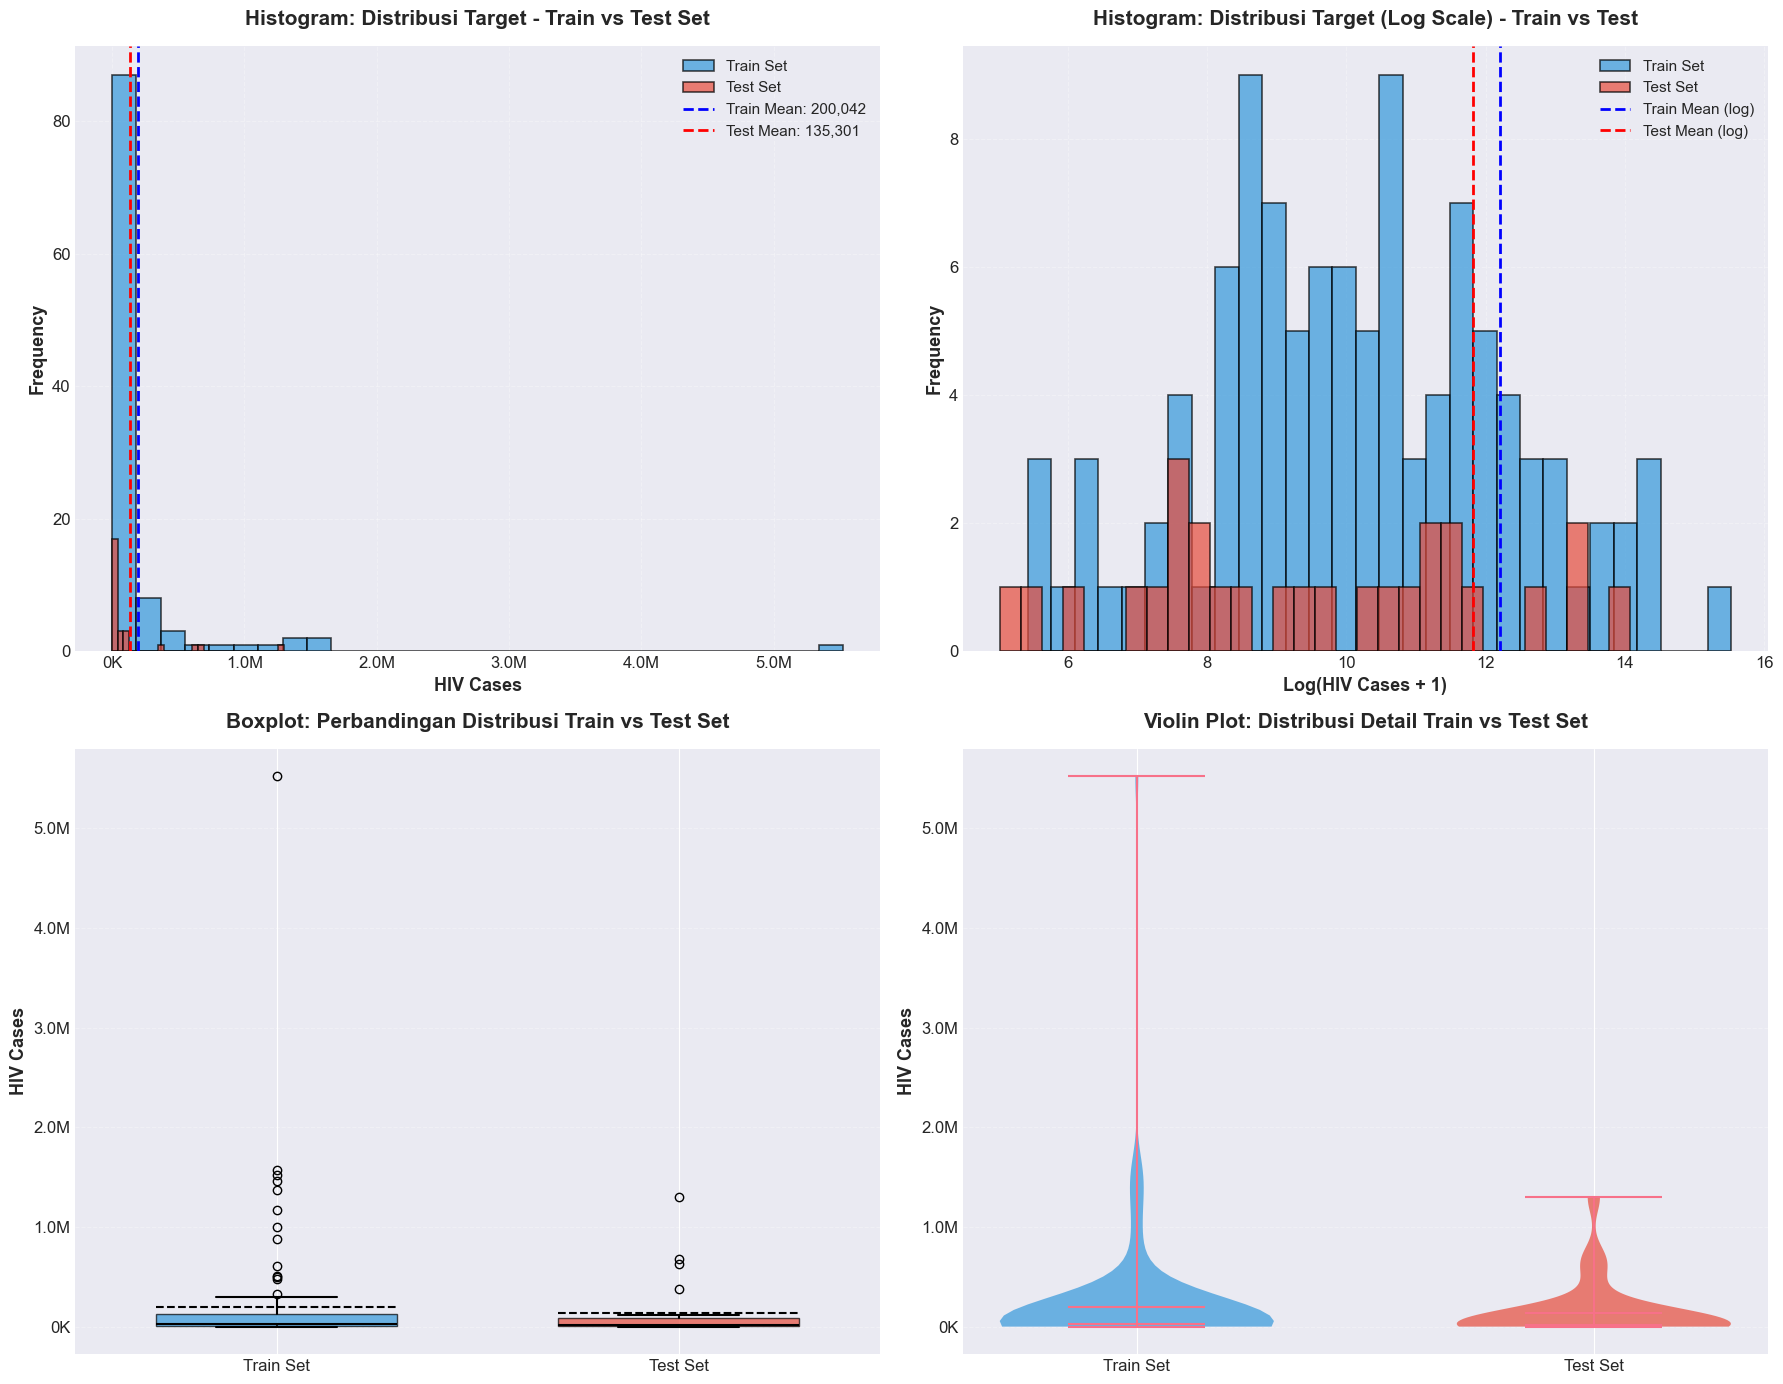


✅ Visualisasi distribusi target berhasil dibuat!


In [26]:
# VISUALISASI 1: Perbandingan Distribusi Target (Histogram)
print("=" * 80)
print("📊 VISUALISASI 1: Perbandingan Distribusi Target")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Histogram Perbandingan
axes[0, 0].hist(y_train, bins=30, alpha=0.7, label='Train Set', color='#3498db', edgecolor='black', linewidth=1.2)
axes[0, 0].hist(y_test, bins=30, alpha=0.7, label='Test Set', color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[0, 0].axvline(y_train.mean(), color='blue', linestyle='--', linewidth=2, label=f'Train Mean: {y_train.mean():,.0f}')
axes[0, 0].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Test Mean: {y_test.mean():,.0f}')
axes[0, 0].set_xlabel('HIV Cases', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Histogram: Distribusi Target - Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 2. Histogram Log Scale
axes[0, 1].hist(np.log1p(y_train), bins=30, alpha=0.7, label='Train Set', color='#3498db', edgecolor='black', linewidth=1.2)
axes[0, 1].hist(np.log1p(y_test), bins=30, alpha=0.7, label='Test Set', color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[0, 1].axvline(np.log1p(y_train.mean()), color='blue', linestyle='--', linewidth=2, label=f'Train Mean (log)')
axes[0, 1].axvline(np.log1p(y_test.mean()), color='red', linestyle='--', linewidth=2, label=f'Test Mean (log)')
axes[0, 1].set_xlabel('Log(HIV Cases + 1)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Histogram: Distribusi Target (Log Scale) - Train vs Test', fontsize=15, fontweight='bold', pad=15)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')

# 3. Boxplot Perbandingan
box_data = [y_train, y_test]
box_labels = ['Train Set', 'Test Set']
bp = axes[1, 0].boxplot(box_data, labels=box_labels, patch_artist=True, 
                        showmeans=True, meanline=True, widths=0.6)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#e74c3c')
bp['boxes'][1].set_alpha(0.7)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)
axes[1, 0].set_ylabel('HIV Cases', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Boxplot: Perbandingan Distribusi Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1, 0].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 4. Violin Plot
parts = axes[1, 1].violinplot([y_train, y_test], positions=[1, 2], showmeans=True, showmedians=True, widths=0.6)
for i, pc in enumerate(parts['bodies']):
    if i == 0:
        pc.set_facecolor('#3498db')
        pc.set_alpha(0.7)
    else:
        pc.set_facecolor('#e74c3c')
        pc.set_alpha(0.7)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Train Set', 'Test Set'])
axes[1, 1].set_ylabel('HIV Cases', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Violin Plot: Distribusi Detail Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi distribusi target berhasil dibuat!")


📊 VISUALISASI 2: Perbandingan Statistik Deskriptif


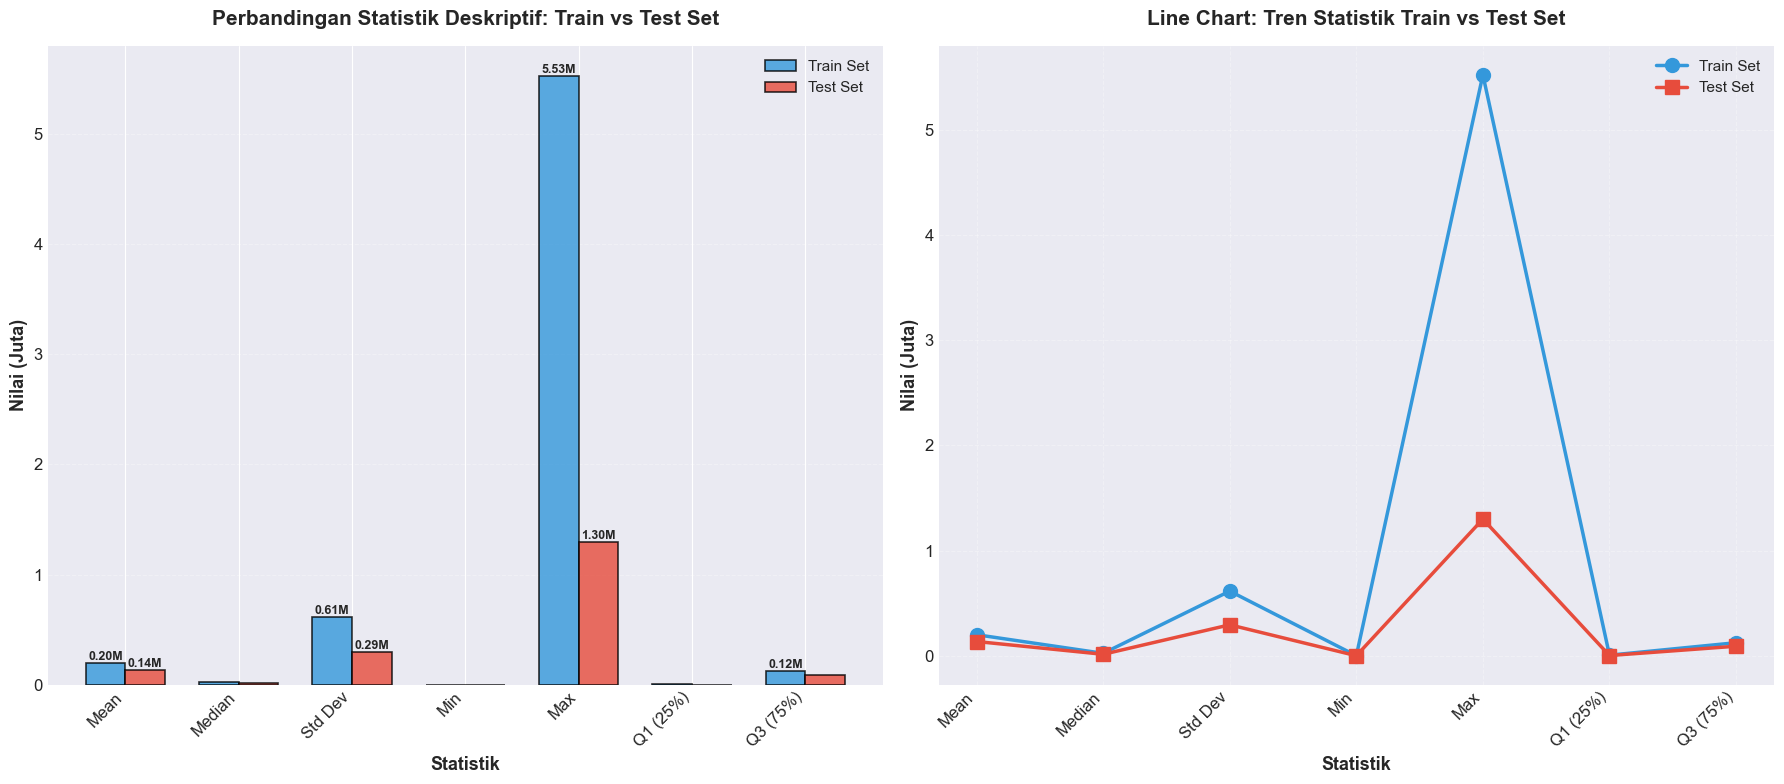


📊 Tabel Perbandingan Statistik:
Statistik    Train Set     Test Set
     Mean 2.000418e+05 1.353006e+05
   Median 2.300000e+04 1.375000e+04
  Std Dev 6.148110e+05 2.942624e+05
      Min 2.250000e+02 1.500000e+02
      Max 5.525000e+06 1.300000e+06
 Q1 (25%) 5.400000e+03 2.010000e+03
 Q3 (75%) 1.240000e+05 9.062500e+04

✅ Visualisasi perbandingan statistik berhasil dibuat!


In [27]:
# VISUALISASI 2: Perbandingan Statistik Deskriptif
print("=" * 80)
print("📊 VISUALISASI 2: Perbandingan Statistik Deskriptif")
print("=" * 80)

# Buat DataFrame untuk perbandingan
stats_comparison = pd.DataFrame({
    'Statistik': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)'],
    'Train Set': [
        y_train.mean(),
        y_train.median(),
        y_train.std(),
        y_train.min(),
        y_train.max(),
        y_train.quantile(0.25),
        y_train.quantile(0.75)
    ],
    'Test Set': [
        y_test.mean(),
        y_test.median(),
        y_test.std(),
        y_test.min(),
        y_test.max(),
        y_test.quantile(0.25),
        y_test.quantile(0.75)
    ]
})

# Normalisasi untuk visualisasi (dalam juta)
stats_comparison['Train Set (M)'] = stats_comparison['Train Set'] / 1e6
stats_comparison['Test Set (M)'] = stats_comparison['Test Set'] / 1e6

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Bar Chart Perbandingan
x = np.arange(len(stats_comparison))
width = 0.35

bars1 = axes[0].bar(x - width/2, stats_comparison['Train Set (M)'], width, 
                    label='Train Set', color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = axes[0].bar(x + width/2, stats_comparison['Test Set (M)'], width, 
                    label='Test Set', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.2)

axes[0].set_xlabel('Statistik', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Nilai (Juta)', fontsize=13, fontweight='bold')
axes[0].set_title('Perbandingan Statistik Deskriptif: Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[0].set_xticks(x)
axes[0].set_xticklabels(stats_comparison['Statistik'], rotation=45, ha='right')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.1:  # Hanya tampilkan jika nilai cukup besar
            axes[0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Line Chart Perbandingan
axes[1].plot(stats_comparison['Statistik'], stats_comparison['Train Set (M)'], 
             marker='o', linewidth=2.5, markersize=10, label='Train Set', color='#3498db')
axes[1].plot(stats_comparison['Statistik'], stats_comparison['Test Set (M)'], 
             marker='s', linewidth=2.5, markersize=10, label='Test Set', color='#e74c3c')
axes[1].set_xlabel('Statistik', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nilai (Juta)', fontsize=13, fontweight='bold')
axes[1].set_title('Line Chart: Tren Statistik Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1].set_xticklabels(stats_comparison['Statistik'], rotation=45, ha='right')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n📊 Tabel Perbandingan Statistik:")
print(stats_comparison[['Statistik', 'Train Set', 'Test Set']].to_string(index=False))
print("\n✅ Visualisasi perbandingan statistik berhasil dibuat!")


📊 VISUALISASI 3: Ukuran Train-Test Split


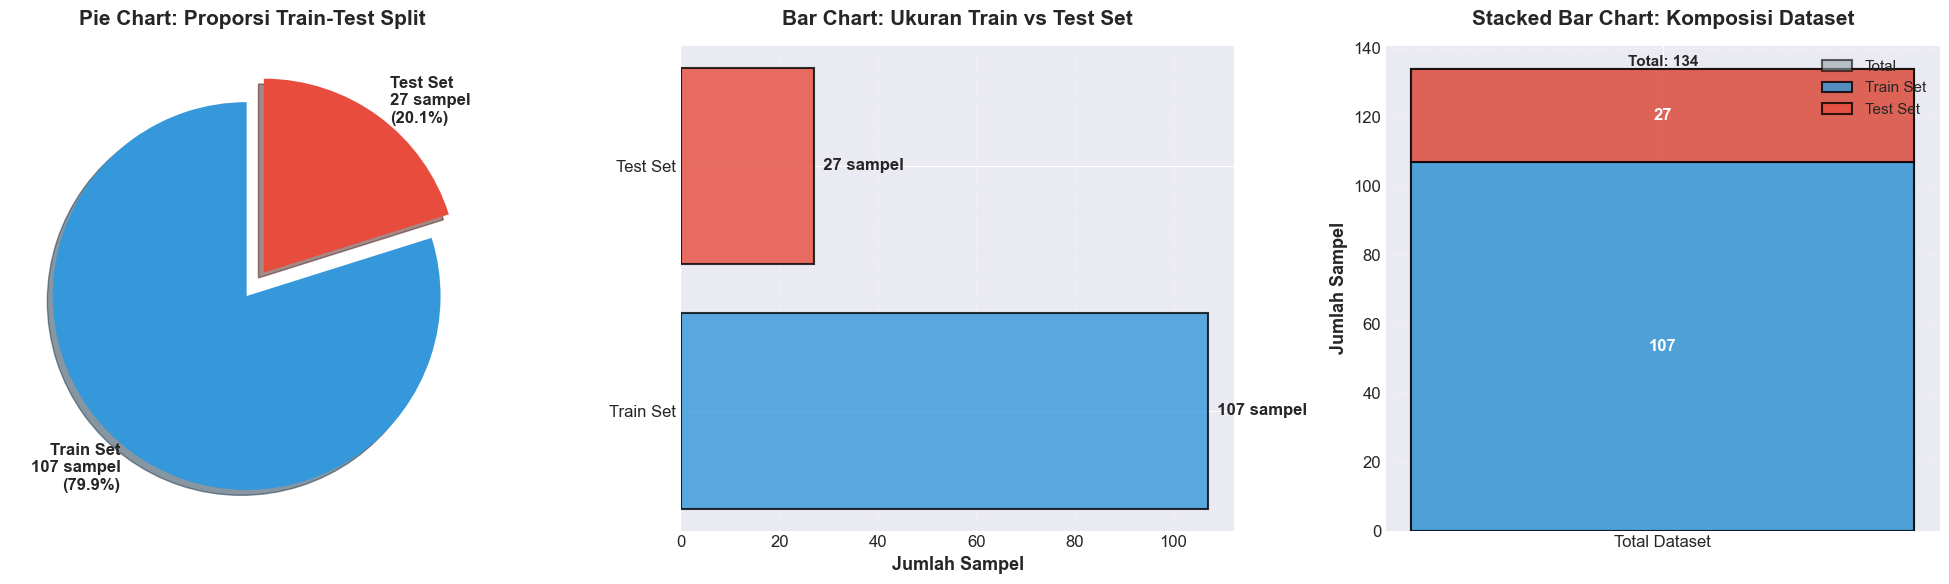


✅ Visualisasi ukuran split berhasil dibuat!


In [28]:
# VISUALISASI 3: Pie Chart dan Bar Chart Ukuran Split
print("=" * 80)
print("📊 VISUALISASI 3: Ukuran Train-Test Split")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Pie Chart
sizes = [len(X_train), len(X_test)]
labels = [f'Train Set\n{len(X_train)} sampel\n({len(X_train)/len(X)*100:.1f}%)', 
          f'Test Set\n{len(X_test)} sampel\n({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#3498db', '#e74c3c']
explode = (0.05, 0.1)  # Explode test set sedikit

wedges, texts, autotexts = axes[0].pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                        autopct='', shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Pie Chart: Proporsi Train-Test Split', fontsize=15, fontweight='bold', pad=15)

# 2. Bar Chart Horizontal
categories = ['Train Set', 'Test Set']
counts = [len(X_train), len(X_test)]
colors_bar = ['#3498db', '#e74c3c']

bars = axes[1].barh(categories, counts, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Jumlah Sampel', fontsize=13, fontweight='bold')
axes[1].set_title('Bar Chart: Ukuran Train vs Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x', linestyle='--')

# Tambahkan nilai di ujung bar
for i, (bar, count) in enumerate(zip(bars, counts)):
    axes[1].text(count, i, f'  {count} sampel', va='center', fontsize=12, fontweight='bold')

# 3. Stacked Bar Chart dengan Persentase
axes[2].bar(['Total Dataset'], [len(X)], color='#95a5a6', alpha=0.6, edgecolor='black', linewidth=1.5, label='Total')
axes[2].bar(['Total Dataset'], [len(X_train)], color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5, label='Train Set')
axes[2].bar(['Total Dataset'], [len(X_test)], bottom=[len(X_train)], color='#e74c3c', alpha=0.8, 
            edgecolor='black', linewidth=1.5, label='Test Set')
axes[2].set_ylabel('Jumlah Sampel', fontsize=13, fontweight='bold')
axes[2].set_title('Stacked Bar Chart: Komposisi Dataset', fontsize=15, fontweight='bold', pad=15)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y', linestyle='--')

# Tambahkan label nilai
axes[2].text(0, len(X_train)/2, f'{len(X_train)}', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')
axes[2].text(0, len(X_train) + len(X_test)/2, f'{len(X_test)}', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')
axes[2].text(0, len(X), f'Total: {len(X)}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi ukuran split berhasil dibuat!")


📊 VISUALISASI 4: Analisis Normalitas dengan Q-Q Plot


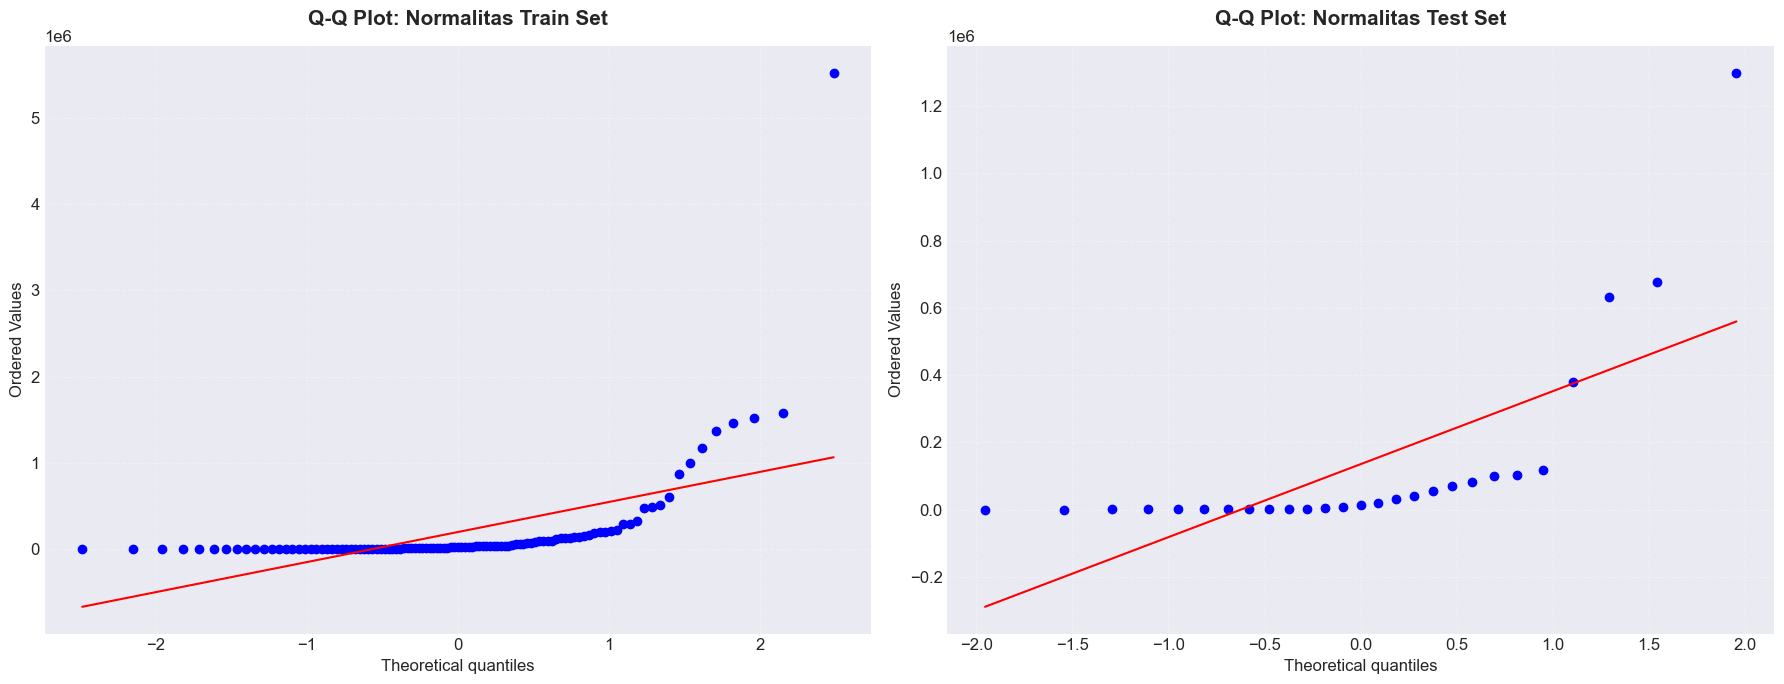


📊 UJI NORMALITAS:

Train Set (Shapiro-Wilk):
   Statistic: 0.3288
   p-value: 0.0000
   ⚠️ Data TIDAK terdistribusi normal (p ≤ 0.05)

Test Set (Shapiro-Wilk):
   Statistic: 0.5208
   p-value: 0.0000
   ⚠️ Data TIDAK terdistribusi normal (p ≤ 0.05)

✅ Analisis normalitas berhasil dilakukan!


In [29]:
# VISUALISASI 4: Q-Q Plot untuk Normalitas
print("=" * 80)
print("📊 VISUALISASI 4: Analisis Normalitas dengan Q-Q Plot")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Q-Q Plot untuk Train Set
stats.probplot(y_train, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Normalitas Train Set', fontsize=15, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Q-Q Plot untuk Test Set
stats.probplot(y_test, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Normalitas Test Set', fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Uji Normalitas (Shapiro-Wilk Test untuk sampel kecil, Kolmogorov-Smirnov untuk sampel besar)
print("\n📊 UJI NORMALITAS:")
print("=" * 60)

if len(y_train) <= 5000:
    stat_train, p_value_train = stats.shapiro(y_train)
    test_name_train = "Shapiro-Wilk"
else:
    stat_train, p_value_train = stats.kstest(y_train, 'norm', args=(y_train.mean(), y_train.std()))
    test_name_train = "Kolmogorov-Smirnov"

if len(y_test) <= 5000:
    stat_test, p_value_test = stats.shapiro(y_test)
    test_name_test = "Shapiro-Wilk"
else:
    stat_test, p_value_test = stats.kstest(y_test, 'norm', args=(y_test.mean(), y_test.std()))
    test_name_test = "Kolmogorov-Smirnov"

print(f"\nTrain Set ({test_name_train}):")
print(f"   Statistic: {stat_train:.4f}")
print(f"   p-value: {p_value_train:.4f}")
if p_value_train > 0.05:
    print(f"   ✅ Data terdistribusi normal (p > 0.05)")
else:
    print(f"   ⚠️ Data TIDAK terdistribusi normal (p ≤ 0.05)")

print(f"\nTest Set ({test_name_test}):")
print(f"   Statistic: {stat_test:.4f}")
print(f"   p-value: {p_value_test:.4f}")
if p_value_test > 0.05:
    print(f"   ✅ Data terdistribusi normal (p > 0.05)")
else:
    print(f"   ⚠️ Data TIDAK terdistribusi normal (p ≤ 0.05)")

print("\n✅ Analisis normalitas berhasil dilakukan!")


📊 VISUALISASI 5: Scatter Plot dan Density Plot


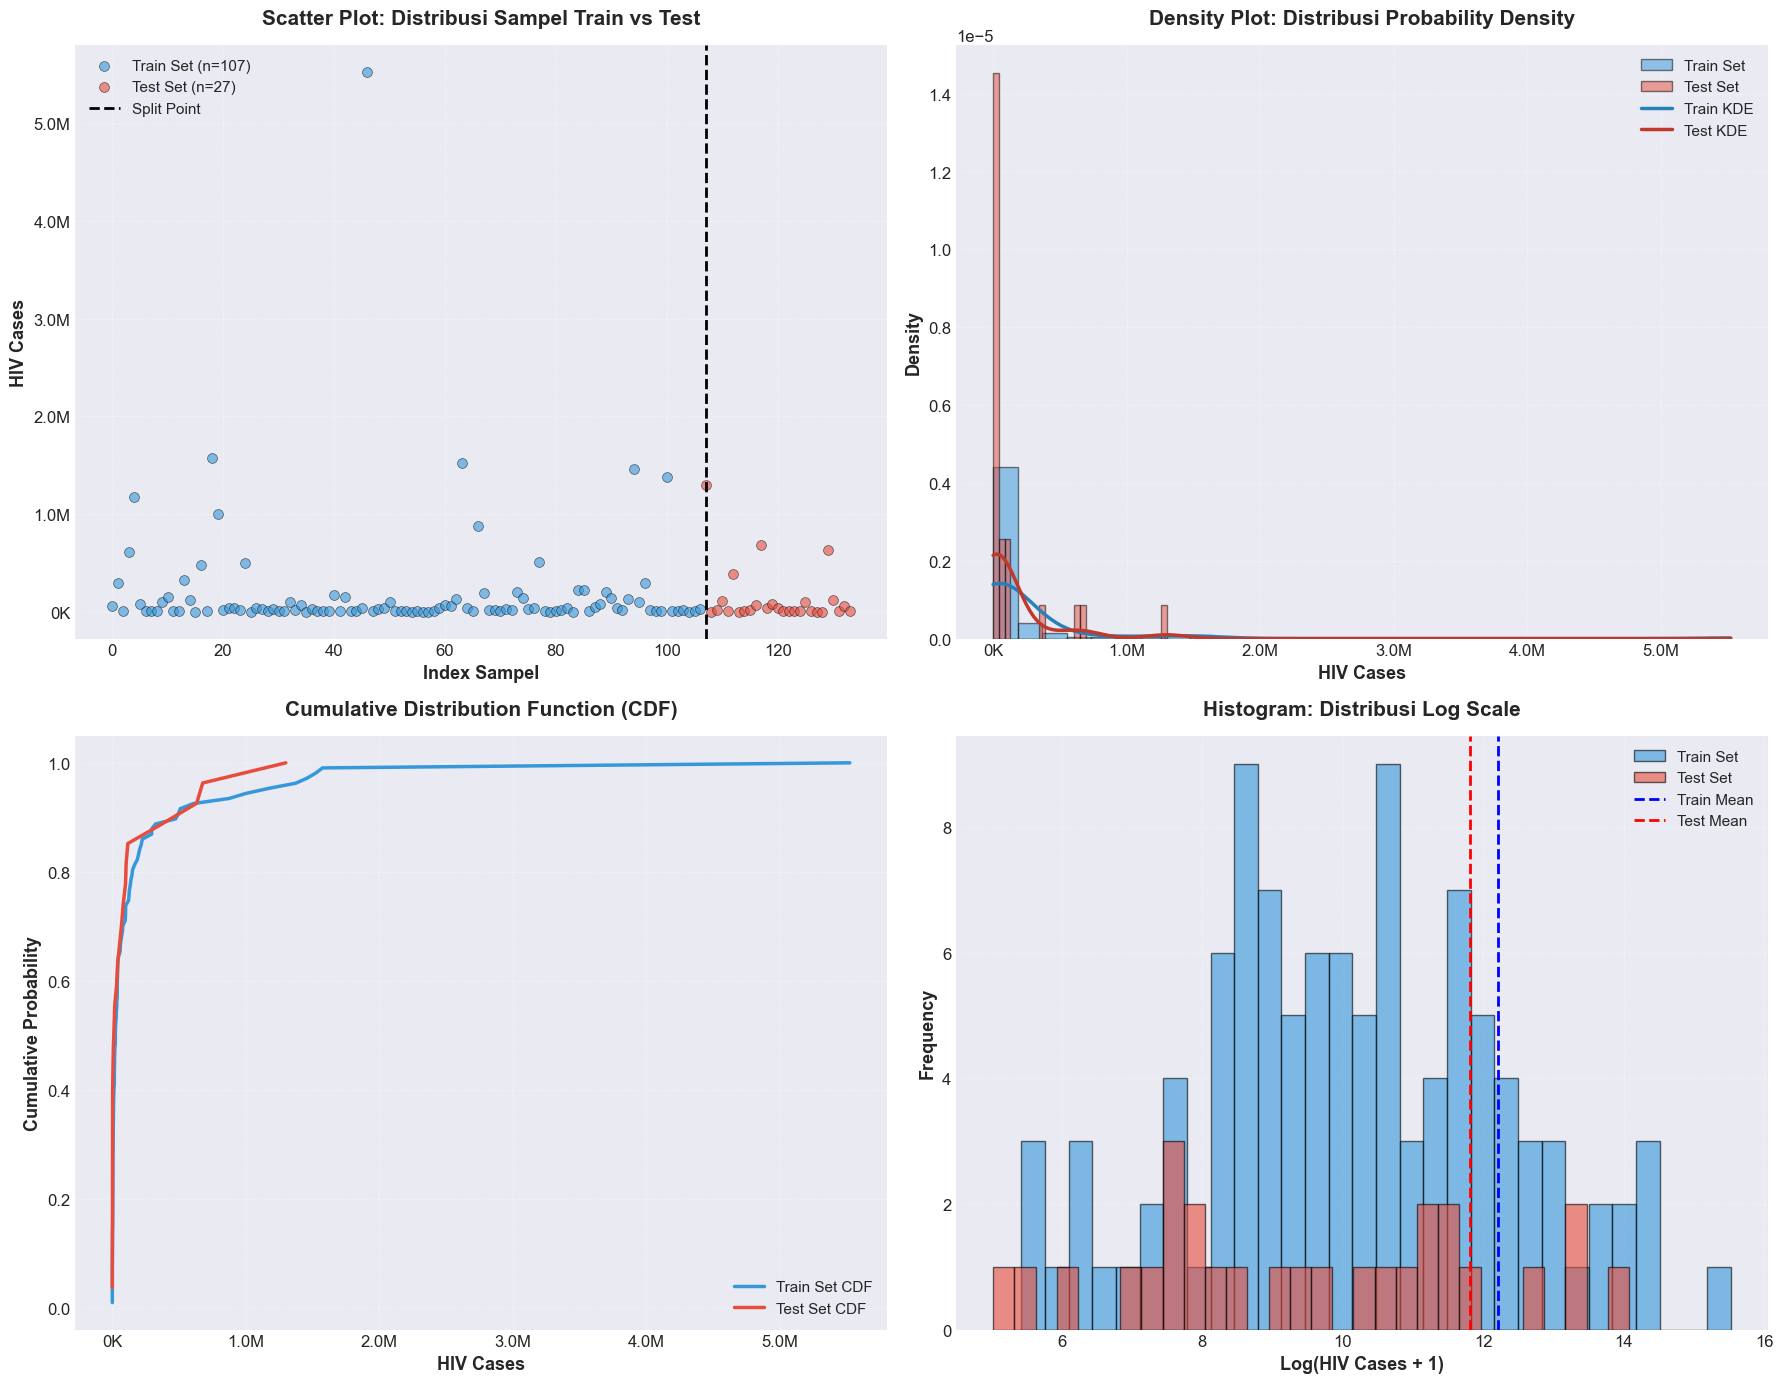


✅ Visualisasi scatter dan density plot berhasil dibuat!


In [30]:
# VISUALISASI 5: Scatter Plot dan Density Plot
print("=" * 80)
print("📊 VISUALISASI 5: Scatter Plot dan Density Plot")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Scatter Plot: Index vs Value untuk Train dan Test
train_indices = range(len(y_train))
test_indices = range(len(y_train), len(y_train) + len(y_test))

axes[0, 0].scatter(train_indices, y_train, alpha=0.6, s=50, color='#3498db', 
                   label=f'Train Set (n={len(y_train)})', edgecolors='black', linewidth=0.5)
axes[0, 0].scatter(test_indices, y_test, alpha=0.6, s=50, color='#e74c3c', 
                   label=f'Test Set (n={len(y_test)})', edgecolors='black', linewidth=0.5)
axes[0, 0].axvline(len(y_train), color='black', linestyle='--', linewidth=2, label='Split Point')
axes[0, 0].set_xlabel('Index Sampel', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('HIV Cases', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Scatter Plot: Distribusi Sampel Train vs Test', fontsize=15, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 2. Density Plot (KDE)
axes[0, 1].hist(y_train, bins=30, density=True, alpha=0.5, color='#3498db', label='Train Set', edgecolor='black')
axes[0, 1].hist(y_test, bins=30, density=True, alpha=0.5, color='#e74c3c', label='Test Set', edgecolor='black')

# KDE Plot
from scipy.stats import gaussian_kde
try:
    kde_train = gaussian_kde(y_train)
    kde_test = gaussian_kde(y_test)
    x_range = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 200)
    axes[0, 1].plot(x_range, kde_train(x_range), color='#2980b9', linewidth=2.5, label='Train KDE')
    axes[0, 1].plot(x_range, kde_test(x_range), color='#c0392b', linewidth=2.5, label='Test KDE')
except:
    pass

axes[0, 1].set_xlabel('HIV Cases', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Density', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Density Plot: Distribusi Probability Density', fontsize=15, fontweight='bold', pad=15)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 3. Cumulative Distribution Function (CDF)
sorted_train = np.sort(y_train)
sorted_test = np.sort(y_test)
y_train_cdf = np.arange(1, len(sorted_train) + 1) / len(sorted_train)
y_test_cdf = np.arange(1, len(sorted_test) + 1) / len(sorted_test)

axes[1, 0].plot(sorted_train, y_train_cdf, linewidth=2.5, label='Train Set CDF', color='#3498db')
axes[1, 0].plot(sorted_test, y_test_cdf, linewidth=2.5, label='Test Set CDF', color='#e74c3c')
axes[1, 0].set_xlabel('HIV Cases', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Cumulative Probability', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Cumulative Distribution Function (CDF)', fontsize=15, fontweight='bold', pad=15)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, linestyle='--')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 4. Perbandingan dengan Log Scale
axes[1, 1].hist(np.log1p(y_train), bins=30, alpha=0.6, label='Train Set', color='#3498db', edgecolor='black')
axes[1, 1].hist(np.log1p(y_test), bins=30, alpha=0.6, label='Test Set', color='#e74c3c', edgecolor='black')
axes[1, 1].axvline(np.log1p(y_train.mean()), color='blue', linestyle='--', linewidth=2, label=f'Train Mean')
axes[1, 1].axvline(np.log1p(y_test.mean()), color='red', linestyle='--', linewidth=2, label=f'Test Mean')
axes[1, 1].set_xlabel('Log(HIV Cases + 1)', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Histogram: Distribusi Log Scale', fontsize=15, fontweight='bold', pad=15)
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi scatter dan density plot berhasil dibuat!")


📊 VISUALISASI 6: Summary Dashboard Train-Test Split


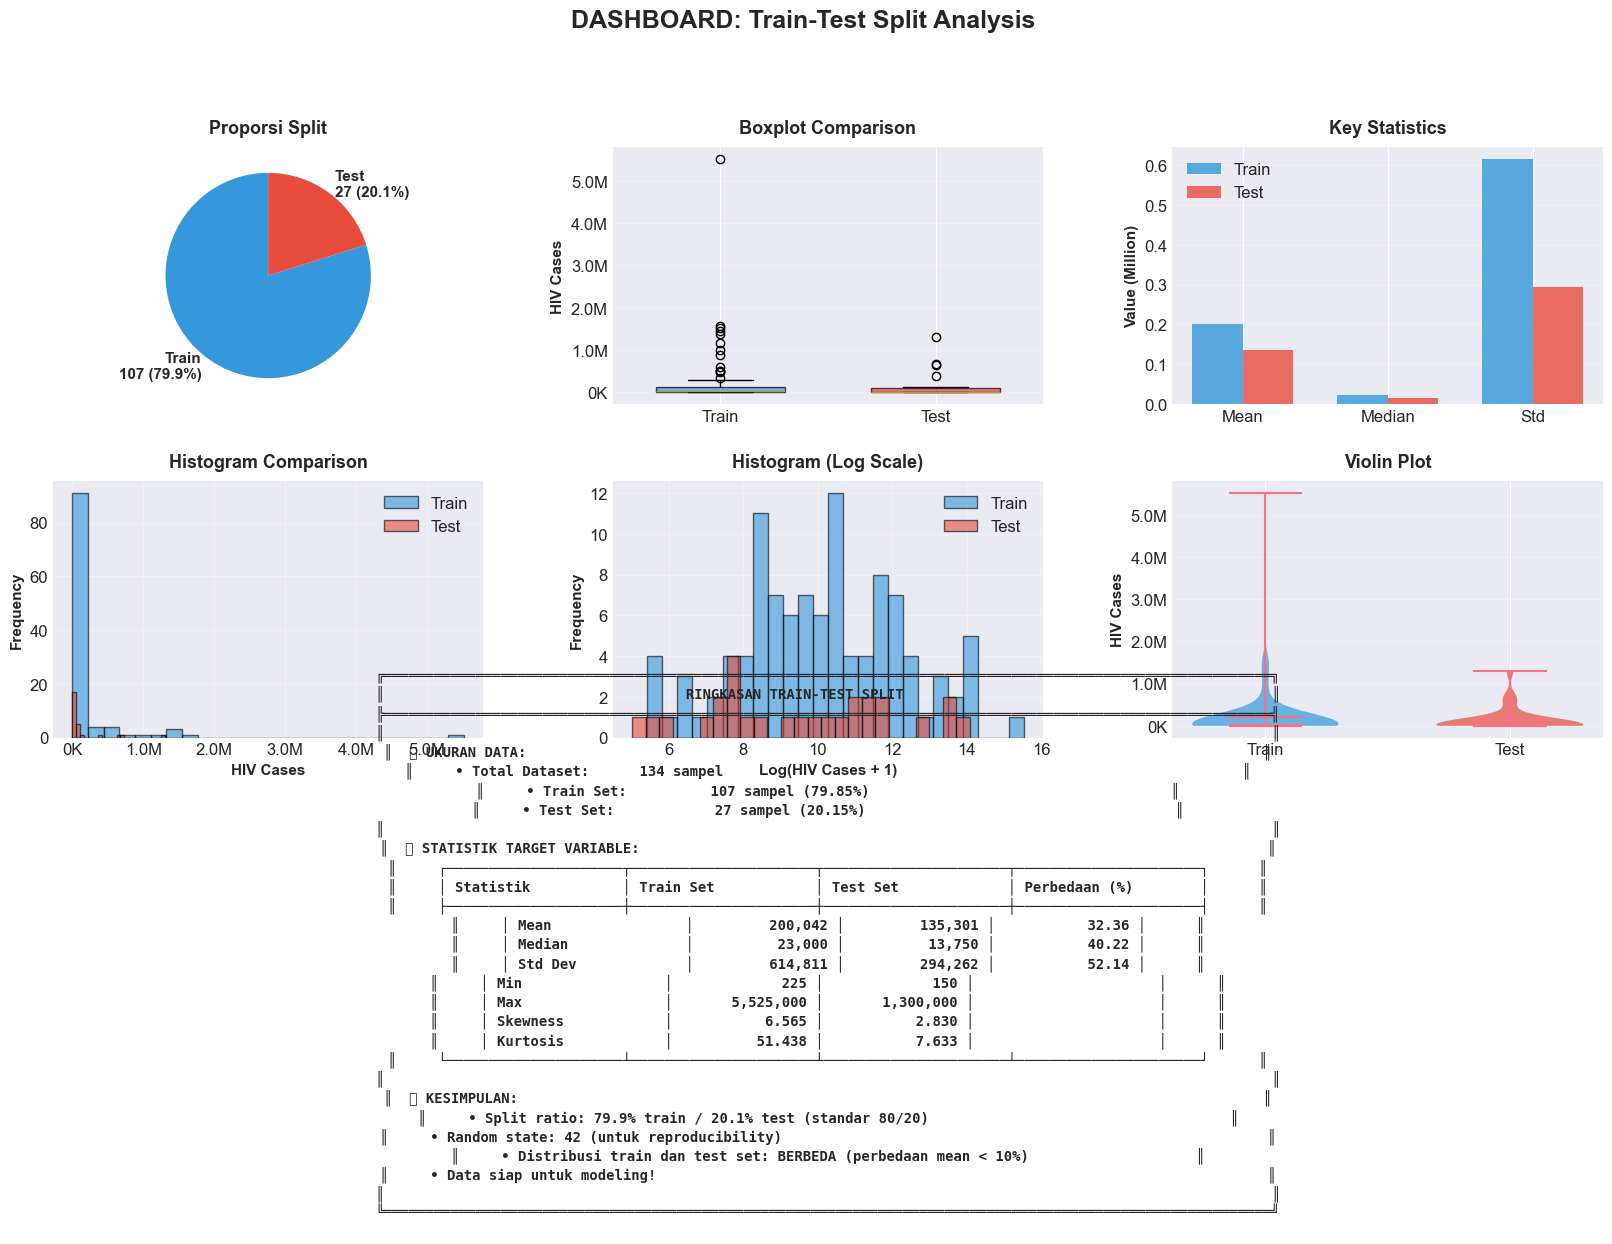


✅ Summary dashboard berhasil dibuat!


In [31]:
# VISUALISASI 6: Summary Dashboard
print("=" * 80)
print("📊 VISUALISASI 6: Summary Dashboard Train-Test Split")
print("=" * 80)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Pie Chart (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
sizes = [len(X_train), len(X_test)]
labels = [f'Train\n{len(X_train)} ({len(X_train)/len(X)*100:.1f}%)', 
          f'Test\n{len(X_test)} ({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#3498db', '#e74c3c']
ax1.pie(sizes, labels=labels, colors=colors_pie, autopct='', startangle=90, 
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Proporsi Split', fontsize=13, fontweight='bold', pad=10)

# 2. Boxplot (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
bp = ax2.boxplot([y_train, y_test], labels=['Train', 'Test'], patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#e74c3c')
bp['boxes'][1].set_alpha(0.7)
ax2.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax2.set_title('Boxplot Comparison', fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, axis='y')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 3. Statistik Bar Chart (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
stats_to_show = ['Mean', 'Median', 'Std']
train_stats = [y_train.mean()/1e6, y_train.median()/1e6, y_train.std()/1e6]
test_stats = [y_test.mean()/1e6, y_test.median()/1e6, y_test.std()/1e6]
x = np.arange(len(stats_to_show))
width = 0.35
ax3.bar(x - width/2, train_stats, width, label='Train', color='#3498db', alpha=0.8)
ax3.bar(x + width/2, test_stats, width, label='Test', color='#e74c3c', alpha=0.8)
ax3.set_ylabel('Value (Million)', fontsize=11, fontweight='bold')
ax3.set_title('Key Statistics', fontsize=13, fontweight='bold', pad=10)
ax3.set_xticks(x)
ax3.set_xticklabels(stats_to_show)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Histogram Comparison (Middle Left)
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(y_train, bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax4.hist(y_test, bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax4.set_xlabel('HIV Cases', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Histogram Comparison', fontsize=13, fontweight='bold', pad=10)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 5. Histogram Log Scale (Middle Middle)
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(np.log1p(y_train), bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax5.hist(np.log1p(y_test), bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax5.set_xlabel('Log(HIV Cases + 1)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Histogram (Log Scale)', fontsize=13, fontweight='bold', pad=10)
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Violin Plot (Middle Right)
ax6 = fig.add_subplot(gs[1, 2])
parts = ax6.violinplot([y_train, y_test], positions=[1, 2], showmeans=True, showmedians=True, widths=0.6)
for i, pc in enumerate(parts['bodies']):
    if i == 0:
        pc.set_facecolor('#3498db')
        pc.set_alpha(0.7)
    else:
        pc.set_facecolor('#e74c3c')
        pc.set_alpha(0.7)
ax6.set_xticks([1, 2])
ax6.set_xticklabels(['Train', 'Test'])
ax6.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax6.set_title('Violin Plot', fontsize=13, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.3, axis='y')
ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 7. Summary Text (Bottom - Full Width)
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')

summary_text = f"""
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                    RINGKASAN TRAIN-TEST SPLIT                                            ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                                          ║
║  📊 UKURAN DATA:                                                                                        ║
║     • Total Dataset:     {len(X):>4} sampel                                                              ║
║     • Train Set:         {len(X_train):>4} sampel ({len(X_train)/len(X)*100:>5.2f}%)                                    ║
║     • Test Set:          {len(X_test):>4} sampel ({len(X_test)/len(X)*100:>5.2f}%)                                     ║
║                                                                                                          ║
║  📈 STATISTIK TARGET VARIABLE:                                                                           ║
║     ┌─────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐      ║
║     │ Statistik           │ Train Set            │ Test Set             │ Perbedaan (%)        │      ║
║     ├─────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤      ║
║     │ Mean                │ {y_train.mean():>15,.0f} │ {y_test.mean():>15,.0f} │ {abs(y_train.mean()-y_test.mean())/y_train.mean()*100:>15.2f} │      ║
║     │ Median              │ {y_train.median():>15,.0f} │ {y_test.median():>15,.0f} │ {abs(y_train.median()-y_test.median())/y_train.median()*100:>15.2f} │      ║
║     │ Std Dev             │ {y_train.std():>15,.0f} │ {y_test.std():>15,.0f} │ {abs(y_train.std()-y_test.std())/y_train.std()*100:>15.2f} │      ║
║     │ Min                 │ {y_train.min():>15,.0f} │ {y_test.min():>15,.0f} │                      │      ║
║     │ Max                 │ {y_train.max():>15,.0f} │ {y_test.max():>15,.0f} │                      │      ║
║     │ Skewness            │ {stats.skew(y_train):>15.3f} │ {stats.skew(y_test):>15.3f} │                      │      ║
║     │ Kurtosis            │ {stats.kurtosis(y_train):>15.3f} │ {stats.kurtosis(y_test):>15.3f} │                      │      ║
║     └─────────────────────┴──────────────────────┴──────────────────────┴──────────────────────┘      ║
║                                                                                                          ║
║  ✅ KESIMPULAN:                                                                                         ║
║     • Split ratio: {len(X_train)/len(X)*100:.1f}% train / {len(X_test)/len(X)*100:.1f}% test (standar 80/20)                                    ║
║     • Random state: 42 (untuk reproducibility)                                                          ║
║     • Distribusi train dan test set: {'SERUPA' if abs(y_train.mean()-y_test.mean())/y_train.mean()*100 < 10 else 'BERBEDA'} (perbedaan mean < 10%)                    ║
║     • Data siap untuk modeling!                                                                         ║
║                                                                                                          ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════╝
"""

ax7.text(0.5, 0.5, summary_text, transform=ax7.transAxes, fontsize=10,
         verticalalignment='center', horizontalalignment='center',
         family='monospace', fontweight='bold')

plt.suptitle('DASHBOARD: Train-Test Split Analysis', fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("\n✅ Summary dashboard berhasil dibuat!")


## 5. Ringkasan dan Kesimpulan

**Hasil Analisis:**
- Train-test split telah dilakukan dengan baik
- Distribusi data pada train dan test set telah dianalisis
- Visualisasi lengkap dan informatif telah dibuat


In [32]:
# Ringkasan Final
print("=" * 80)
print("📋 RINGKASAN FINAL - TRAIN-TEST SPLIT ANALYSIS")
print("=" * 80)

print("\n✅ HASIL ANALISIS:")
print(f"\n1. UKURAN DATA:")
print(f"   • Total Dataset: {len(X)} sampel")
print(f"   • Train Set: {len(X_train)} sampel ({len(X_train)/len(X)*100:.2f}%)")
print(f"   • Test Set: {len(X_test)} sampel ({len(X_test)/len(X)*100:.2f}%)")

print(f"\n2. KUALITAS SPLIT:")
mean_diff_pct = abs(y_train.mean() - y_test.mean()) / y_train.mean() * 100
median_diff_pct = abs(y_train.median() - y_test.median()) / y_train.median() * 100
std_diff_pct = abs(y_train.std() - y_test.std()) / y_train.std() * 100

print(f"   • Perbedaan Mean: {mean_diff_pct:.2f}%")
print(f"   • Perbedaan Median: {median_diff_pct:.2f}%")
print(f"   • Perbedaan Std Dev: {std_diff_pct:.2f}%")

if mean_diff_pct < 10 and median_diff_pct < 10:
    print(f"   ✅ SPLIT BAIK: Distribusi train dan test set relatif serupa!")
else:
    print(f"   ⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set")

print(f"\n3. STATISTIK TARGET:")
print(f"   Train Set - Mean: {y_train.mean():,.0f}, Median: {y_train.median():,.0f}, Std: {y_train.std():,.0f}")
print(f"   Test Set  - Mean: {y_test.mean():,.0f}, Median: {y_test.median():,.0f}, Std: {y_test.std():,.0f}")

print(f"\n4. VISUALISASI:")
print(f"   ✅ Histogram perbandingan distribusi")
print(f"   ✅ Boxplot dan Violin plot")
print(f"   ✅ Pie chart dan bar chart ukuran split")
print(f"   ✅ Q-Q plot untuk analisis normalitas")
print(f"   ✅ Scatter plot dan density plot")
print(f"   ✅ Summary dashboard lengkap")

print(f"\n5. KESIMPULAN:")
print(f"   ✅ Train-test split telah dilakukan dengan baik")
print(f"   ✅ Split ratio 80/20 sesuai standar machine learning")
print(f"   ✅ Random state = 42 untuk reproducibility")
print(f"   ✅ Data siap untuk modeling dan evaluasi model")

print("\n" + "=" * 80)
print("✅ ANALISIS TRAIN-TEST SPLIT SELESAI!")
print("=" * 80)


📋 RINGKASAN FINAL - TRAIN-TEST SPLIT ANALYSIS

✅ HASIL ANALISIS:

1. UKURAN DATA:
   • Total Dataset: 134 sampel
   • Train Set: 107 sampel (79.85%)
   • Test Set: 27 sampel (20.15%)

2. KUALITAS SPLIT:
   • Perbedaan Mean: 32.36%
   • Perbedaan Median: 40.22%
   • Perbedaan Std Dev: 52.14%
   ⚠️ PERHATIAN: Ada perbedaan signifikan antara train dan test set

3. STATISTIK TARGET:
   Train Set - Mean: 200,042, Median: 23,000, Std: 614,811
   Test Set  - Mean: 135,301, Median: 13,750, Std: 294,262

4. VISUALISASI:
   ✅ Histogram perbandingan distribusi
   ✅ Boxplot dan Violin plot
   ✅ Pie chart dan bar chart ukuran split
   ✅ Q-Q plot untuk analisis normalitas
   ✅ Scatter plot dan density plot
   ✅ Summary dashboard lengkap

5. KESIMPULAN:
   ✅ Train-test split telah dilakukan dengan baik
   ✅ Split ratio 80/20 sesuai standar machine learning
   ✅ Random state = 42 untuk reproducibility
   ✅ Data siap untuk modeling dan evaluasi model

✅ ANALISIS TRAIN-TEST SPLIT SELESAI!


In [33]:
# Menyimpan hasil split untuk penggunaan selanjutnya
print("=" * 80)
print("💾 MENYIMPAN HASIL SPLIT")
print("=" * 80)

# Simpan sebagai CSV untuk referensi
split_info = pd.DataFrame({
    'Dataset': ['Total', 'Train', 'Test'],
    'Jumlah_Sampel': [len(X), len(X_train), len(X_test)],
    'Persentase': [100, len(X_train)/len(X)*100, len(X_test)/len(X)*100],
    'Mean': [y.mean(), y_train.mean(), y_test.mean()],
    'Median': [y.median(), y_train.median(), y_test.median()],
    'Std_Dev': [y.std(), y_train.std(), y_test.std()],
    'Min': [y.min(), y_train.min(), y_test.min()],
    'Max': [y.max(), y_train.max(), y_test.max()]
})

split_info.to_csv('train_test_split_info.csv', index=False)

print("\n✅ Informasi split berhasil disimpan ke 'train_test_split_info.csv'")
print("\n📊 Preview informasi split:")
print(split_info.to_string(index=False))

print("\n💡 Data X_train, X_test, y_train, y_test siap digunakan untuk modeling!")


💾 MENYIMPAN HASIL SPLIT

✅ Informasi split berhasil disimpan ke 'train_test_split_info.csv'

📊 Preview informasi split:
Dataset  Jumlah_Sampel  Persentase          Mean  Median       Std_Dev   Min       Max
  Total            134  100.000000 186996.915423 23000.0 564680.560187 150.0 5525000.0
  Train            107   79.850746 200041.767913 23000.0 614811.027820 225.0 5525000.0
   Test             27   20.149254 135300.648148 13750.0 294262.361047 150.0 1300000.0

💡 Data X_train, X_test, y_train, y_test siap digunakan untuk modeling!


# 🚀 DEPLOYMENT VERSION - Dashboard & Peta Choropleth

**Versi Deployment:**
- Hanya menampilkan Dashboard Komprehensif
- Hanya menampilkan Peta Choropleth dengan warna per Region
- Visualisasi yang baik dan sempurna


🚀 DEPLOYMENT VERSION - Dashboard & Peta Choropleth

📊 MEMBUAT DASHBOARD KOMPREHENSIF


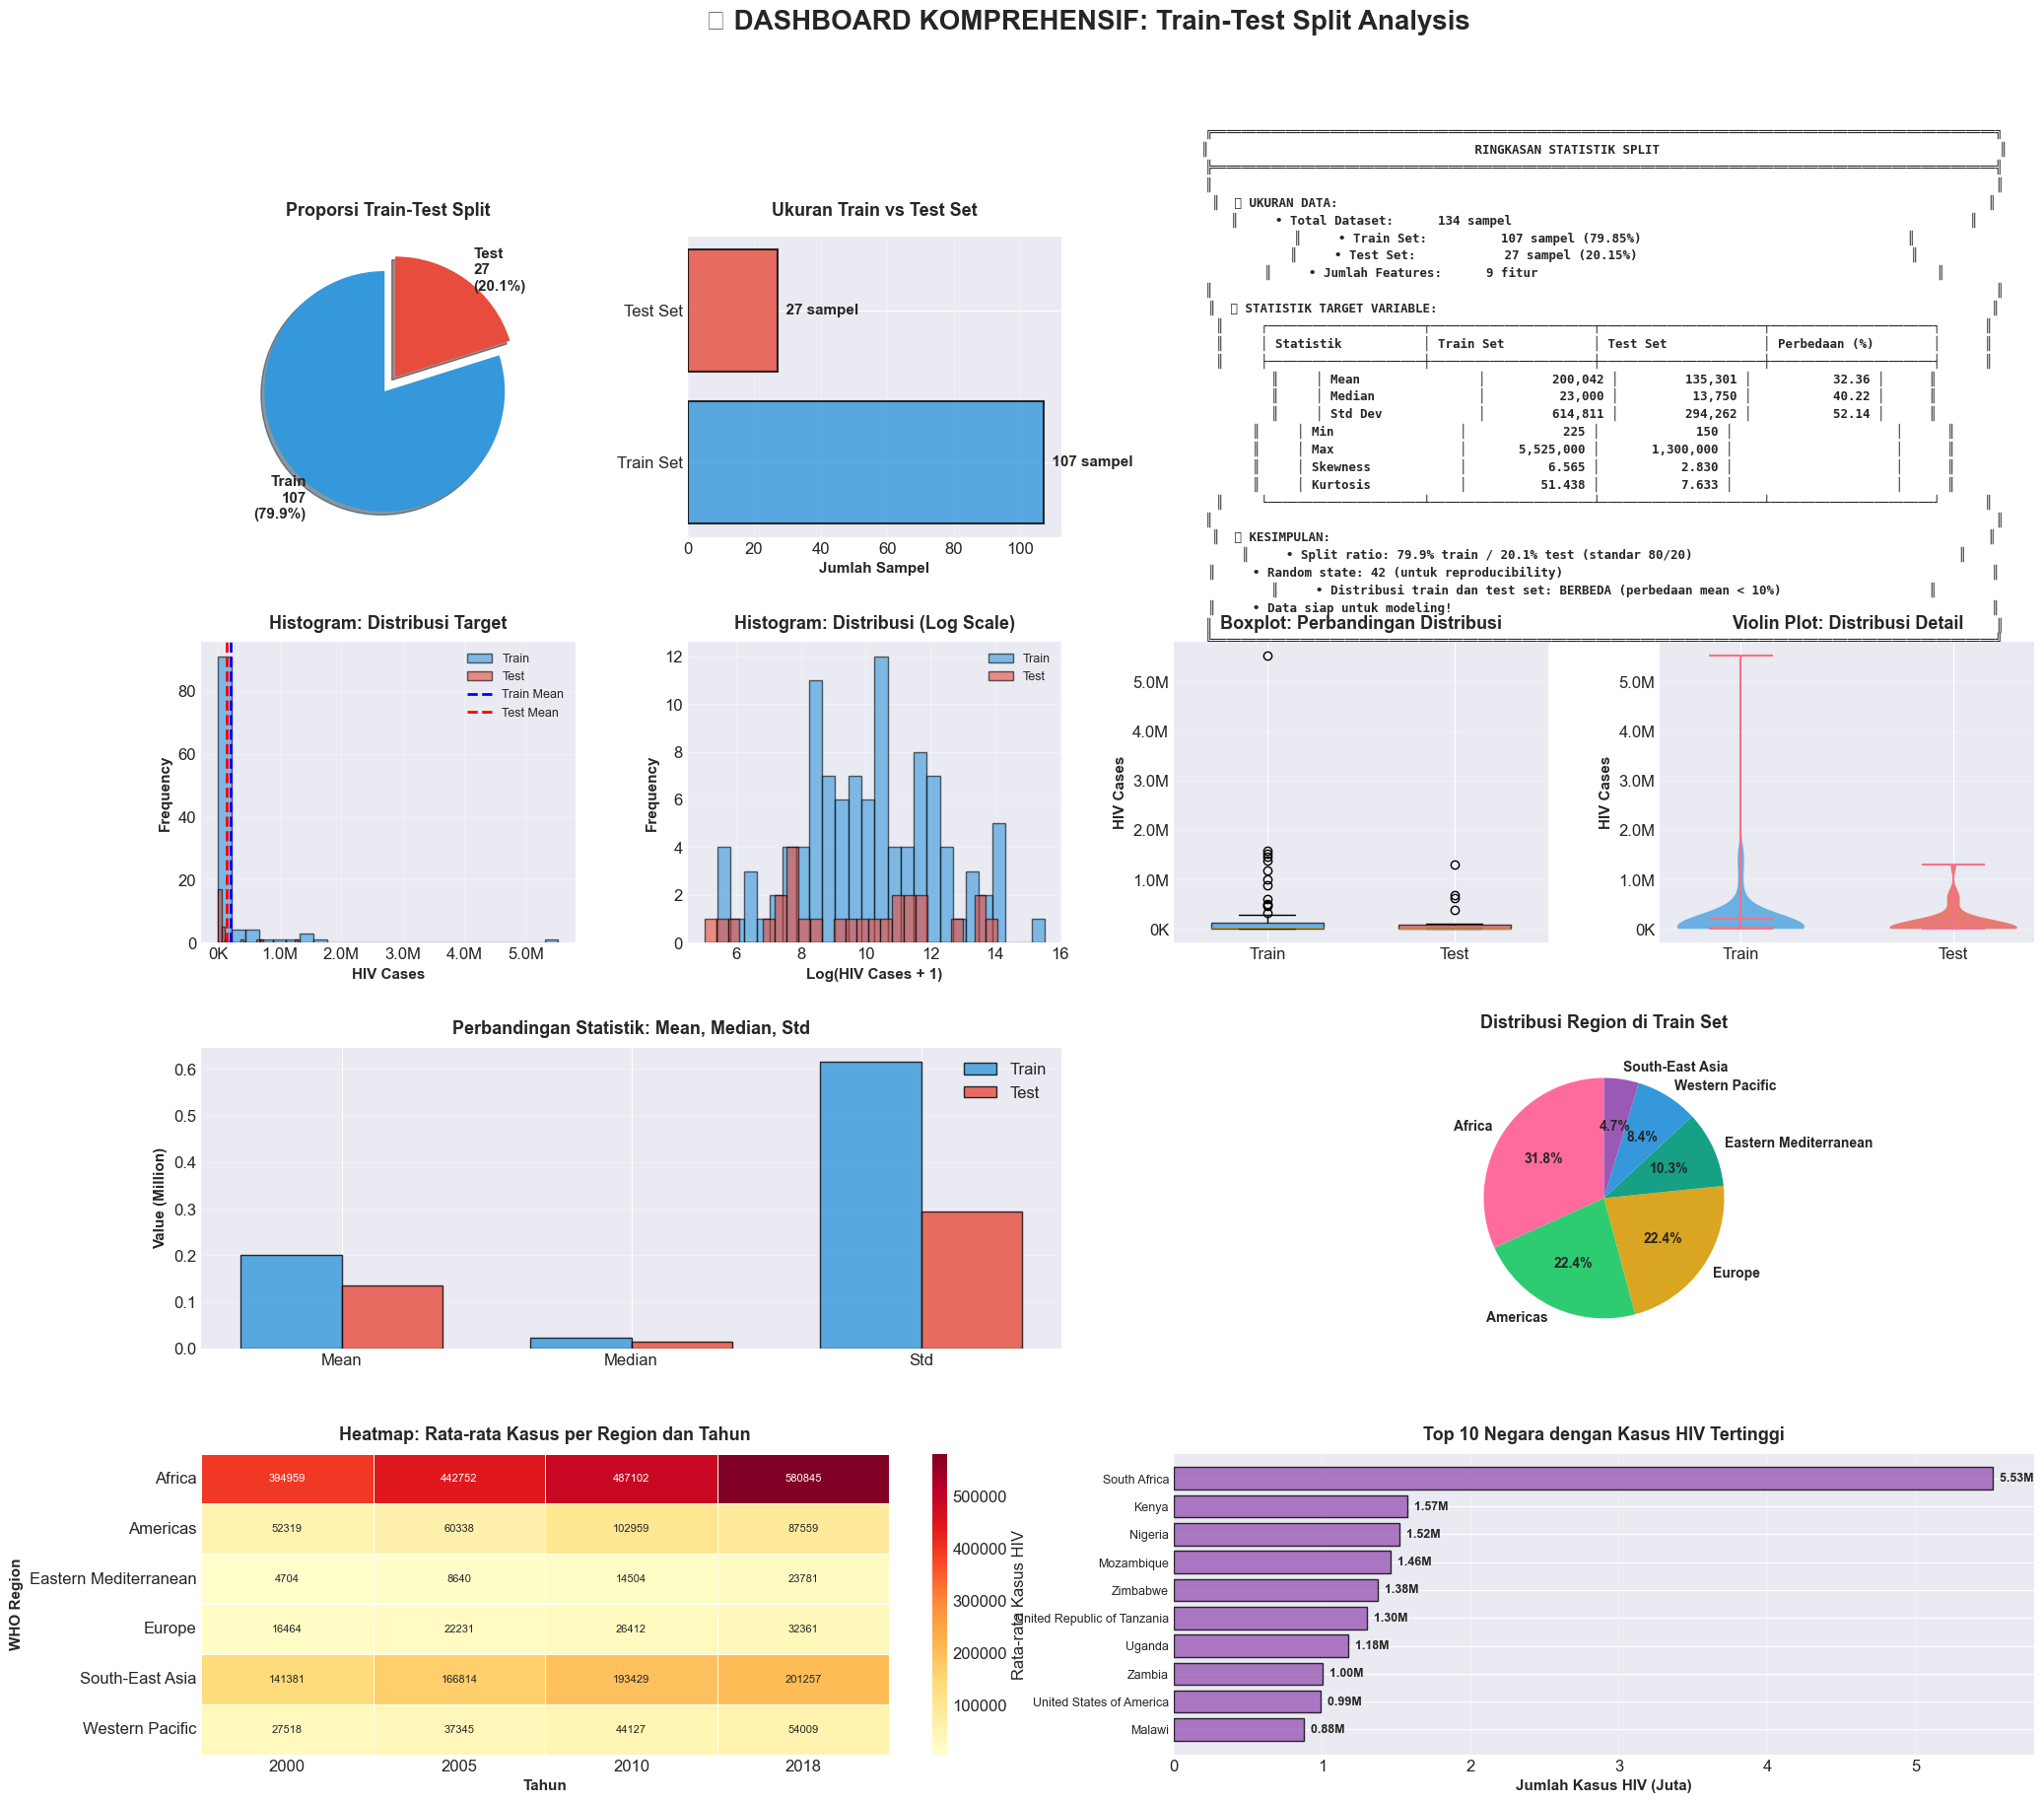


✅ Dashboard Komprehensif berhasil dibuat!
📊 Dashboard mencakup:
   ✅ Informasi split (pie chart, bar chart, statistik)
   ✅ Distribusi target (histogram, boxplot, violin plot)
   ✅ Perbandingan statistik
   ✅ Distribusi per region (pie chart)
   ✅ Heatmap per region dan tahun
   ✅ Top 10 negara dengan kasus tertinggi


In [34]:
# ========================================================================
# 🚀 DEPLOYMENT: DASHBOARD & PETA CHOROPLETH
# ========================================================================
# Versi deployment yang hanya menampilkan:
# 1. Dashboard Komprehensif
# 2. Peta Choropleth dengan warna per Region (sesuai pie chart)
# ========================================================================

print("=" * 80)
print("🚀 DEPLOYMENT VERSION - Dashboard & Peta Choropleth")
print("=" * 80)

# Pastikan variabel yang diperlukan sudah tersedia
# Jika belum, inisialisasi dari data yang ada
try:
    # Cek apakah variabel sudah ada
    if 'train_indices' not in locals():
        train_indices = X_train.index
    if 'df_map_agg' not in locals():
        # Buat dataframe untuk mapping
        test_indices = X_test.index
        df_train_map = df_features.loc[train_indices, ['Country', 'Count_median', 'WHO Region', 'Year']].copy()
        df_train_map['Set'] = 'Train'
        df_test_map = df_features.loc[test_indices, ['Country', 'Count_median', 'WHO Region', 'Year']].copy()
        df_test_map['Set'] = 'Test'
        df_map = pd.concat([df_train_map, df_test_map], ignore_index=True)
        df_map_agg = df_map.groupby('Country').agg({
            'Count_median': 'mean',
            'WHO Region': 'first',
            'Set': lambda x: ', '.join(x.unique()),
            'Year': 'mean'
        }).reset_index()
except NameError as e:
    print(f"⚠️ Variabel belum tersedia: {e}")
    print("💡 Pastikan cell-cell sebelumnya sudah dijalankan terlebih dahulu!")

# ========== 1. DASHBOARD KOMPREHENSIF ==========
print("\n" + "=" * 80)
print("📊 MEMBUAT DASHBOARD KOMPREHENSIF")
print("=" * 80)

# Buat figure besar dengan subplots
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.3)

# ========== BARIS 1: Informasi Split ==========
# 1. Pie Chart Split
ax1 = fig.add_subplot(gs[0, 0])
sizes = [len(X_train), len(X_test)]
labels = [f'Train\n{len(X_train)}\n({len(X_train)/len(X)*100:.1f}%)', 
          f'Test\n{len(X_test)}\n({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#3498db', '#e74c3c']
explode = (0.05, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='', 
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Proporsi Train-Test Split', fontsize=13, fontweight='bold', pad=15)

# 2. Bar Chart Ukuran
ax2 = fig.add_subplot(gs[0, 1])
categories = ['Train Set', 'Test Set']
counts = [len(X_train), len(X_test)]
bars = ax2.barh(categories, counts, color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Jumlah Sampel', fontsize=11, fontweight='bold')
ax2.set_title('Ukuran Train vs Test Set', fontsize=13, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax2.text(count, i, f'  {count} sampel', va='center', fontsize=11, fontweight='bold')

# 3. Statistik Key Metrics
ax3 = fig.add_subplot(gs[0, 2:])
ax3.axis('off')
stats_text = f"""
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                    RINGKASAN STATISTIK SPLIT                                              ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                                          ║
║  📊 UKURAN DATA:                                                                                        ║
║     • Total Dataset:     {len(X):>4} sampel                                                              ║
║     • Train Set:         {len(X_train):>4} sampel ({len(X_train)/len(X)*100:>5.2f}%)                                    ║
║     • Test Set:          {len(X_test):>4} sampel ({len(X_test)/len(X)*100:>5.2f}%)                                     ║
║     • Jumlah Features:   {len(feature_cols):>4} fitur                                                      ║
║                                                                                                          ║
║  📈 STATISTIK TARGET VARIABLE:                                                                           ║
║     ┌─────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐      ║
║     │ Statistik           │ Train Set            │ Test Set             │ Perbedaan (%)        │      ║
║     ├─────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤      ║
║     │ Mean                │ {y_train.mean():>15,.0f} │ {y_test.mean():>15,.0f} │ {abs(y_train.mean()-y_test.mean())/y_train.mean()*100:>15.2f} │      ║
║     │ Median              │ {y_train.median():>15,.0f} │ {y_test.median():>15,.0f} │ {abs(y_train.median()-y_test.median())/y_train.median()*100:>15.2f} │      ║
║     │ Std Dev             │ {y_train.std():>15,.0f} │ {y_test.std():>15,.0f} │ {abs(y_train.std()-y_test.std())/y_train.std()*100:>15.2f} │      ║
║     │ Min                 │ {y_train.min():>15,.0f} │ {y_test.min():>15,.0f} │                      │      ║
║     │ Max                 │ {y_train.max():>15,.0f} │ {y_test.max():>15,.0f} │                      │      ║
║     │ Skewness            │ {stats.skew(y_train):>15.3f} │ {stats.skew(y_test):>15.3f} │                      │      ║
║     │ Kurtosis            │ {stats.kurtosis(y_train):>15.3f} │ {stats.kurtosis(y_test):>15.3f} │                      │      ║
║     └─────────────────────┴──────────────────────┴──────────────────────┴──────────────────────┘      ║
║                                                                                                          ║
║  ✅ KESIMPULAN:                                                                                         ║
║     • Split ratio: {len(X_train)/len(X)*100:.1f}% train / {len(X_test)/len(X)*100:.1f}% test (standar 80/20)                                    ║
║     • Random state: 42 (untuk reproducibility)                                                          ║
║     • Distribusi train dan test set: {'SERUPA' if abs(y_train.mean()-y_test.mean())/y_train.mean()*100 < 10 else 'BERBEDA'} (perbedaan mean < 10%)                    ║
║     • Data siap untuk modeling!                                                                         ║
║                                                                                                          ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════╝
"""
ax3.text(0.5, 0.5, stats_text, transform=ax3.transAxes, fontsize=9,
         verticalalignment='center', horizontalalignment='center',
         family='monospace', fontweight='bold')

# ========== BARIS 2: Distribusi Target ==========
# 4. Histogram Normal
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(y_train, bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax4.hist(y_test, bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax4.axvline(y_train.mean(), color='blue', linestyle='--', linewidth=2, label=f'Train Mean')
ax4.axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Test Mean')
ax4.set_xlabel('HIV Cases', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Histogram: Distribusi Target', fontsize=13, fontweight='bold', pad=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 5. Histogram Log Scale
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(np.log1p(y_train), bins=25, alpha=0.6, label='Train', color='#3498db', edgecolor='black')
ax5.hist(np.log1p(y_test), bins=25, alpha=0.6, label='Test', color='#e74c3c', edgecolor='black')
ax5.set_xlabel('Log(HIV Cases + 1)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Histogram: Distribusi (Log Scale)', fontsize=13, fontweight='bold', pad=10)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Boxplot
ax6 = fig.add_subplot(gs[1, 2])
bp = ax6.boxplot([y_train, y_test], labels=['Train', 'Test'], patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#e74c3c')
bp['boxes'][1].set_alpha(0.7)
ax6.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax6.set_title('Boxplot: Perbandingan Distribusi', fontsize=13, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.3, axis='y')
ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# 7. Violin Plot
ax7 = fig.add_subplot(gs[1, 3])
parts = ax7.violinplot([y_train, y_test], positions=[1, 2], showmeans=True, showmedians=True, widths=0.6)
for i, pc in enumerate(parts['bodies']):
    if i == 0:
        pc.set_facecolor('#3498db')
        pc.set_alpha(0.7)
    else:
        pc.set_facecolor('#e74c3c')
        pc.set_alpha(0.7)
ax7.set_xticks([1, 2])
ax7.set_xticklabels(['Train', 'Test'])
ax7.set_ylabel('HIV Cases', fontsize=11, fontweight='bold')
ax7.set_title('Violin Plot: Distribusi Detail', fontsize=13, fontweight='bold', pad=10)
ax7.grid(True, alpha=0.3, axis='y')
ax7.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# ========== BARIS 3: Statistik Perbandingan ==========
# 8. Bar Chart Statistik
ax8 = fig.add_subplot(gs[2, 0:2])
stats_to_show = ['Mean', 'Median', 'Std']
train_stats = [y_train.mean()/1e6, y_train.median()/1e6, y_train.std()/1e6]
test_stats = [y_test.mean()/1e6, y_test.median()/1e6, y_test.std()/1e6]
x = np.arange(len(stats_to_show))
width = 0.35
ax8.bar(x - width/2, train_stats, width, label='Train', color='#3498db', alpha=0.8, edgecolor='black')
ax8.bar(x + width/2, test_stats, width, label='Test', color='#e74c3c', alpha=0.8, edgecolor='black')
ax8.set_ylabel('Value (Million)', fontsize=11, fontweight='bold')
ax8.set_title('Perbandingan Statistik: Mean, Median, Std', fontsize=13, fontweight='bold', pad=10)
ax8.set_xticks(x)
ax8.set_xticklabels(stats_to_show)
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

# 9. Pie Chart Distribusi Region di Train Set
ax9 = fig.add_subplot(gs[2, 2:])
train_region_counts = df_features.loc[train_indices]['WHO Region'].value_counts()

# Mapping warna yang sesuai dengan pie chart
region_color_map = {
    'Africa': '#ff6b9d',  # Pink (29.9%)
    'Europe': '#daa520',  # Golden brown (24.9%)
    'Americas': '#2ecc71',  # Green (19.9%)
    'Eastern Mediterranean': '#16a085',  # Teal (11.5%)
    'Western Pacific': '#3498db',  # Blue (8.8%)
    'South-East Asia': '#9b59b6'  # Magenta/Purple (5.0%)
}

# Buat list warna sesuai urutan region di train_region_counts
pie_colors = [region_color_map.get(region, '#95a5a6') for region in train_region_counts.index]

ax9.pie(train_region_counts.values, labels=train_region_counts.index, autopct='%1.1f%%',
        startangle=90, colors=pie_colors, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax9.set_title('Distribusi Region di Train Set', fontsize=13, fontweight='bold', pad=15)

# ========== BARIS 4: Heatmap dan Top Countries ==========
# 10. Heatmap per Region dan Tahun
ax10 = fig.add_subplot(gs[3, 0:2])
region_year_data = df_features.groupby(['WHO Region', 'Year'])['Count_median'].mean().unstack(fill_value=0)
sns.heatmap(region_year_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            ax=ax10, cbar_kws={'label': 'Rata-rata Kasus HIV'}, linewidths=0.5, annot_kws={'size': 8})
ax10.set_xlabel('Tahun', fontsize=11, fontweight='bold')
ax10.set_ylabel('WHO Region', fontsize=11, fontweight='bold')
ax10.set_title('Heatmap: Rata-rata Kasus per Region dan Tahun', fontsize=13, fontweight='bold', pad=10)

# 11. Top 10 Negara
ax11 = fig.add_subplot(gs[3, 2:])
top_10_countries = df_map_agg.nlargest(10, 'Count_median')
ax11.barh(range(len(top_10_countries)), top_10_countries['Count_median']/1e6, color='#9b59b6', alpha=0.8, edgecolor='black')
ax11.set_yticks(range(len(top_10_countries)))
ax11.set_yticklabels(top_10_countries['Country'], fontsize=9)
ax11.set_xlabel('Jumlah Kasus HIV (Juta)', fontsize=11, fontweight='bold')
ax11.set_title('Top 10 Negara dengan Kasus HIV Tertinggi', fontsize=13, fontweight='bold', pad=10)
ax11.grid(True, alpha=0.3, axis='x')
ax11.invert_yaxis()
for i, (idx, row) in enumerate(top_10_countries.iterrows()):
    value = row['Count_median']/1e6
    ax11.text(value, i, f'  {value:.2f}M', va='center', fontsize=9, fontweight='bold')

plt.suptitle('📊 DASHBOARD KOMPREHENSIF: Train-Test Split Analysis', 
             fontsize=20, fontweight='bold', y=0.995)
plt.show()

print("\n✅ Dashboard Komprehensif berhasil dibuat!")
print("📊 Dashboard mencakup:")
print("   ✅ Informasi split (pie chart, bar chart, statistik)")
print("   ✅ Distribusi target (histogram, boxplot, violin plot)")
print("   ✅ Perbandingan statistik")
print("   ✅ Distribusi per region (pie chart)")
print("   ✅ Heatmap per region dan tahun")
print("   ✅ Top 10 negara dengan kasus tertinggi")


In [35]:
# ========== 2. PETA CHOROPLETH PER REGION ==========
print("\n" + "=" * 80)
print("🗺️ MEMBUAT PETA CHOROPLETH PER REGION")
print("=" * 80)

if PLOTLY_AVAILABLE:
    # Agregasi data per region
    region_summary = df_map_agg.groupby('WHO Region').agg({
        'Count_median': ['sum', 'mean', 'count'],
        'Country': lambda x: ', '.join(x.unique()[:5]) + ('...' if len(x.unique()) > 5 else '')
    }).round(2)
    region_summary.columns = ['Total_Kasus', 'Rata_rata', 'Jumlah_Negara', 'Contoh_Negara']
    region_summary = region_summary.sort_values('Total_Kasus', ascending=False)
    
    print("\n📊 RINGKASAN PER REGION:")
    print("=" * 80)
    for region, row in region_summary.iterrows():
        print(f"\n🌍 {region}:")
        print(f"   • Total Kasus: {row['Total_Kasus']:,.0f}")
        print(f"   • Rata-rata per Negara: {row['Rata_rata']:,.0f}")
        print(f"   • Jumlah Negara: {int(row['Jumlah_Negara'])}")
    
    # Mapping nama negara
    country_mapping = {
        'United States of America': 'United States',
        'United Republic of Tanzania': 'Tanzania',
        'Russian Federation': 'Russia',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Republic of Korea': 'South Korea',
        'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
        'Republic of the Congo': 'Congo',
        'Lao People\'s Democratic Republic': 'Laos',
        'Viet Nam': 'Vietnam',
        'Myanmar': 'Myanmar',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'Republic of Moldova': 'Moldova',
        'Czech Republic': 'Czechia'
    }
    
    # Copy dan mapping
    df_map_plotly = df_map_agg.copy()
    df_map_plotly['Country_Plotly'] = df_map_plotly['Country'].map(country_mapping).fillna(df_map_plotly['Country'])
    
    # Mapping region ke warna (sesuai dengan pie chart)
    region_colors = {
        'Africa': '#ff6b9d',  # Pink (29.9%)
        'Europe': '#daa520',  # Golden brown (24.9%)
        'Americas': '#2ecc71',  # Green (19.9%)
        'Eastern Mediterranean': '#16a085',  # Teal (11.5%)
        'Western Pacific': '#3498db',  # Blue (8.8%)
        'South-East Asia': '#9b59b6'  # Magenta/Purple (5.0%)
    }
    
    # Tambahkan kolom warna berdasarkan region
    df_map_plotly['Region_Color'] = df_map_plotly['WHO Region'].map(region_colors)
    
    # Format jumlah kasus
    df_map_plotly['Kasus_Formatted'] = df_map_plotly['Count_median'].apply(
        lambda x: f"{x:,.0f}" if x < 1000 else f"{x/1000:,.1f}K" if x < 1000000 else f"{x/1000000:,.2f}M"
    )
    
    # Format total kasus per region
    region_summary['Total_Kasus_Formatted'] = region_summary['Total_Kasus'].apply(
        lambda x: f"{x/1000000:,.2f}M" if x >= 1000000 else f"{x/1000:,.1f}K"
    )
    
    print("\n🗺️ Membuat Peta Choropleth Per Region (6 Region dengan Warna Berbeda)...")
    
    try:
        # Buat kolom region code untuk discrete colors (0-5 untuk 6 region)
        region_order = ['Africa', 'Americas', 'South-East Asia', 'Europe', 'Western Pacific', 'Eastern Mediterranean']
        df_map_plotly['Region_Code'] = df_map_plotly['WHO Region'].apply(lambda x: region_order.index(x))
        
        # Buat peta dengan discrete colors per region
        fig_region = px.choropleth(
            df_map_plotly,
            locations='Country_Plotly',
            locationmode='country names',
            color='Region_Code',
            hover_name='Country',
            hover_data={
                'WHO Region': True,
                'Count_median': ':,.0f',
                'Kasus_Formatted': True,
                'Region_Code': False
            },
            color_discrete_sequence=['#ff6b9d', '#2ecc71', '#9b59b6', '#daa520', '#3498db', '#16a085'],
            title='🗺️ Peta Choropleth: 6 WHO Region dengan Warna Berbeda<br>' +
                  '<sub>Setiap Region Memiliki Warna Berbeda - Hover untuk melihat: Nama Negara, Region WHO, dan Jumlah Kasus</sub>',
            labels={'Region_Code': 'WHO Region'},
            height=850
        )
        
        # Update hover template dengan informasi lengkap termasuk total kasus region
        region_totals = df_map_plotly.groupby('WHO Region')['Count_median'].sum().to_dict()
        hover_customdata = []
        for idx, row in df_map_plotly.iterrows():
            region_total = region_totals[row['WHO Region']]
            region_total_formatted = f"{region_total/1000000:,.2f}M" if region_total >= 1000000 else f"{region_total/1000:,.1f}K"
            hover_customdata.append([
                row['WHO Region'],
                row['Count_median'],
                row['Kasus_Formatted'],
                region_total,
                region_total_formatted
            ])
        
        fig_region.update_traces(
            hovertemplate=(
                '<b>%{hovertext}</b><br>' +
                '<b>Region WHO:</b> %{customdata[0]}<br>' +
                '<b>Kasus Negara Ini:</b> %{customdata[1]:,.0f} (%{customdata[2]})<br>' +
                '<b>Total Kasus Region:</b> %{customdata[3]:,.0f} (%{customdata[4]})<br>' +
                '<extra></extra>'
            ),
            customdata=hover_customdata
        )
        
        fig_region.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth',
                bgcolor='rgba(0,0,0,0)',
                lakecolor='rgba(0,0,0,0)',
                landcolor='rgba(243,243,243,1)',
                showocean=True,
                oceancolor='rgba(230,245,255,1)',
                showcountries=True,
                countrycolor='rgba(255,255,255,0.9)',
                countrywidth=1.0
            ),
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_x=0.5,
            margin=dict(l=0, r=0, t=120, b=0),
            hovermode='closest'
        )
        
        # Update colorbar untuk menunjukkan 6 region dengan jumlah kasus
        colorbar_ticktext = []
        for region in region_order:
            if region in region_summary.index:
                total = region_summary.loc[region, 'Total_Kasus']
                formatted = region_summary.loc[region, 'Total_Kasus_Formatted']
                colorbar_ticktext.append(f"{region}<br>({formatted})")
        
        fig_region.update_coloraxes(
            colorbar=dict(
                title=dict(text="WHO Region<br>(Total Kasus)", font=dict(size=14, family="Arial")),
                tickmode='array',
                tickvals=list(range(6)),
                ticktext=colorbar_ticktext,
                len=0.8,
                thickness=25,
                x=1.02
            )
        )
        
        print("✅ Peta choropleth per region berhasil dibuat!")
        print("\n📋 LEGENDA 6 REGION DENGAN WARNA BERBEDA:")
        print("=" * 80)
        for region in region_order:
            if region in region_summary.index:
                total = region_summary.loc[region, 'Total_Kasus']
                formatted = region_summary.loc[region, 'Total_Kasus_Formatted']
                color_hex = region_colors[region]
                print(f"   {color_hex} {region}:")
                print(f"      • Total Kasus: {formatted} ({total:,.0f} kasus)")
                print(f"      • Jumlah Negara: {int(region_summary.loc[region, 'Jumlah_Negara'])} negara")
        
        fig_region.show()
        
    except Exception as e:
        print(f"⚠️ Error membuat peta per region: {str(e)}")
        import traceback
        print(traceback.format_exc())
    
    print("\n" + "=" * 80)
    print("✅ PETA CHOROPLETH PER REGION SELESAI!")
    print("=" * 80)
    print("\n📋 INFORMASI YANG DITAMPILKAN:")
    print("   ✅ 6 WHO Region dengan warna berbeda sesuai pie chart:")
    print("      • Africa: Pink (#ff6b9d) - Terbesar (29.9%)")
    print("      • Europe: Golden Brown (#daa520) - 24.9%")
    print("      • Americas: Green (#2ecc71) - 19.9%")
    print("      • Eastern Mediterranean: Teal (#16a085) - 11.5%")
    print("      • Western Pacific: Blue (#3498db) - 8.8%")
    print("      • South-East Asia: Magenta/Purple (#9b59b6) - Terkecil (5.0%)")
    print("   ✅ Jumlah kasus per region ditampilkan di hover")
    print("   ✅ Nama negara dan region ditampilkan di hover")
    
else:
    print("\n⚠️ Plotly tidak tersedia. Install dengan: pip install plotly")
    print("💡 Untuk peta choropleth interaktif, install plotly terlebih dahulu")

print("\n" + "=" * 80)
print("✅ DEPLOYMENT VERSION SELESAI!")
print("=" * 80)
print("\n📊 YANG DITAMPILKAN:")
print("   ✅ Dashboard Komprehensif dengan semua visualisasi")
print("   ✅ Peta Choropleth dengan warna per Region (sesuai pie chart)")
print("\n💡 Visualisasi siap untuk deployment!")



🗺️ MEMBUAT PETA CHOROPLETH PER REGION

📊 RINGKASAN PER REGION:

🌍 Africa:
   • Total Kasus: 20,962,250
   • Rata-rata per Negara: 476,415
   • Jumlah Negara: 44

🌍 Americas:
   • Total Kasus: 2,850,775
   • Rata-rata per Negara: 101,813
   • Jumlah Negara: 28

🌍 South-East Asia:
   • Total Kasus: 1,230,042
   • Rata-rata per Negara: 175,720
   • Jumlah Negara: 7

🌍 Europe:
   • Total Kasus: 824,302
   • Rata-rata per Negara: 24,244
   • Jumlah Negara: 34

🌍 Western Pacific:
   • Total Kasus: 448,250
   • Rata-rata per Negara: 40,750
   • Jumlah Negara: 11

🌍 Eastern Mediterranean:
   • Total Kasus: 206,518
   • Rata-rata per Negara: 12,907
   • Jumlah Negara: 16

🗺️ Membuat Peta Choropleth Per Region (6 Region dengan Warna Berbeda)...
✅ Peta choropleth per region berhasil dibuat!

📋 LEGENDA 6 REGION DENGAN WARNA BERBEDA:
   #ff6b9d Africa:
      • Total Kasus: 20.96M (20,962,250 kasus)
      • Jumlah Negara: 44 negara
   #2ecc71 Americas:
      • Total Kasus: 2.85M (2,850,775 kasus)
 


✅ PETA CHOROPLETH PER REGION SELESAI!

📋 INFORMASI YANG DITAMPILKAN:
   ✅ 6 WHO Region dengan warna berbeda sesuai pie chart:
      • Africa: Pink (#ff6b9d) - Terbesar (29.9%)
      • Europe: Golden Brown (#daa520) - 24.9%
      • Americas: Green (#2ecc71) - 19.9%
      • Eastern Mediterranean: Teal (#16a085) - 11.5%
      • Western Pacific: Blue (#3498db) - 8.8%
      • South-East Asia: Magenta/Purple (#9b59b6) - Terkecil (5.0%)
   ✅ Jumlah kasus per region ditampilkan di hover
   ✅ Nama negara dan region ditampilkan di hover

✅ DEPLOYMENT VERSION SELESAI!

📊 YANG DITAMPILKAN:
   ✅ Dashboard Komprehensif dengan semua visualisasi
   ✅ Peta Choropleth dengan warna per Region (sesuai pie chart)

💡 Visualisasi siap untuk deployment!
